Loading of DataSet

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


housing_df = pd.read_csv("housing_data.csv") # housing_df holds the housing dataset in Pandas DataFrame(df)
housing_df.shape                             # gives the shape of the df
housing_df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

DataSet Cleaning: 


a) Removing the unnamed column

In [3]:
housing_df.head()
housing_df = housing_df.drop(columns = ['Unnamed: 0']) # dropped the Unnamed: 0 column from the data
housing_df.head()
housing_df.shape

(1460, 80)

b) Handling null values

In [4]:
#housing_df.info()
null_values = housing_df.isnull().sum()
pd.set_option('display.max_rows',None)
null_values

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

b) i - Droping 'Alley' column from the df as it has more than 50% Null values.             

In [5]:
housing_df = housing_df.drop(columns=['Alley'])
print(housing_df.shape)

(1460, 79)


Checking Null Values after droping the 'Alley' Column

In [6]:
null_values = housing_df.isnull().sum()
null_values

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

b) ii - The 'MasVnrType' column contains over 50% null values; however, it cannot be dropped because it is related to 'MasVnrArea'. Therefore, null values in 'MasVnrType' will be replaced with 'None', which corresponds to a 'MasVnrArea' value of 0.

In [7]:
housing_df['MasVnrType'] = housing_df['MasVnrType'].astype(object).where(housing_df['MasVnrType'].notna(),None) # Replace nan with None
housing_df['MasVnrType'] = housing_df['MasVnrType'].replace({None : "NoVeneer"})  # Replace None with "NoVeneer"
null_values_MasVnrType = housing_df['MasVnrType'].isnull().sum() # checking null values for 'MasVnrType' column
null_values_MasVnrType


np.int64(0)

b) iii - Electrical has single null value. Mode Imputation method used to replace missing value. 

In [8]:
imputer = SimpleImputer(strategy='most_frequent')  # Using mode imputation 
imputer.fit(housing_df[['Electrical']])            # fiting imputation to df
housing_df[['Electrical']] = imputer.transform(housing_df[['Electrical']])  # Transform imputation to df
electical_col_unique = housing_df['Electrical'].unique()                 # checking unique value
print(electical_col_unique)
null_values_electrical_col = housing_df['Electrical'].isnull().sum()  # checking null values
null_values_electrical_col

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


np.int64(0)

b) iv - GarageYrBlt column has 81 null values. Used mean imputation method to replace missing values.

In [9]:
imputer1 = SimpleImputer(strategy='mean') # Used mean imputation method
imputer1.fit(housing_df[['GarageYrBlt']]) # fiting imputation method
housing_df[['GarageYrBlt']] = imputer1.transform(housing_df[['GarageYrBlt']]) # transformed imputation method
null_values_GarageYrBlt = housing_df['GarageYrBlt'].isnull().sum() # checking null values
print(null_values_GarageYrBlt)

0


Validating that no null values left in any column

In [10]:
final_null_values_check = housing_df.isnull().sum()
final_null_values_check

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

c) Checking duplicate values and handling it

In [11]:
duplicate = housing_df.duplicated() 
housing_df[duplicate] # No duplicate row identified

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 79 columns]

d) Checking inconsistency in df for each column

In [12]:
for col in housing_df.columns:                            # iterate through each column
    unique_vals = housing_df[col].unique()                # storing unique value 
    unique_vals.sort()                                    # sorting it to see if there any inconsistent value
    print(f"{col}:{unique_vals}")                         # None inconsistencey found in any column

MSSubClass:['SC120' 'SC160' 'SC180' 'SC190' 'SC20' 'SC30' 'SC40' 'SC45' 'SC50' 'SC60'
 'SC70' 'SC75' 'SC80' 'SC85' 'SC90']
MSZoning:['C (all)' 'FV' 'RH' 'RL' 'RM']
LotFrontage:[  0  21  24  30  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 114 115 116 118 120
 121 122 124 128 129 130 134 137 138 140 141 144 149 150 152 153 160 168
 174 182 313]
LotArea:[  1300   1477   1491 ... 159000 164660 215245]
Street:['Grvl' 'Pave']
LotShape:['IR1' 'IR2' 'IR3' 'Reg']
LandContour:['Bnk' 'HLS' 'Low' 'Lvl']
Utilities:['AllPub' 'NoSeWa']
LotConfig:['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope:['Gtl' 'Mod' 'Sev']
Neighborhood:['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDO

Univariant Analysis

First Categorize the column types
1) Numerical column = housing_df_numerical_cols
2) Categorical column = housing_df_numerical_cols

In [13]:
housing_df_cateforical_cols = housing_df.select_dtypes(include='object')
housing_df_numerical_cols = housing_df.select_dtypes(exclude='object')
print(f"Shape of housing data frame: {housing_df.shape}, Categorical columns shape: {housing_df_cateforical_cols.shape} and Numerical columns shape: {housing_df_numerical_cols.shape}")


Shape of housing data frame: (1460, 79), Categorical columns shape: (1460, 44) and Numerical columns shape: (1460, 35)


Now refining the numerical columns and looking for ordinal columns

In [14]:
for i in housing_df_numerical_cols.columns:
    print(f"Unique values of column:{i}: {housing_df_numerical_cols[i].unique()}")

housing_df_ordinal_cols = housing_df_numerical_cols.loc[:,["HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","YrSold"]]
housing_df_ordinal_cols.shape

Unique values of column:LotFrontage: [ 65  80  68  60  84  85  75   0  51  50  70  91  72  66 101  57  44 110
  98  47 108 112  74 115  61  48  33  52 100  24  89  63  76  81  95  69
  21  32  78 121 122  40 105  73  77  64  94  34  90  55  88  82  71 120
 107  92 134  62  86 141  97  54  41  79 174  99  67  83  43 103  93  30
 129 140  35  37 118  87 116 150 111  49  96  59  36  56 102  58  38 109
 130  53 137  45 106 104  42  39 144 114 128 149 313 168 182 138 160 152
 124 153  46]
Unique values of column:LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values of column:OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
Unique values of column:OverallCond: [5 8 6 7 4 2 3 9 1]
Unique values of column:YearBuilt: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1

(1460, 7)

Removing the columns which(ordinal columns) which were extracted from numerical cols data frame

In [15]:
housing_df_numerical_cols = housing_df_numerical_cols.drop(columns=["HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","YrSold"])
housing_df_numerical_cols.shape

(1460, 28)

Categorical(nominal), Ordinal and Numerical columns shape. 

In [16]:
print(f"Shape of housing data frame: {housing_df.shape}")
print(f"Shape of Numerical data frame: {housing_df_numerical_cols.shape}")
print(f"Shape of Categorical(nominal) data frame: {housing_df_cateforical_cols.shape}")
print(f"Shape of Categorical(ordinal) data frame: {housing_df_ordinal_cols.shape}")

Shape of housing data frame: (1460, 79)
Shape of Numerical data frame: (1460, 28)
Shape of Categorical(nominal) data frame: (1460, 44)
Shape of Categorical(ordinal) data frame: (1460, 7)


Univariant Analysis for Numerical Data Frame - 
Visiualization - Histogram

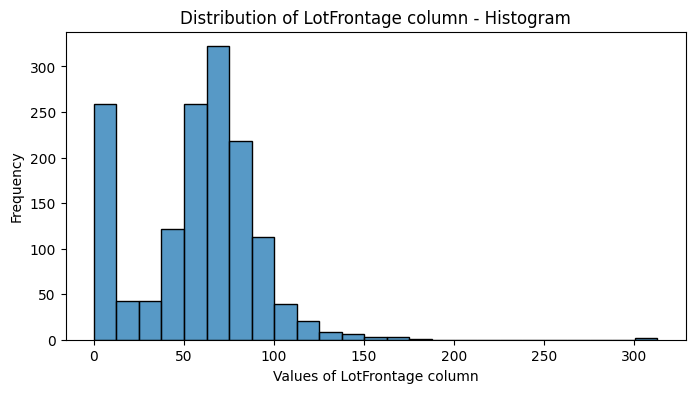

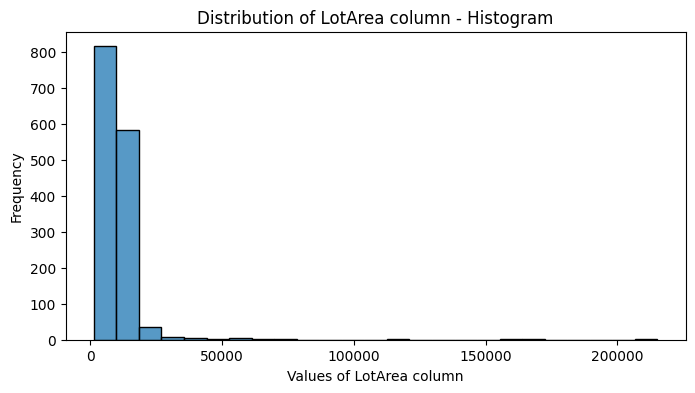

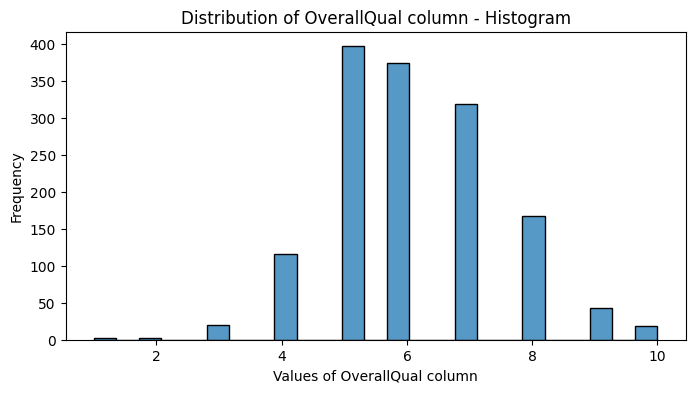

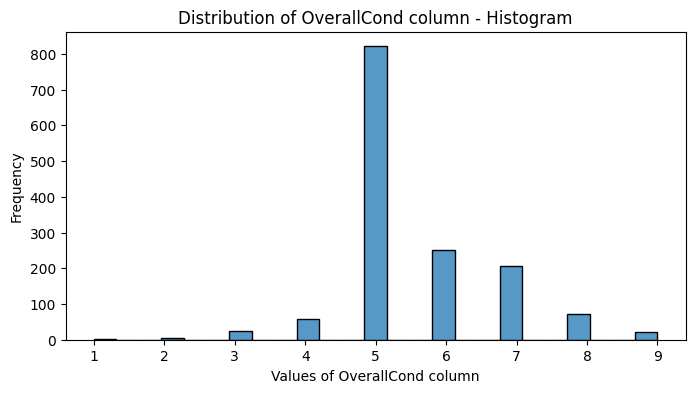

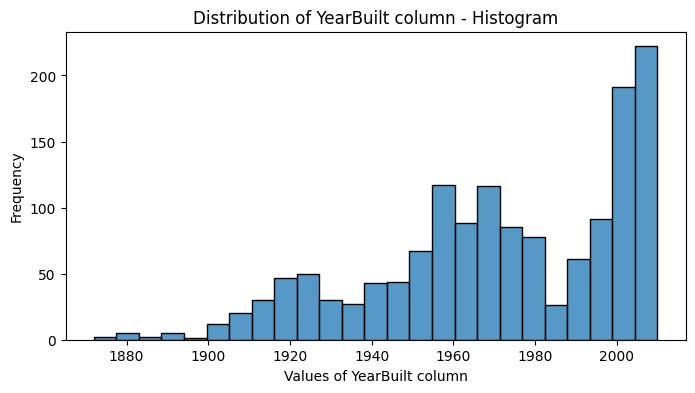

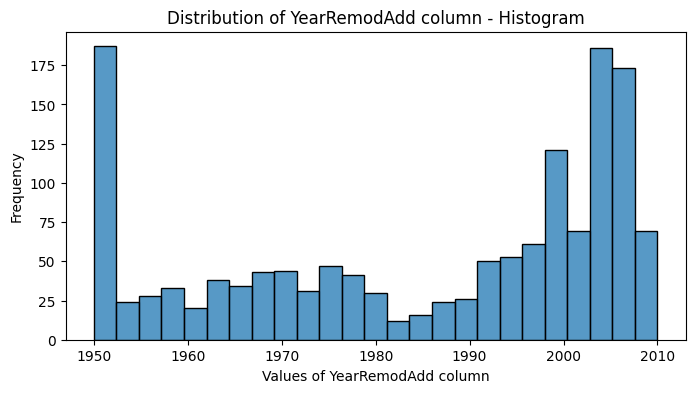

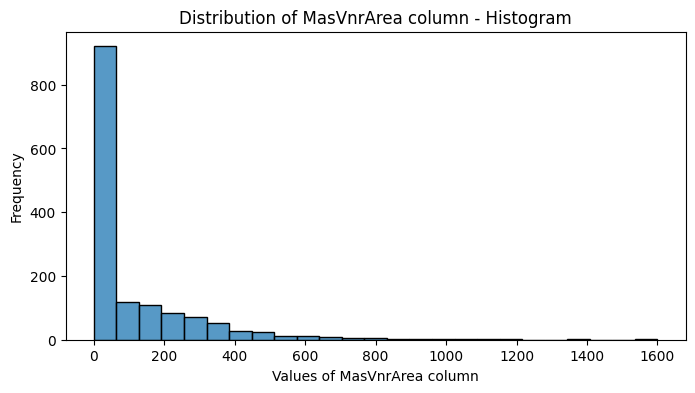

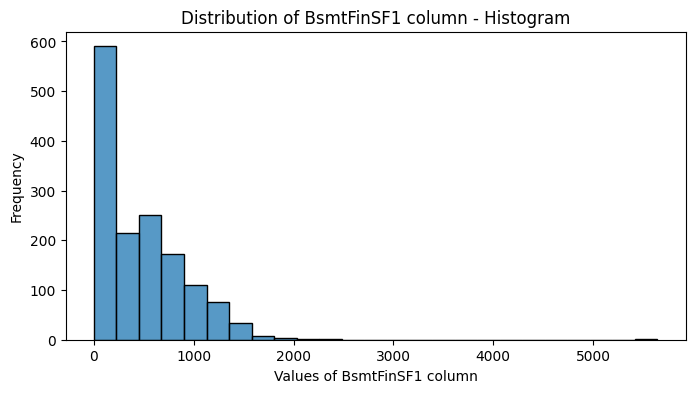

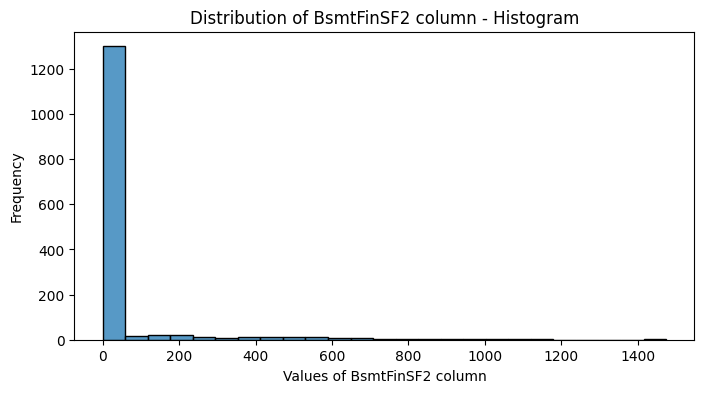

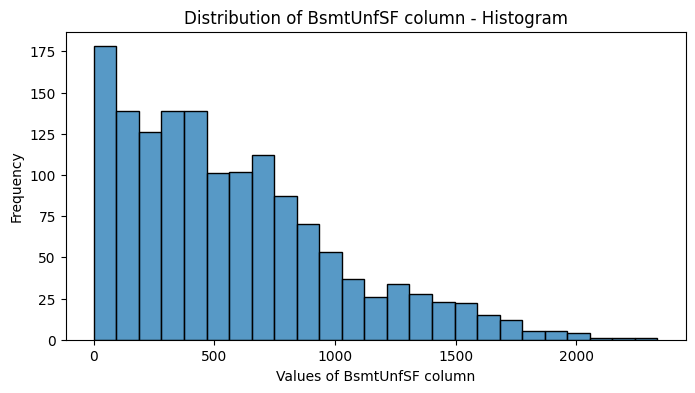

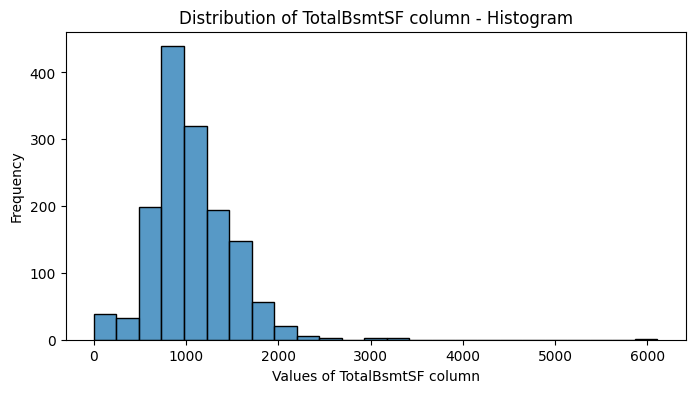

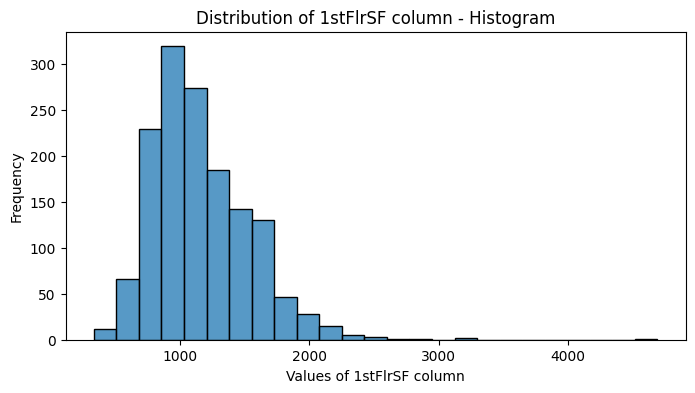

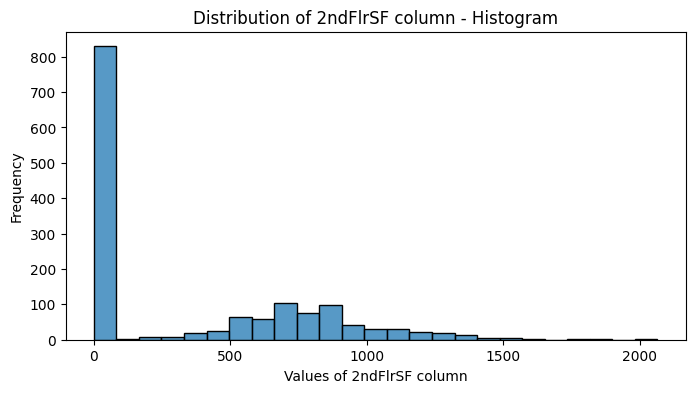

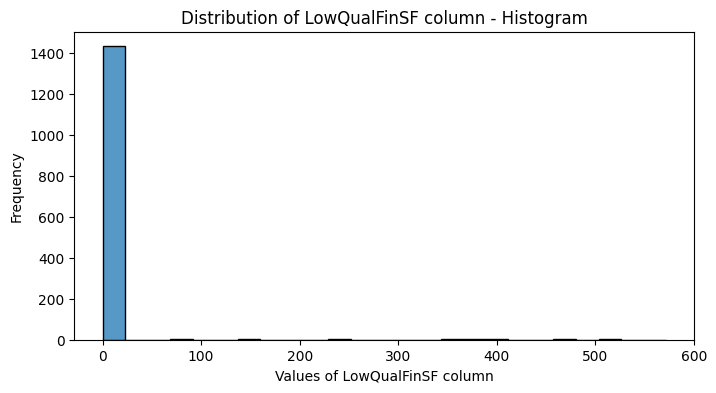

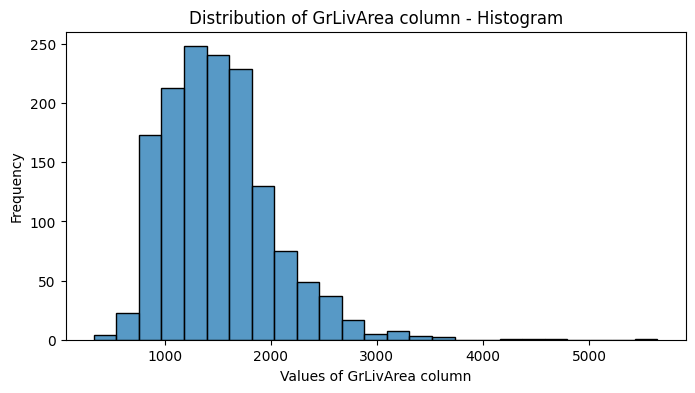

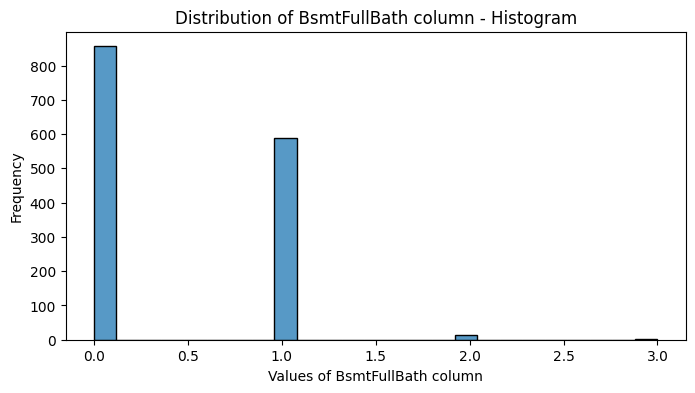

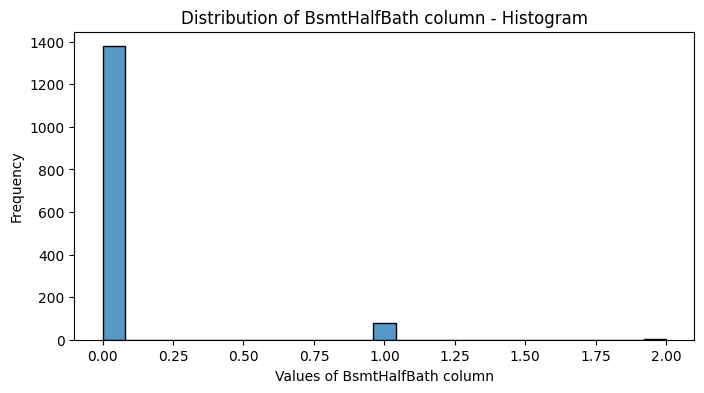

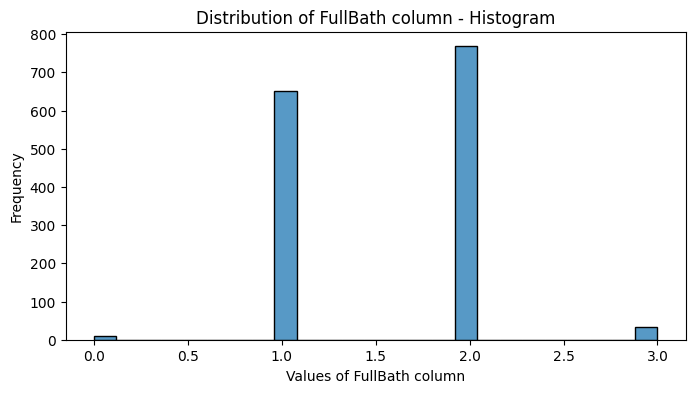

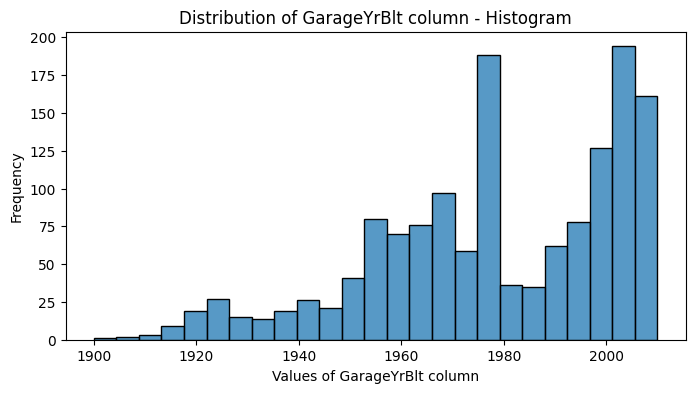

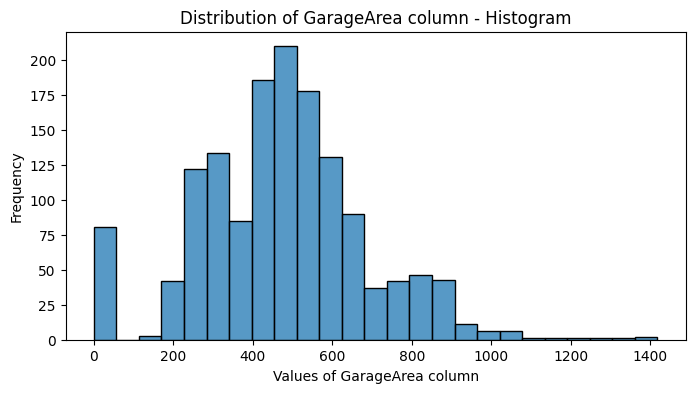

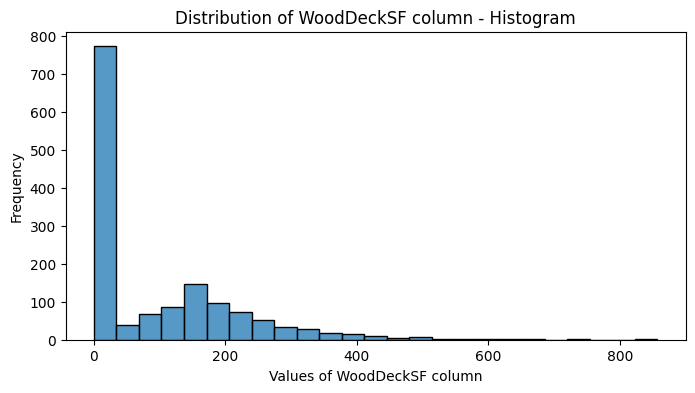

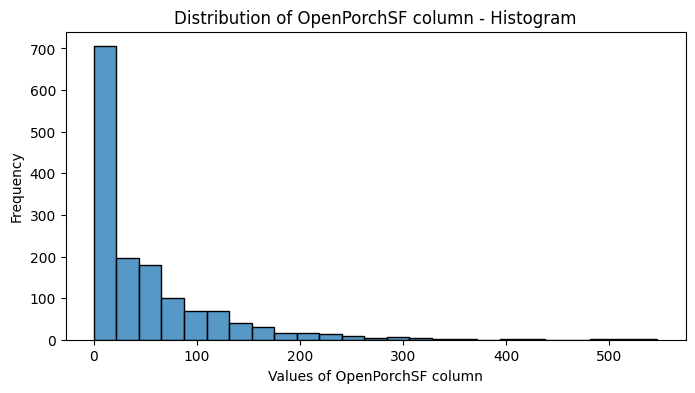

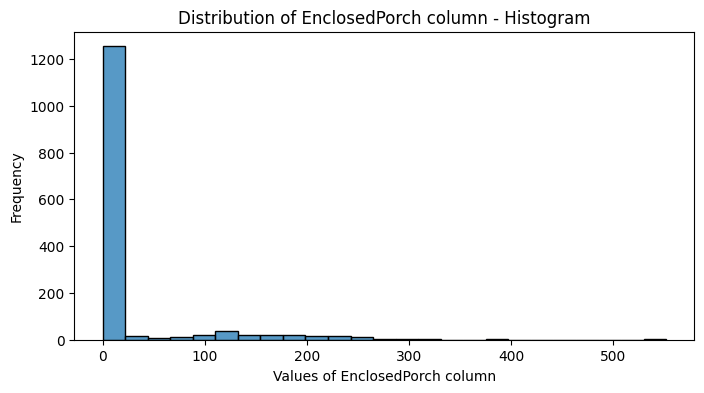

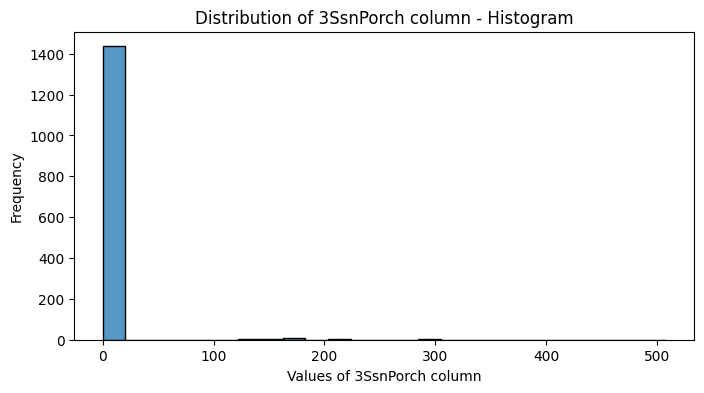

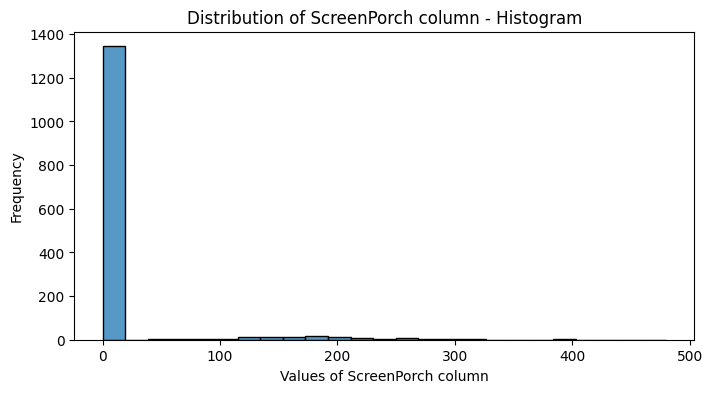

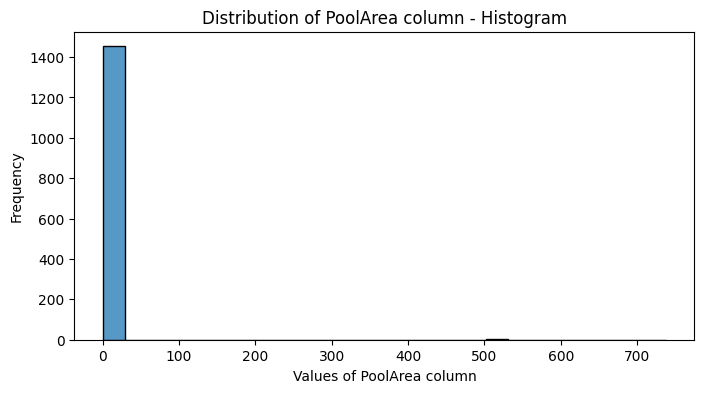

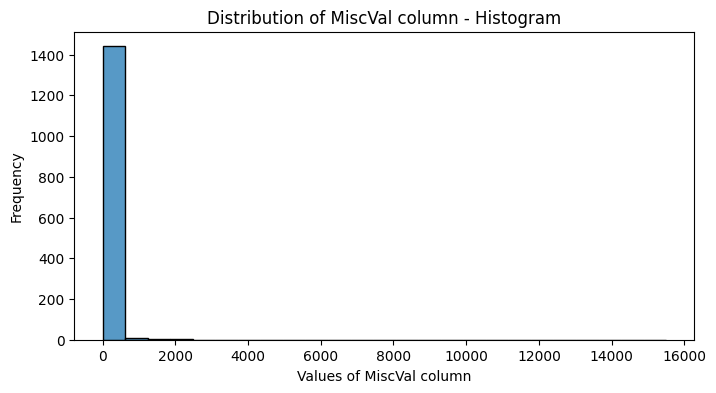

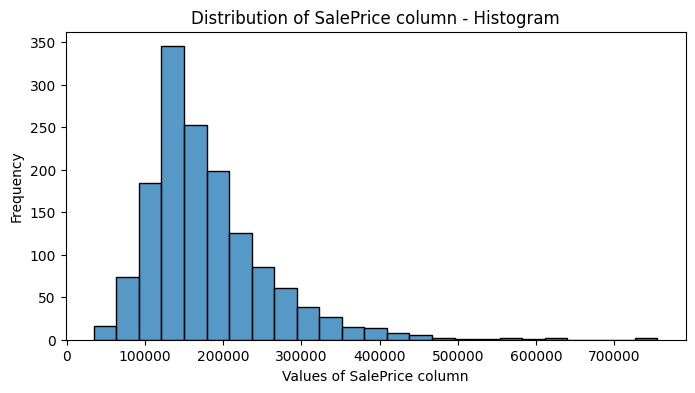

In [17]:

for col in housing_df_numerical_cols.columns:
    plt.figure(figsize = (8,4))
    sns.histplot(housing_df_numerical_cols[col],bins=25)
    plt.title(f"Distribution of {col} column - Histogram")
    plt.xlabel(f"Values of {col} column") 
    plt.ylabel("Frequency")
    plt.show()
    




  


Visiualization - KDE Plot

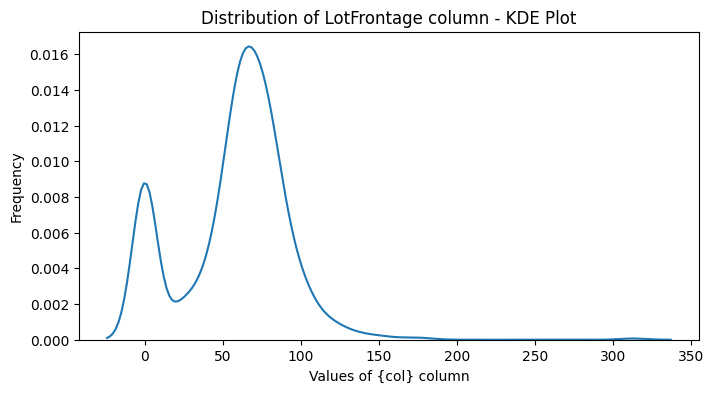

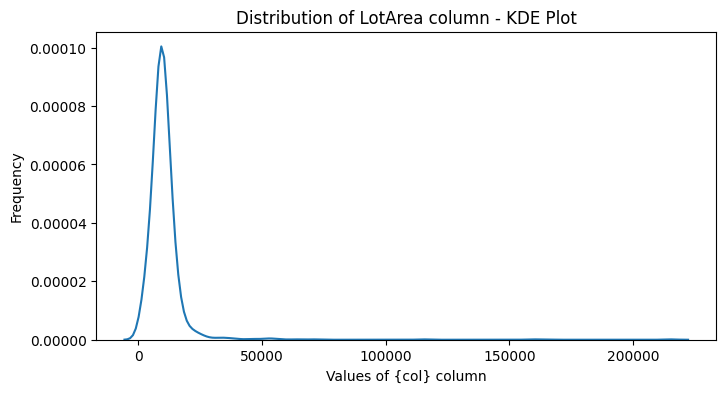

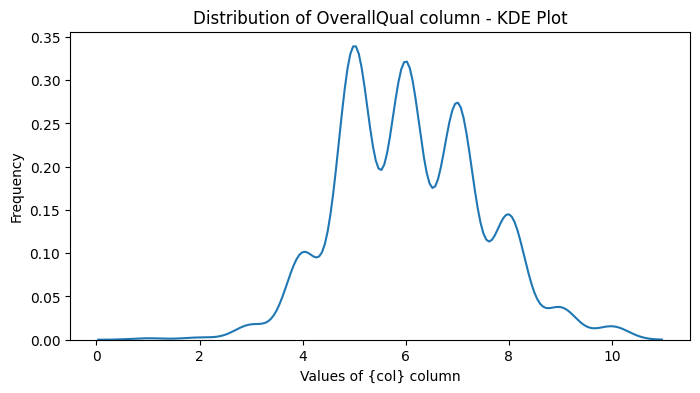

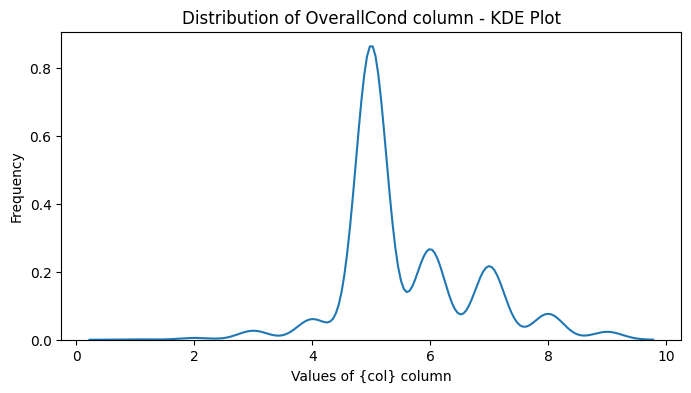

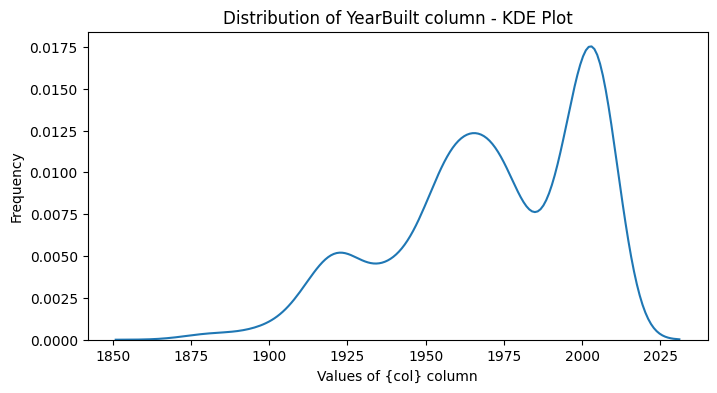

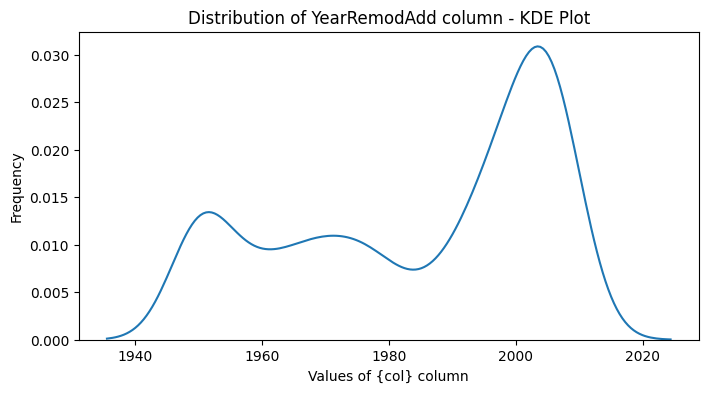

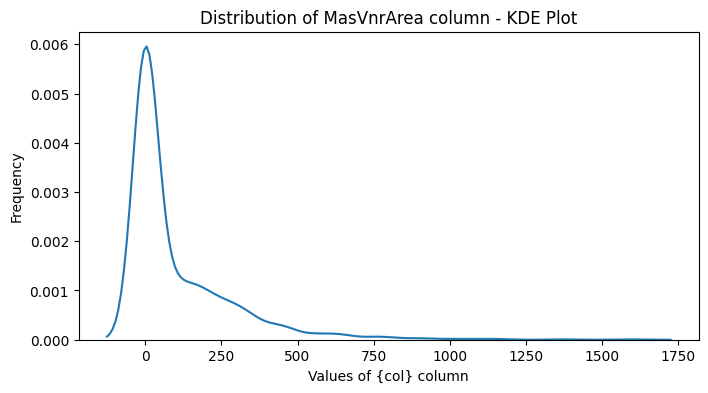

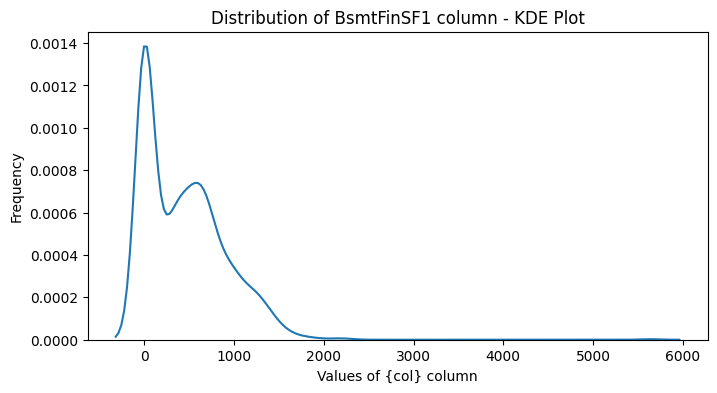

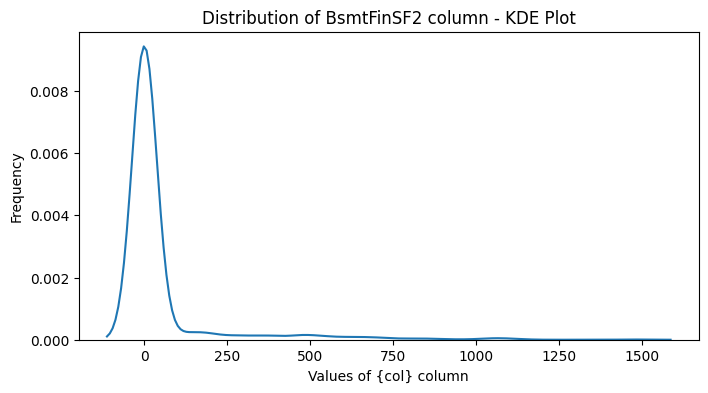

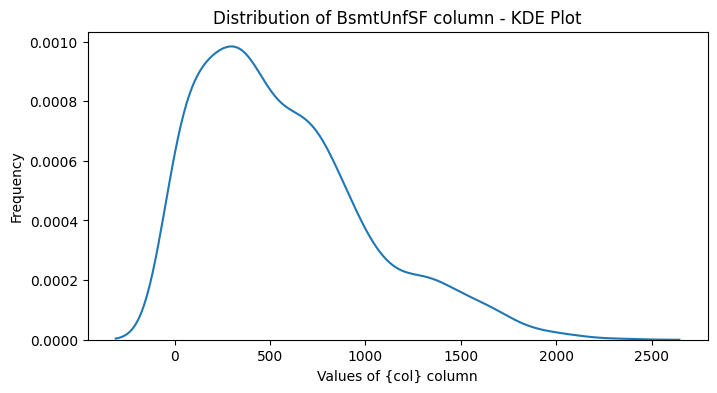

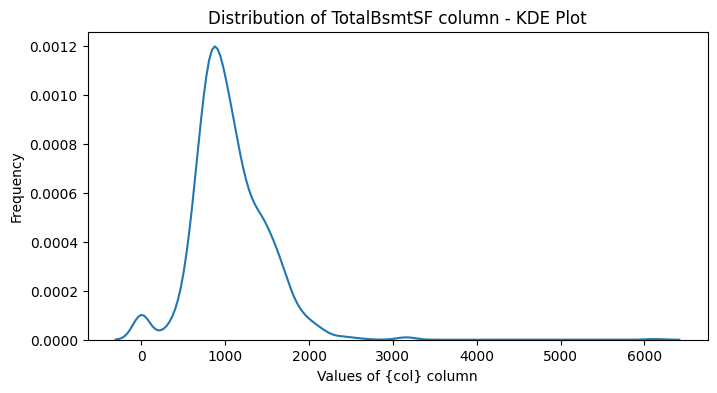

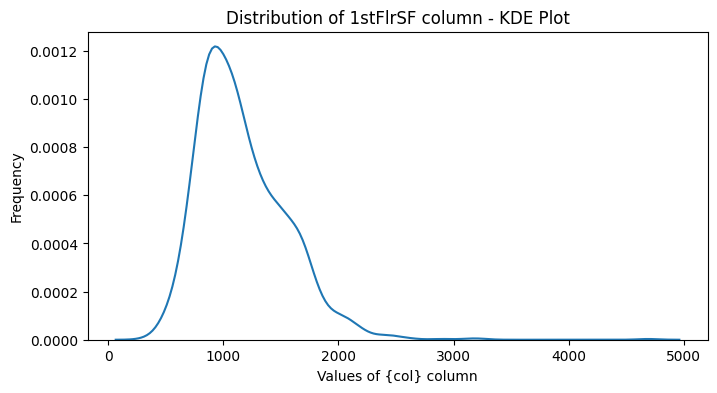

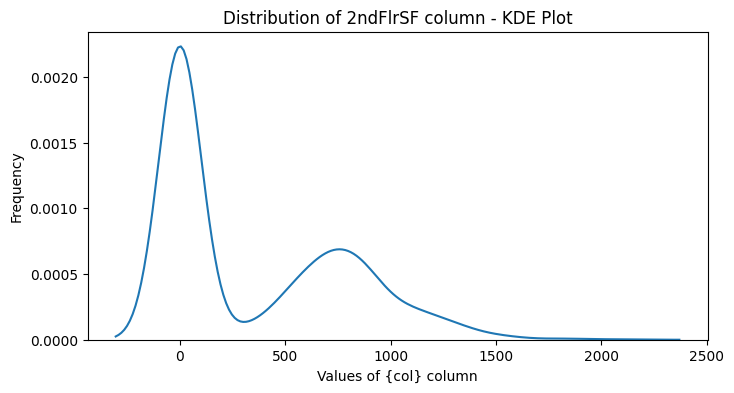

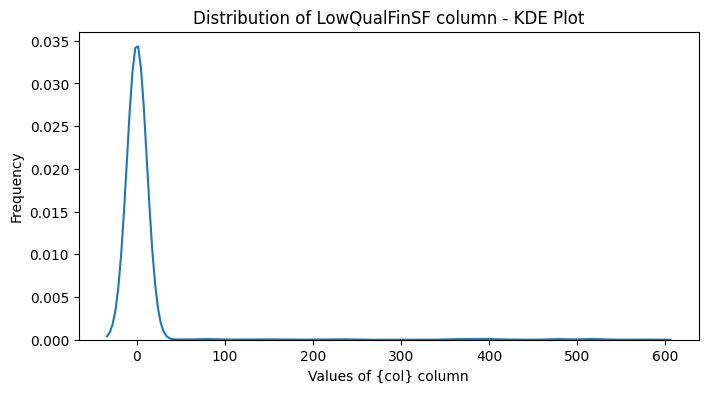

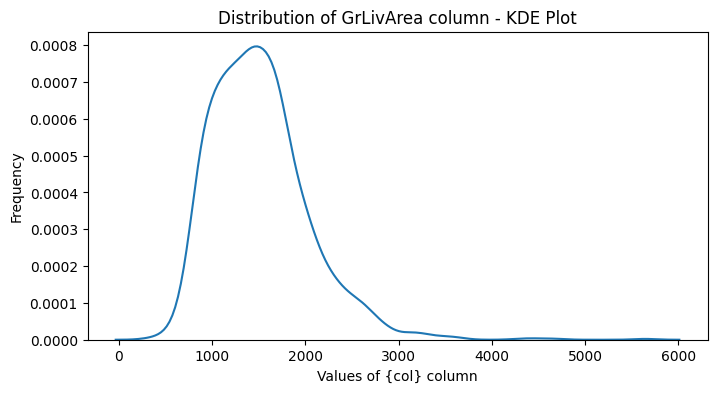

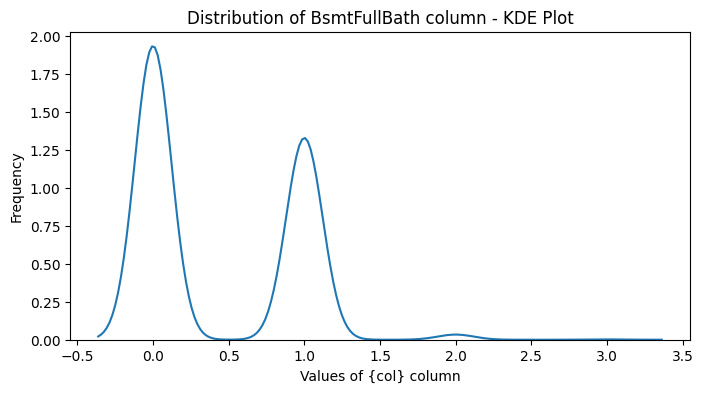

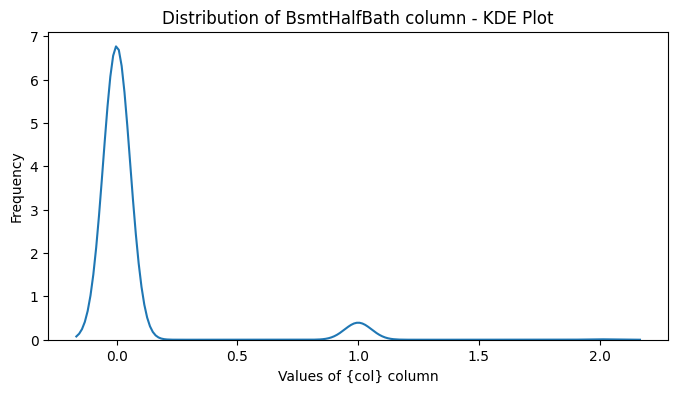

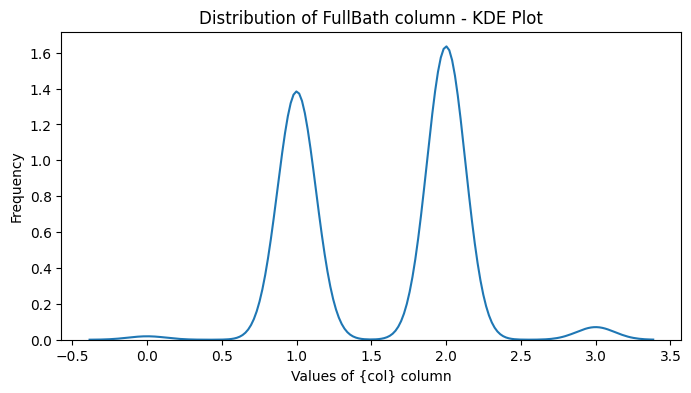

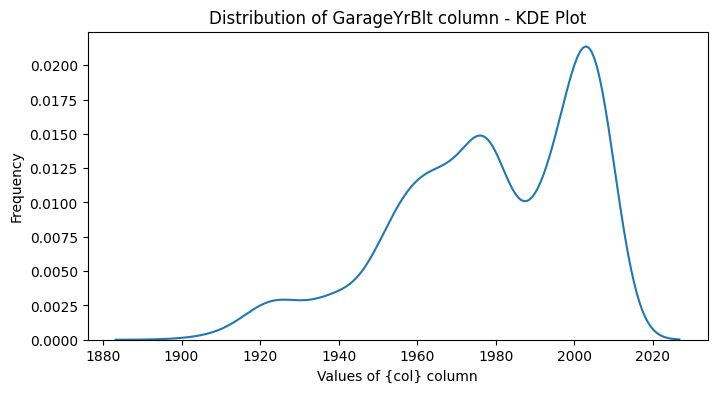

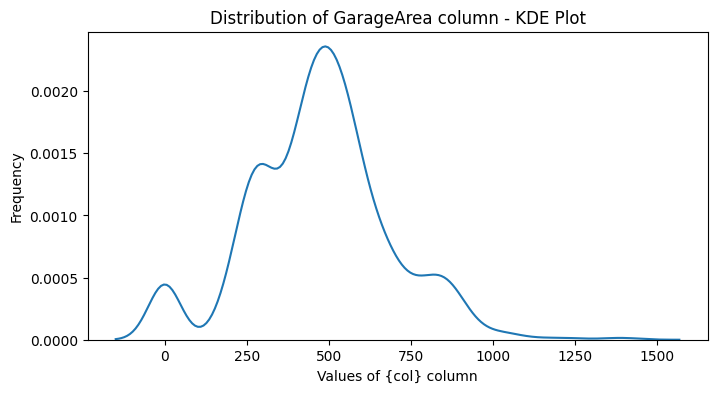

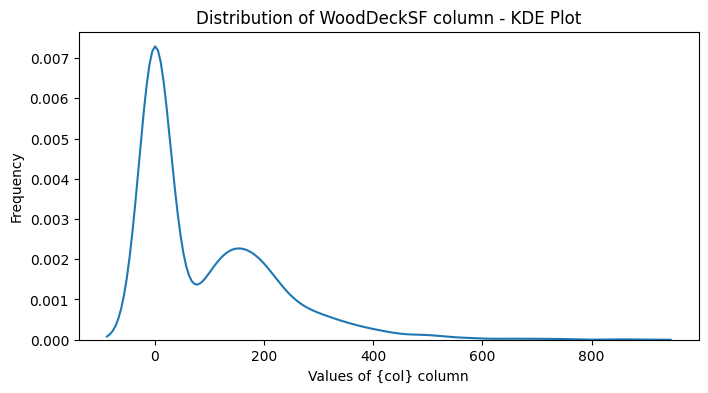

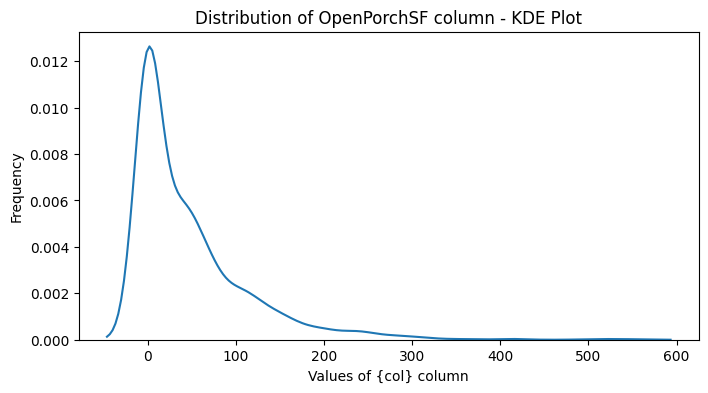

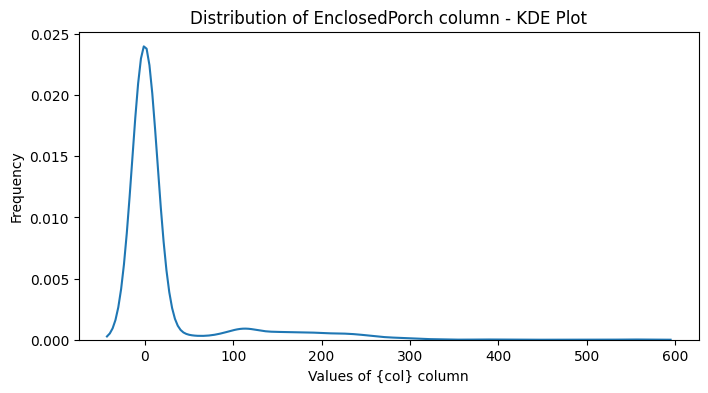

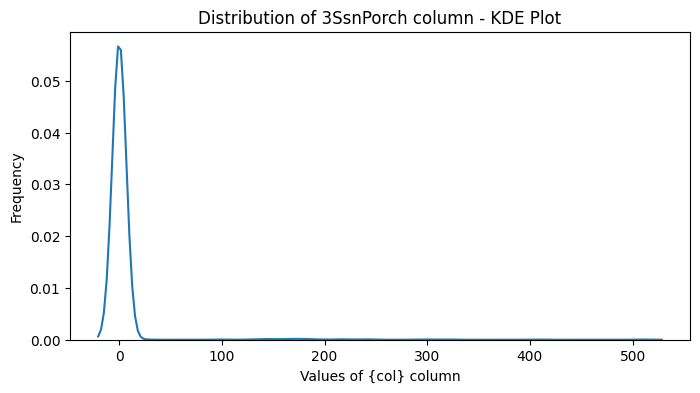

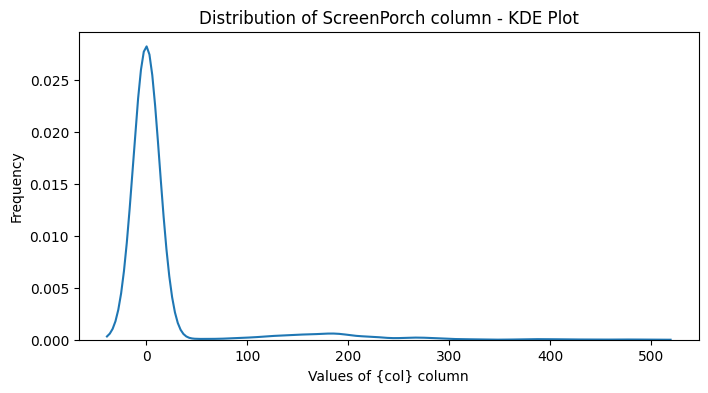

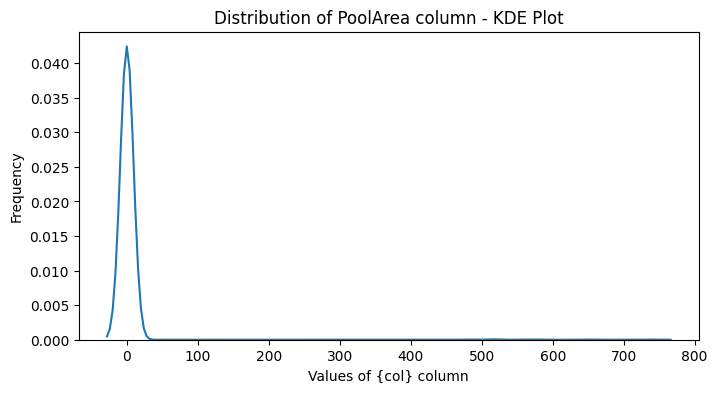

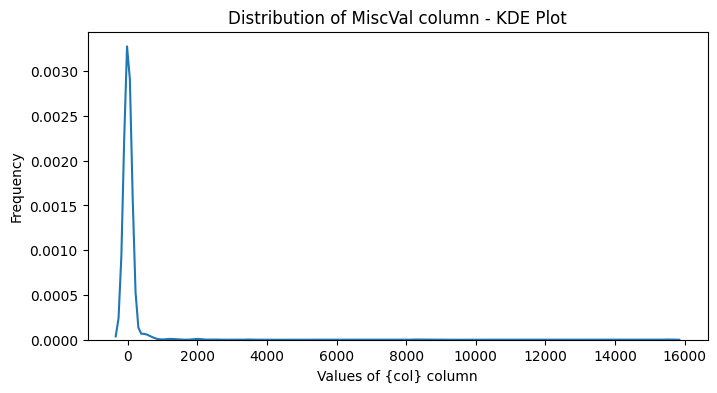

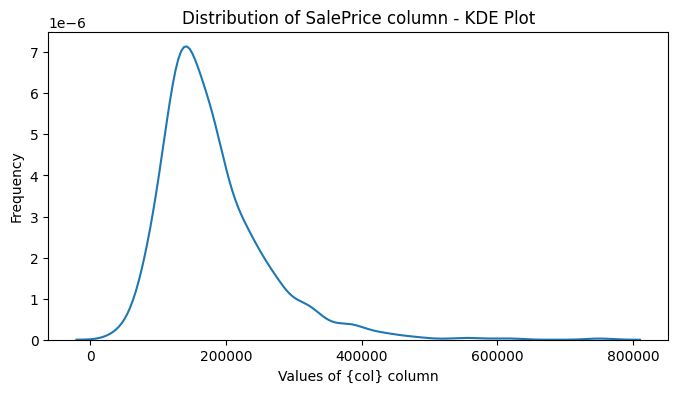

In [18]:
for col in housing_df_numerical_cols.columns:
    plt.figure(figsize=(8,4))
    sns.kdeplot(housing_df_numerical_cols[col])
    plt.title(f"Distribution of {col} column - KDE Plot")
    plt.xlabel("Values of {col} column")
    plt.ylabel("Frequency")
    plt.show()


Visualization - Boxplot 

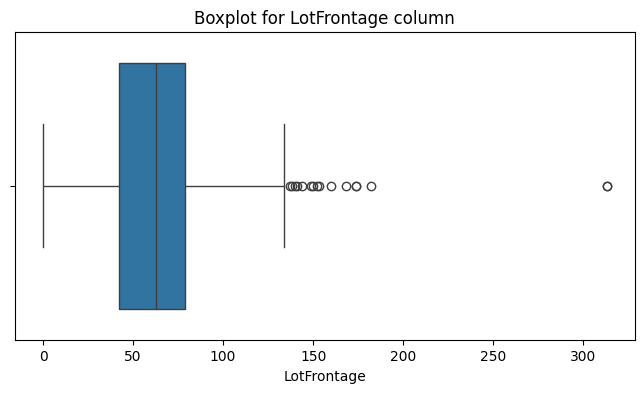

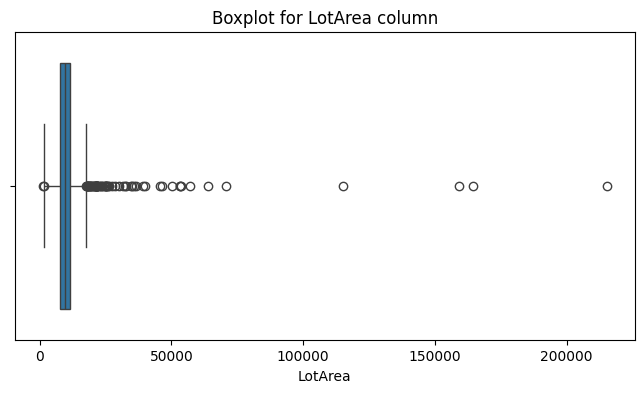

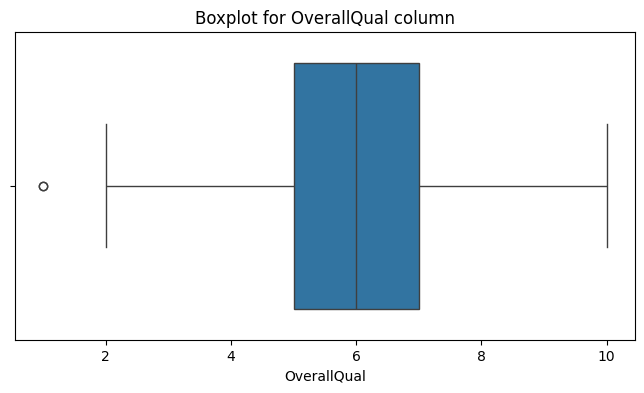

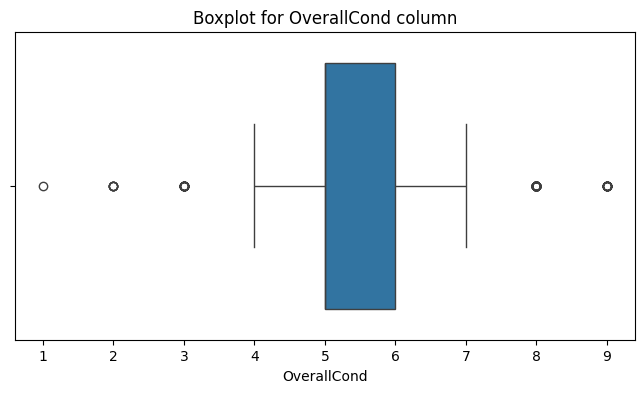

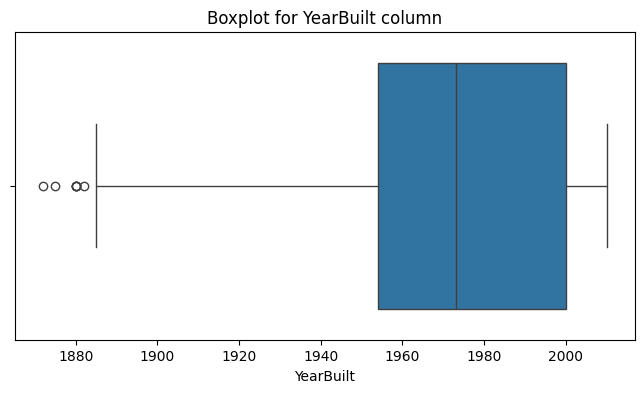

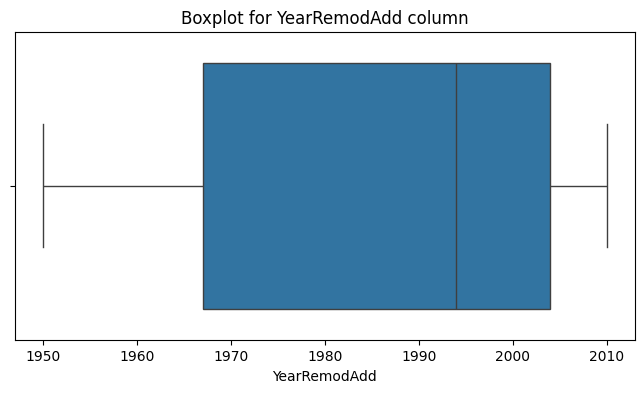

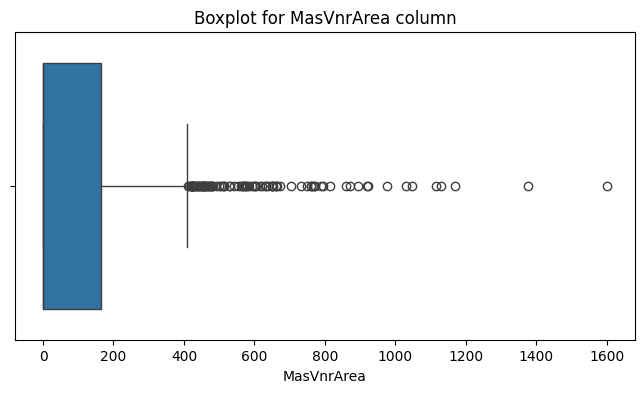

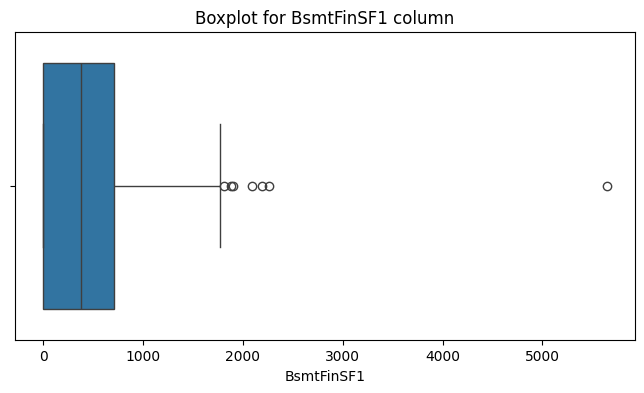

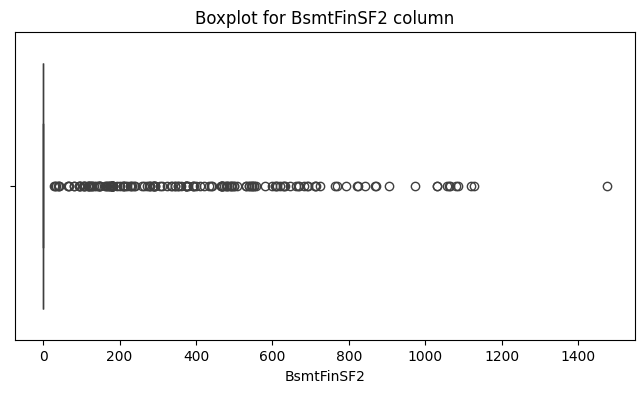

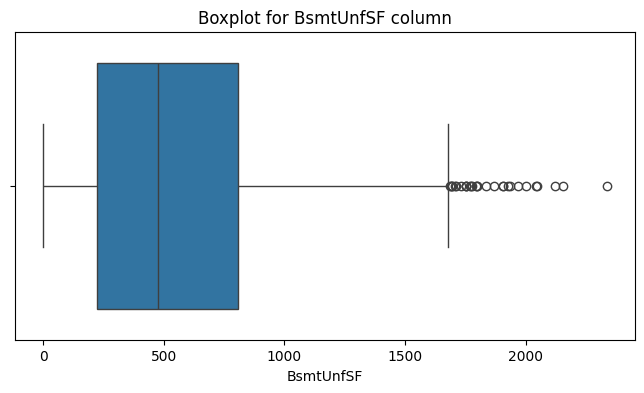

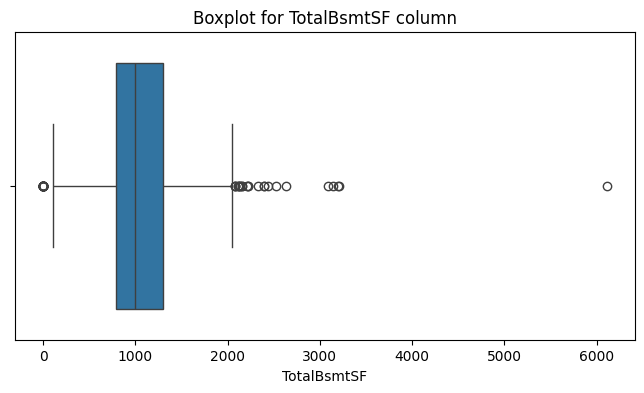

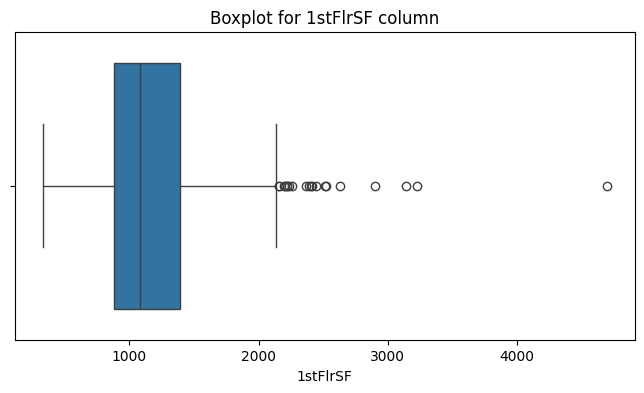

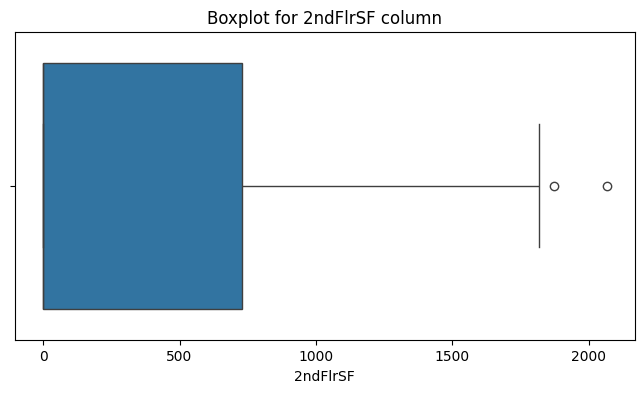

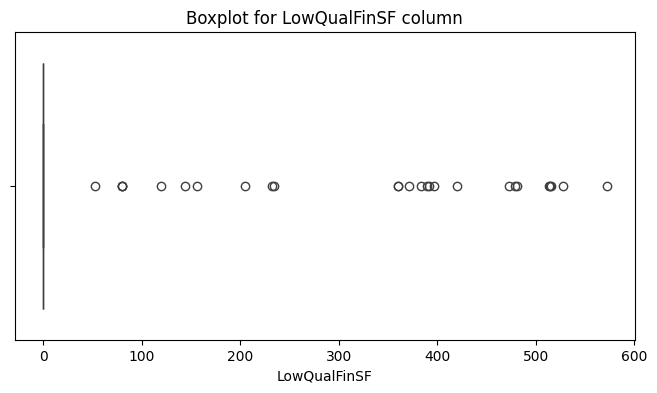

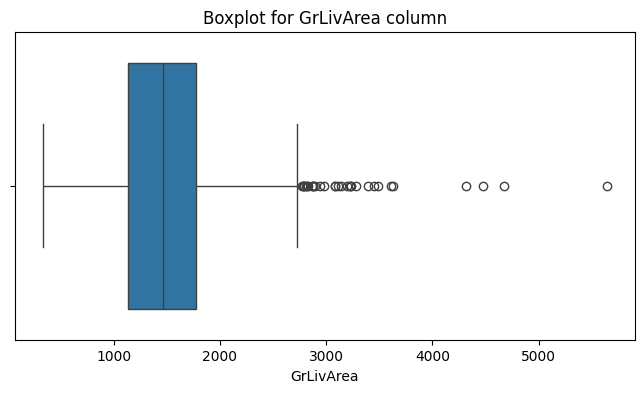

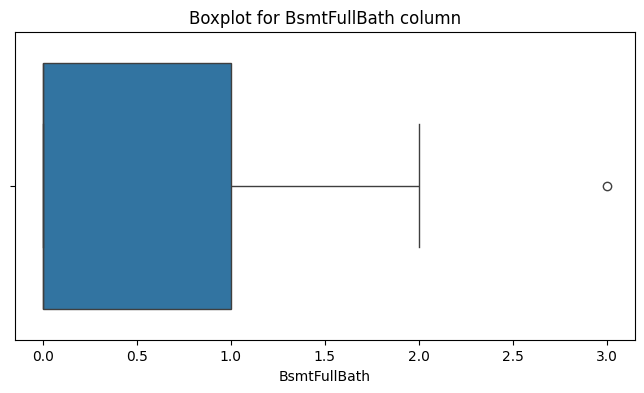

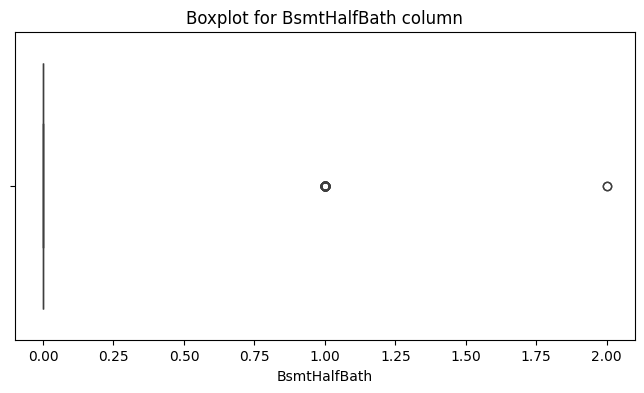

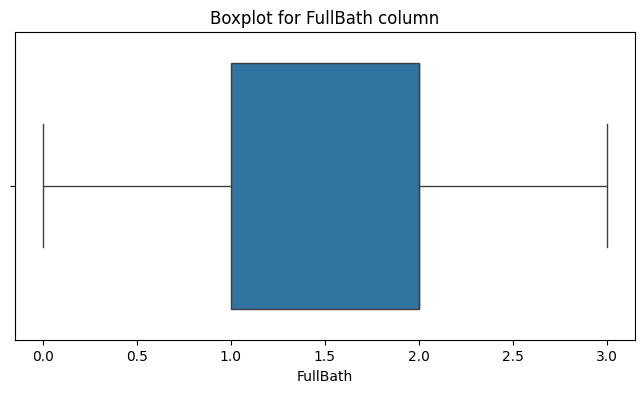

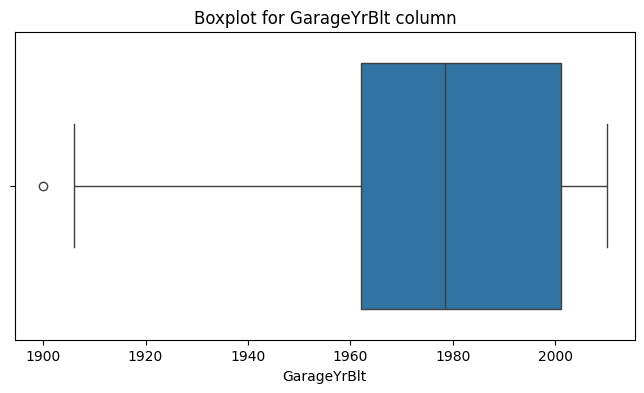

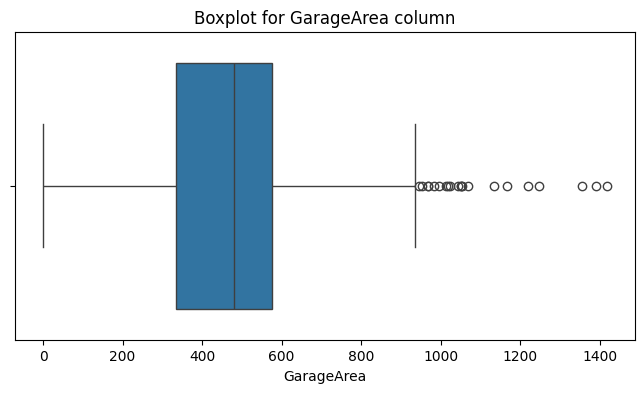

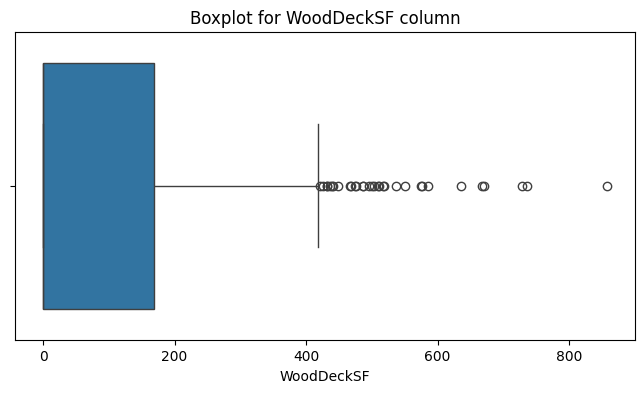

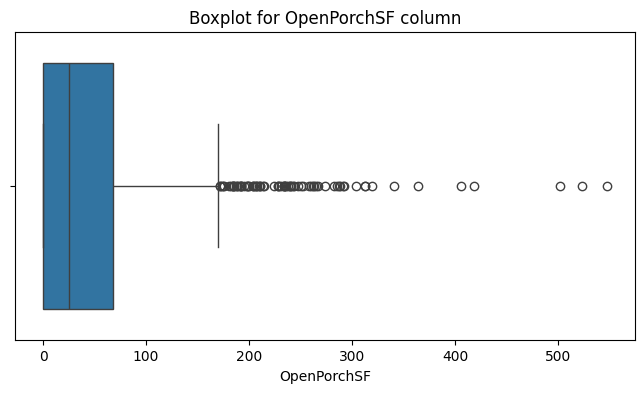

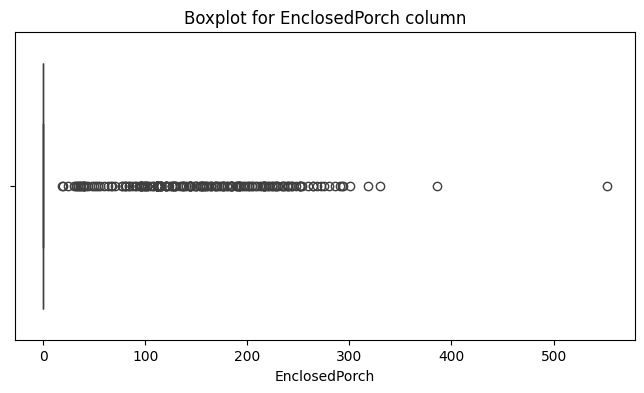

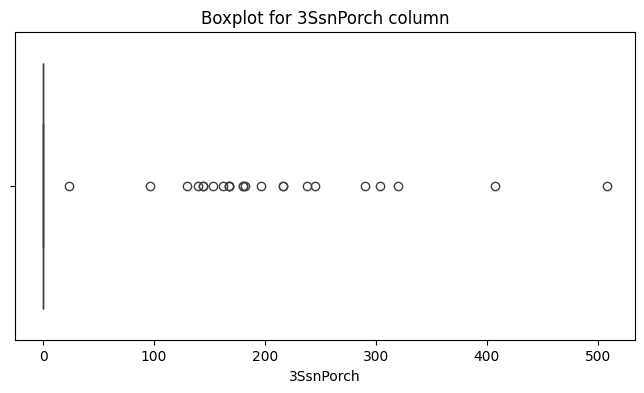

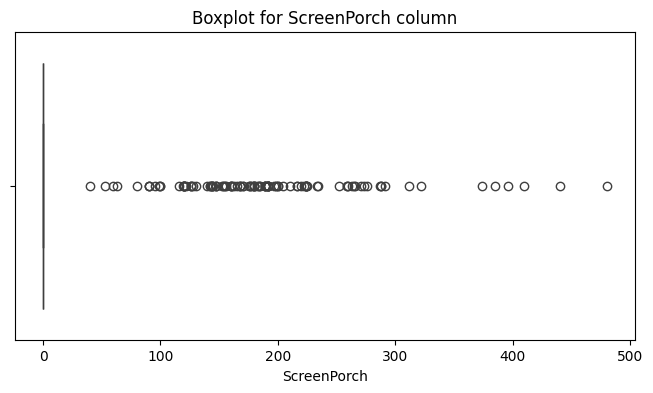

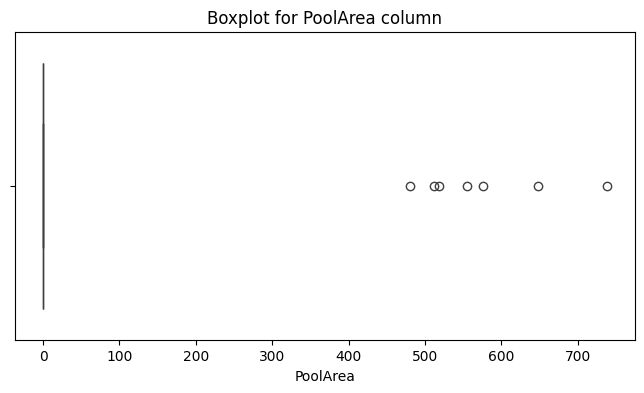

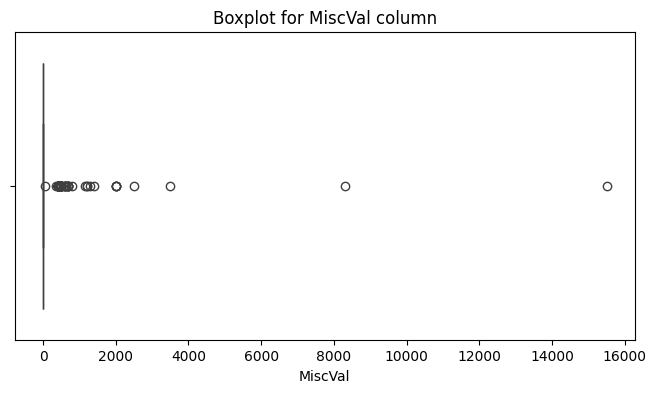

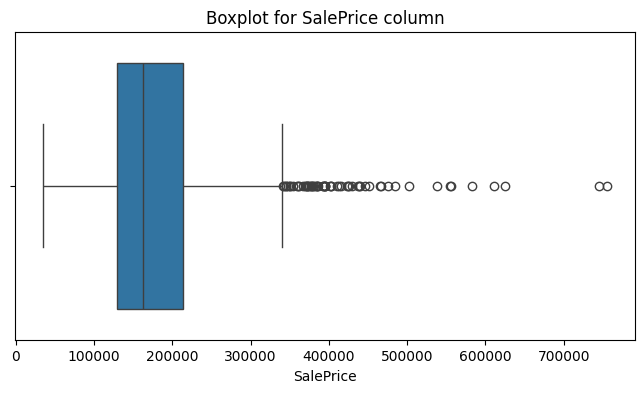

In [19]:
for col in housing_df_numerical_cols.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col,data=housing_df_numerical_cols)
    plt.title(f"Boxplot for {col} column")
    plt.xlabel(f"{col}")
    plt.show()

Insights for the above drawn Histograms: 

1) For column - LotFrontage : 
Shape: Right‑skewed distribution with the majority of homes between 50–90 ft.
Spread: Most values fall in the mid‑range, with a gradual decline toward higher frontage sizes.
Outliers: A small number of large frontage values (>120 ft) create a long right tail.

2) For column - LotArea: 
Shape: Strongly right‑skewed, with the majority of properties having relatively small lot sizes.
Concentration: Most values cluster below 20,000 sq ft, indicating typical residential lot sizes dominate the dataset.
Outliers: A long upper tail with very large lots (50,000–200,000+ sq ft), suggesting the presence of a few extremely large parcels.

3) For column - OverallQual: 
Majority of houses fall in the 5–7 quality range.
5 and 6 are the most frequent ratings.
Low-quality ratings (1–3) are extremely rare.
High-quality homes (8–10) exist but are much fewer.
Distribution is slightly right‑skewed (more mid‑quality homes).

4) For column - OverallCond:
Majority of homes are rated 5 (average condition).
6 and 7 ratings are also common, indicating many homes are above-average in upkeep.
Low condition ratings (1–3) are extremely rare.
High ratings (8–9) appear but are infrequent.
Distribution is centered around 5, with a slight tail toward higher condition values

5) For column - YearBuilt:
Majority of homes were built after 1950, showing growth in newer residential development.
Construction activity increases sharply from the 1960s onward, with peaks around the 2000s.
Very few homes were built before 1900, indicating older properties are rare in the dataset.
Negatively (left) skewed: high concentration in 1990–2010, tail extends to older years (pre‑1950).
Post‑1950 builds dominate; very few homes pre‑1900.

6) For column YearRemodAdd: 
Bimodal: a sharp spike around ~1950–1955 and a large concentration in the late‑1990s to mid‑2000s (≈1998–2007).
Most homes show recent remodels (early 2000s), while a sizeable group has no remodel since original build (hence the 1950s spike where YearRemodAdd == YearBuilt).
Sparse activity in the 1980s, modest remodeling in the 1960s–1970s and early 1990s.
Not normal; effectively bimodal with a long left extension back to 1950 and a hard right cap at ~2010 (dataset limit).

7) For column MasVnrArea: 
Highly right‑skewed distribution with a large spike at 0, indicating many homes have no masonry veneer.
Most non‑zero values are small (typically under ~300 sq ft), suggesting veneer is often used modestly.
Long right tail with extreme outliers (up to ~1600 sq ft), representing high‑end or luxury exteriors.

8) For column BsmtFinSF1:
Heavily right‑skewed distribution with a large spike at 0, indicating many homes have no finished basement.
Most finished basements are modest in size (commonly below ~1,000 sq ft).
Long right tail with a few extreme outliers (>2,000 sq ft), representing unusually large finished basements.

9) For column BsmtFinSF2:
Extremely right‑skewed distribution with an overwhelming spike at 0, indicating most homes do not have a second finished basement segment.
Very few non‑zero values, confirming BsmtFinSF2 is a rare feature in the dataset.
Non‑zero areas are generally small to moderate, with occasional extreme outliers 

10) For column BsmtUnfSF:
Right‑skewed distribution with values ranging from 0 to ~2300 sq ft.
Many homes have small to moderate unfinished basement areas, commonly below ~800 sq ft.
Noticeable mass near 0, indicating fully finished basements or homes without basements.
Long right tail suggests some homes have very large unfinished basements.

11) For column TotalBsmtSF: 
Right‑skewed distribution, but more balanced than individual basement sub‑components.
Most homes cluster between ~700 and 1,300 sq ft, indicating typical basement sizes in the dataset.
Small spike near 0 reflects homes without basements.
Long right tail with extreme outliers (>3,000 sq ft), representing very large basements.


12) For column 1stFlrSF:
Right‑skewed distribution with most homes clustered between ~800 and 1,500 sq ft.
Few very small first floors, indicating a minimum functional living size.
Long right tail with rare, very large homes (>3,000 sq ft).

13) For column 2ndFlrSF: 
Large spike at 0, indicating many homes are single‑story with no second floor.
Right‑skewed distribution among homes that do have a second floor.
Most non‑zero values cluster between ~500 and 1,200 sq ft.
Long right tail with a few very large second floors (>1,800 sq ft).

14) For column LowQualFinSF: 
Extremely zero‑inflated distribution: the vast majority of homes have 0 low‑quality finished space.
Very few non‑zero observations, confirming that low‑quality finishes are rare in the dataset.
Non‑zero values are typically small, with a few isolated outliers extending to ~600 sq ft.
Highly right‑skewed and non‑normal.

15) For column GrLivArea:
Right‑skewed distribution with most homes between ~1,000 and 2,000 sq ft.
Very few small homes, indicating a practical minimum living size.
Long right tail with a handful of very large homes (>3,000 sq ft).
Presence of extreme outliers

16) For column BsmtFullBath:
Discrete distribution dominated by values 0 and 1.
Most homes have no basement full bathroom, shown by the large spike at 0.
A substantial number of homes have exactly one basement full bath.
Very few homes have two or more basement full baths.

17) For column BsmtHalfBath:
Extremely zero‑inflated distribution, with the vast majority of homes at 0.
Small number of homes have exactly one basement half bath.
Values above 1 are rare, indicating limited variation.

18) For column FullBath:
Discrete distribution concentrated at 1 and 2 full bathrooms.
Two full baths appear most frequently, indicating a common modern layout.
Very few homes have 0 or 3 full baths, making them outliers.

19) For column GarageYrBlt:
Left‑skewed distribution with most garages built after 1950.
Clear increase in garage construction from the 1960s onward.
Strong clustering around the 1970s and early 2000s.
Very few garages built before 1920.

20) For column GarageArea:
Right‑skewed distribution with most homes clustered between ~300 and 600 sq ft.
Noticeable spike at 0, indicating homes without a garage.
Long right tail with a few very large garages (>1,000 sq ft), representing luxury or multi‑vehicle properties.

21) For column woodDeckSF:
Heavily right‑skewed with a large spike at 0 ⇒ many homes have no wood deck.
Among non‑zero values, most decks are small–medium (~100–250 sq ft).
Long right tail with a few very large decks (>600–800 sq ft)

22) For column OpenPorchSF:
Heavily right‑skewed distribution with a large spike at 0, showing many homes lack an open porch.
Most non‑zero values are small to modest (≈20–150 sq ft), typical of standard front porches.
Long right tail with a few very large porches (>300–500 sq ft)

23) For column EnclosedProch:
Extremely zero‑inflated distribution with the vast majority of homes at 0.
Very few non‑zero observations, indicating enclosed porches are rare in the dataset.
Non‑zero values are mostly small to medium (≈50–200 sq ft).
Long right tail with a handful of large enclosed porches (>300–500 sq ft) acting as outliers.
Highly right‑skewed and non‑normal.

24) For column 3SsnPorch:
Extremely zero‑inflated: almost all homes have 0 sq ft, indicating this feature is rare.
Very few non‑zero observations, confirming limited prevalence in the dataset.
Non‑zero values are generally moderate in size (~100–300 sq ft).
Highly right‑skewed with a thin tail extending beyond 500 sq ft.


25) For column ScreenPorch:
Extremely zero‑inflated: most homes have no screened porch.
Very few non‑zero values, showing screened porches are uncommon.
Non‑zero areas typically fall between ~100 and 250 sq ft.
Right‑skewed distribution with a long but thin tail up to ~500 sq ft.
Highly non‑normal; size variation adds limited incremental signal

26) For column PoolArea:
Extremely zero‑inflated distribution: almost all homes have PoolArea = 0, confirming pools are rare.
Very few non‑zero observations, indicating limited representation of pools.
Non‑zero values cluster roughly around ~500–700 sq ft, typical residential pool sizes.
Severely right‑skewed with an isolated tail formed by a handful of pool properties.

27) For column MiscVal:
Extremely zero‑inflated distribution: the vast majority of homes have MiscVal = 0.
Very few non‑zero observations, confirming miscellaneous features are rare.
Non‑zero values vary widely, from small amounts to very large outliers (up to ~15,000).
Highly right‑skewed with a long tail driven by a handful of luxury additions.

28) For column SalePrice:
Right‑skewed distribution, with most homes clustered between ~120k and 200k USD.
Long right tail driven by a small number of high‑value properties (>400k USD).
Majority of sales fall below 300k USD, indicating a mid‑range housing market.
Presence of extreme outliers (up to ~750k USD)


Univariant Analysis for Categorical(ordinal) Data Frame:

Renaming the column headers to their full descriptive forms

In [20]:
housing_df_ordinal_cols = housing_df_ordinal_cols.rename(columns={"HalfBath":"Half_BathRoom","BedroomAbvGr":"BedRoom_Above_Ground","KitchenAbvGr":"Kitchen_Above_Ground","TotRmsAbvGrd":"Total_Rooms_Above_Ground","GarageCars":"Garage_Can_Have_Cars","YrSold":"Year_Sold"})
housing_df_ordinal_cols.head()

Half_BathRoom  BedRoom_Above_Ground  Kitchen_Above_Ground  \
0              1                     3                     1   
1              0                     3                     1   
2              1                     3                     1   
3              0                     3                     1   
4              1                     4                     1   

   Total_Rooms_Above_Ground  Fireplaces  Garage_Can_Have_Cars  Year_Sold  
0                         8           0                     2       2008  
1                         6           1                     2       2007  
2                         6           1                     2       2008  
3                         7           1                     3       2006  
4                         9           1                     3       2008

Bar Plots

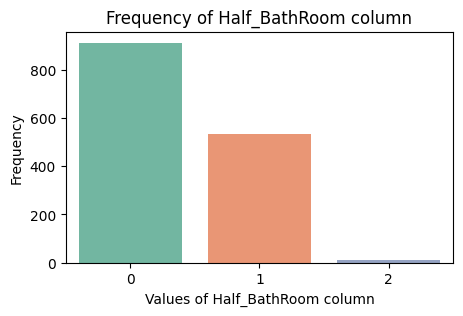

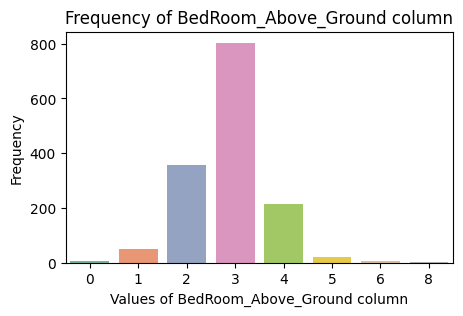

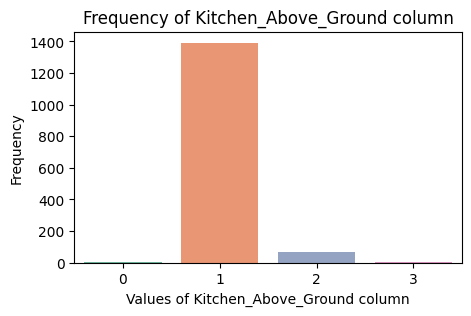

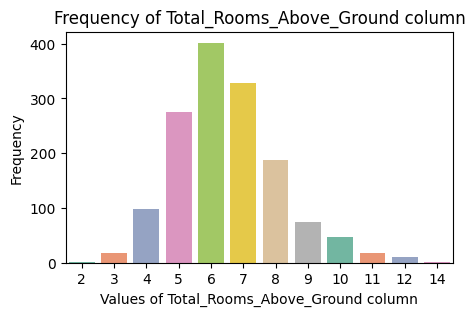

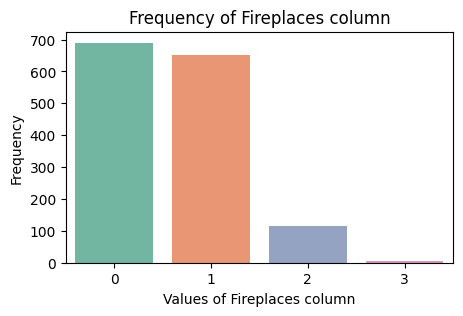

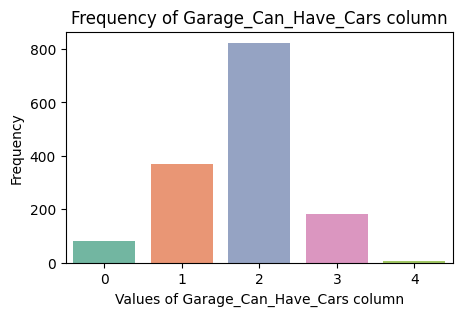

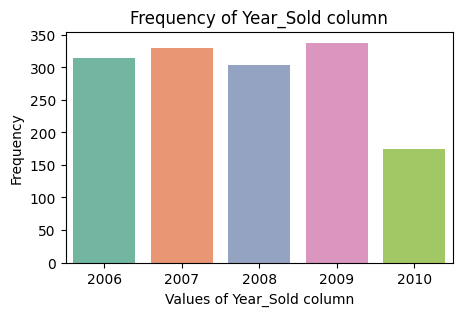

In [21]:
for col in housing_df_ordinal_cols.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col,data=housing_df_ordinal_cols,hue=col,palette="Set2",legend=False)
    plt.title(f"Frequency of {col} column")
    plt.xlabel(f"Values of {col} column")
    plt.ylabel(f"Frequency")
    plt.show()

Pie Chart

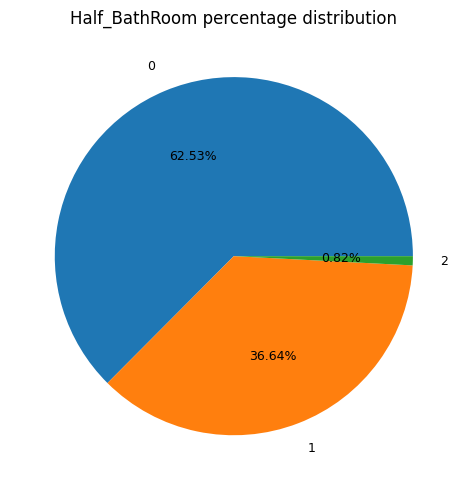

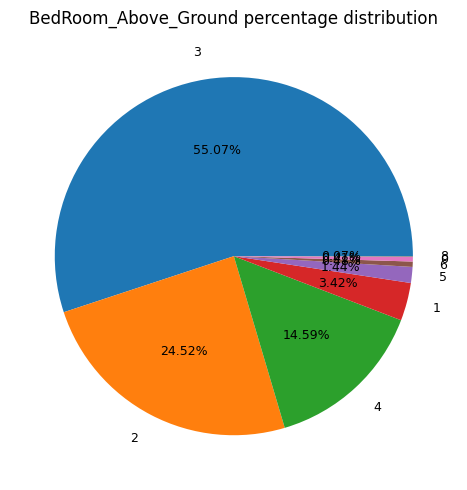

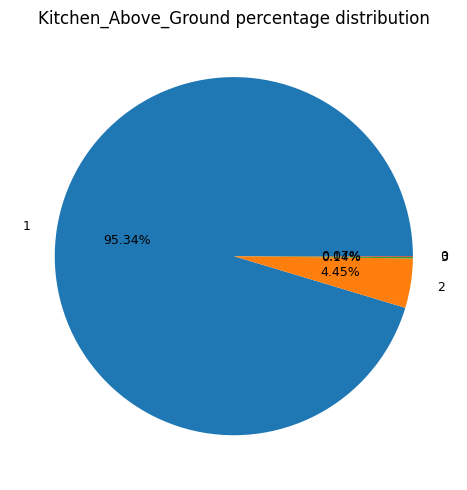

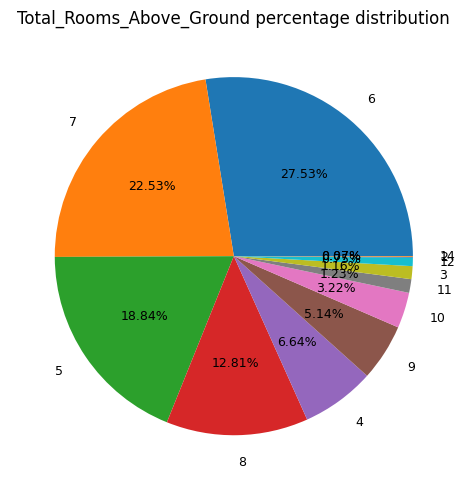

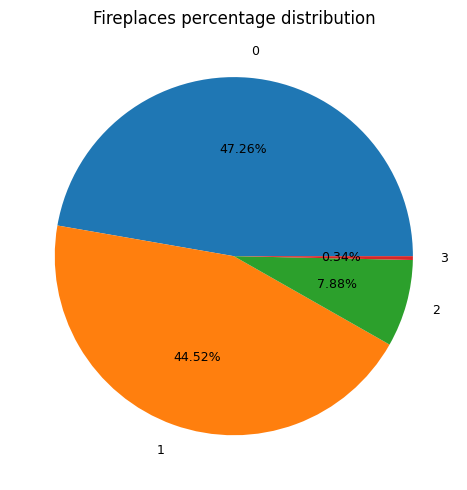

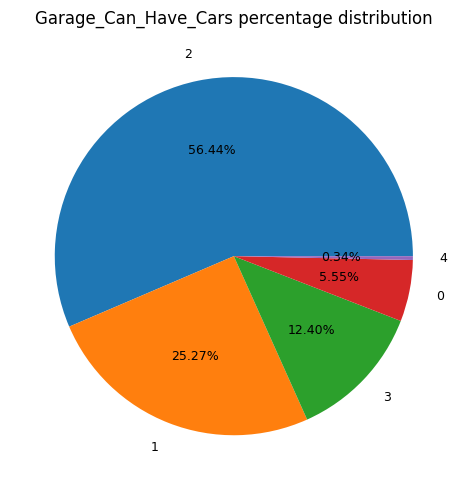

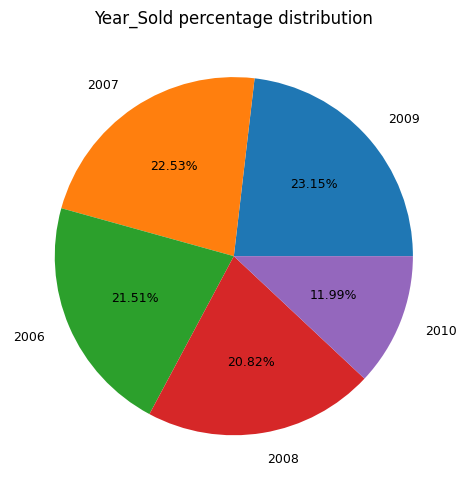

In [79]:
for col in housing_df_ordinal_cols.columns:
    length = len(housing_df_ordinal_cols[col])
    count = housing_df_ordinal_cols[col].value_counts()
    percentage = (count/length) * 100
    plt.figure(figsize=(12,5))
    percentage.plot(kind='pie',autopct = '%1.2f%%',pctdistance=0.60,labeldistance=1.15,textprops={'fontsize':9})
    plt.title(f"{col} percentage distribution")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


Insights for ordinal columns: 

1) For column Half_BathRoom:
Majority of homes do not have a half bathroom, indicating it is not a standard feature.
A substantial number of properties have exactly one half bathroom, typically as an additional convenience.
Homes with two half bathrooms are extremely rare, forming a negligible portion of the data.
Overall distribution is right‑skewed with a strong concentration at lower values.

2) For column BedRoom_Above_Ground:
Most homes have 2–4 bedrooms, with 3 bedrooms being the most common configuration.
Homes with 1 bedroom or no bedroom above ground are rare, indicating limited presence of studio‑style properties.
Properties with 5 or more bedrooms exist but form a small proportion, representing larger or less typical homes.
Overall distribution is right‑skewed, with demand concentrated around mid‑range bedroom counts.

3) For column Kitchen_Above_Ground:
Majority of homes have exactly one kitchen, indicating standard single‑family housing.
Homes with two kitchens are rare, suggesting a small presence of multi‑family or converted properties.
Properties with zero or more than two kitchens are negligible, making them outliers.

4) For column Total_Rooms_Above_Ground:
Most homes have 5–7 rooms above ground, with 6 rooms being the most common.
Properties with fewer than 4 rooms are rare, indicating limited presence of very small homes.
Homes with 8 or more rooms exist but form a smaller proportion, representing larger houses.
Overall distribution is right‑skewed, with concentration around mid‑range room counts.

5) For column Fireplaces:
Homes with 0 or 1 fireplace dominate the dataset, indicating fireplaces are a common but not universal feature.
A noticeable number of properties have exactly one fireplace.G
Homes with two or more fireplaces are rare.
The distribution is right‑skewed and zero‑inflated.

6) For column Garage_Can_Have_Cars:
Most homes have a 2‑car garage, making it the dominant and standard configuration.
A significant number of properties have 1‑car garages, while no‑garage homes exist but are less common.
Homes with 3 or more car capacity are relatively rare, representing larger or higher‑end properties.
The distribution is right‑skewed.

7) For column Year_Sold:
Sales count is highest for year 2009  and lowest for 2010.
No single year overwhelmingly dominates the dataset.


Univariant Analysis for Categorical(nominal) Data Frame:

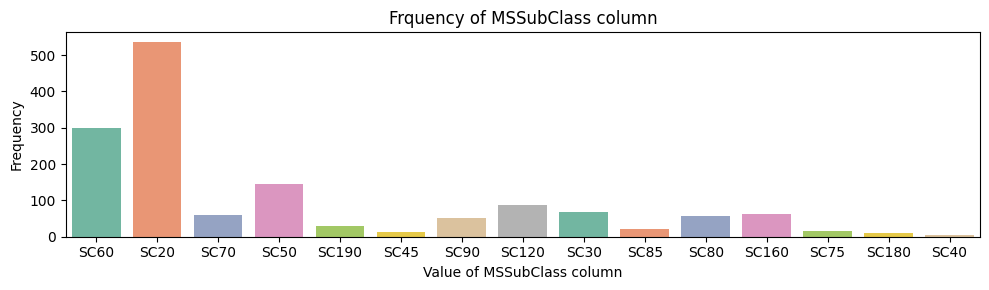

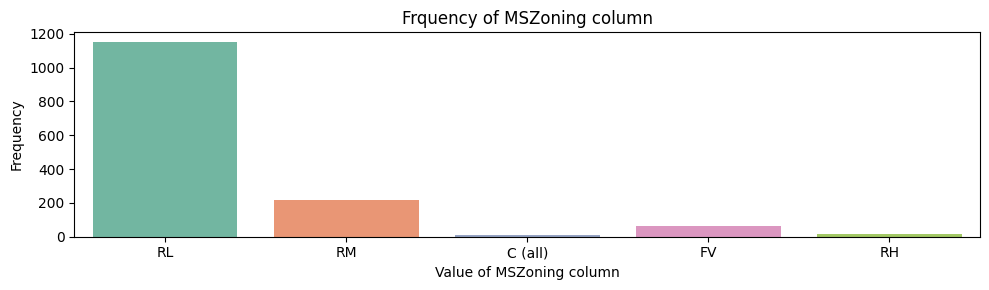

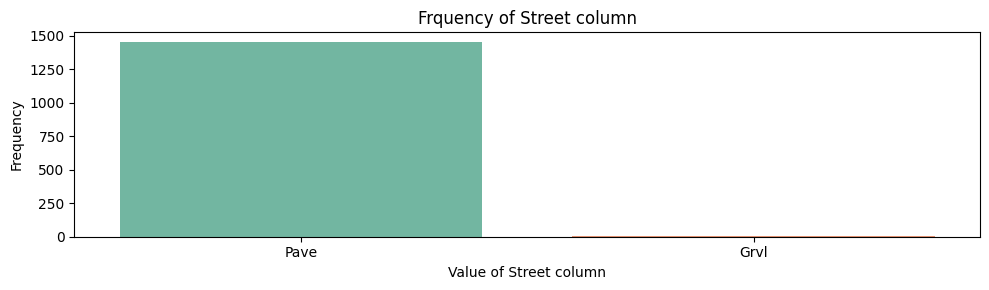

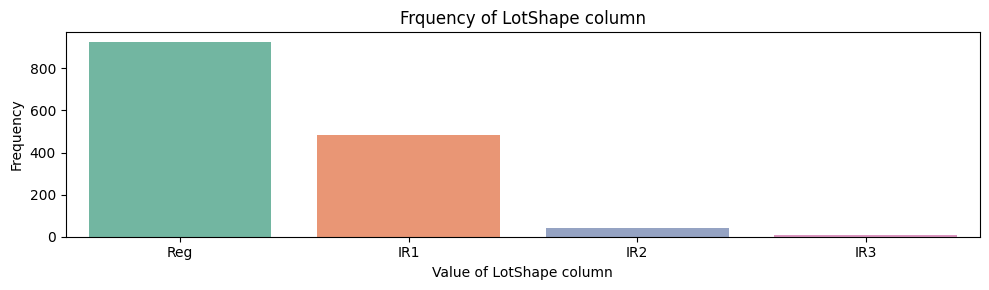

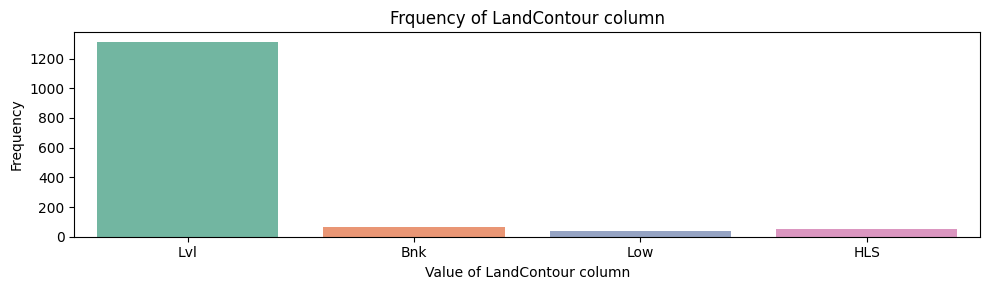

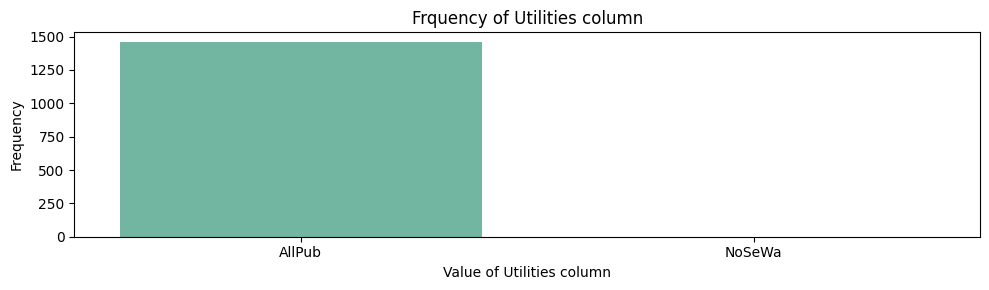

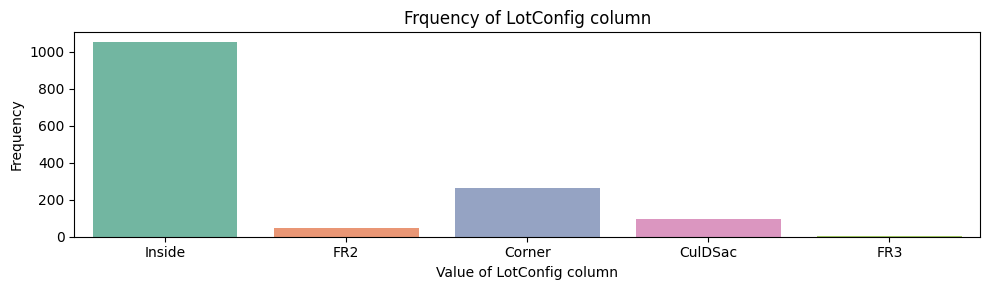

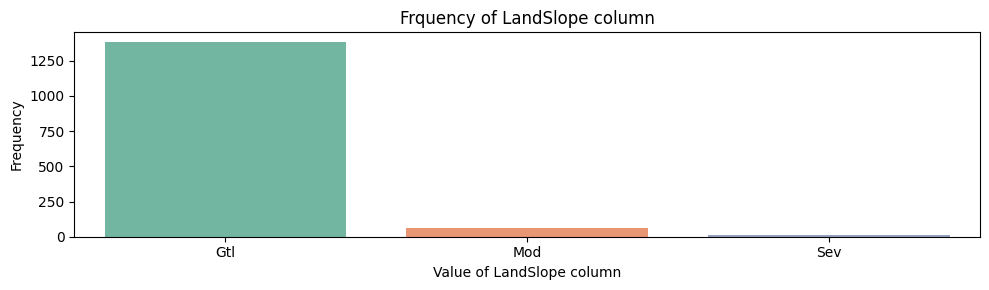

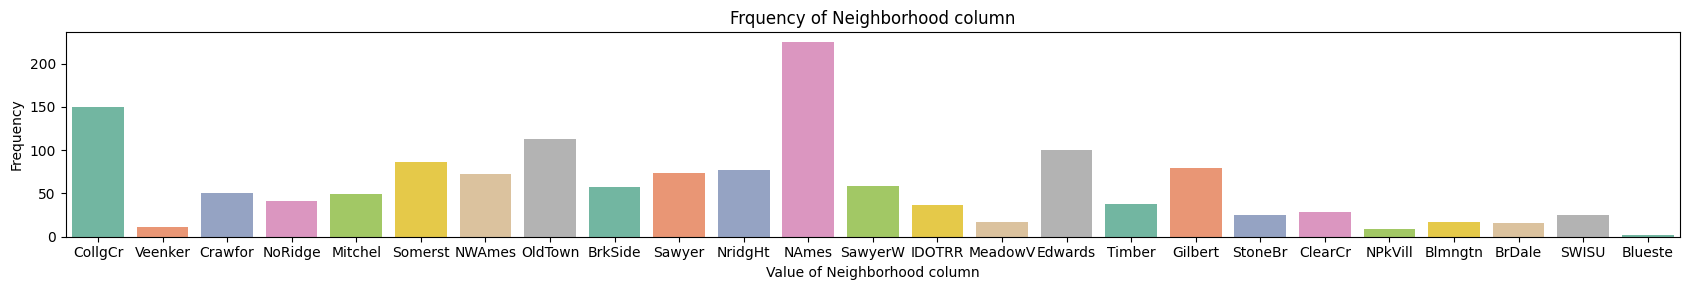

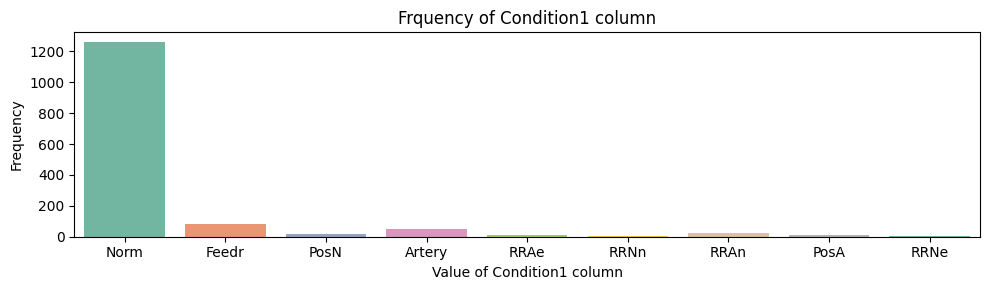

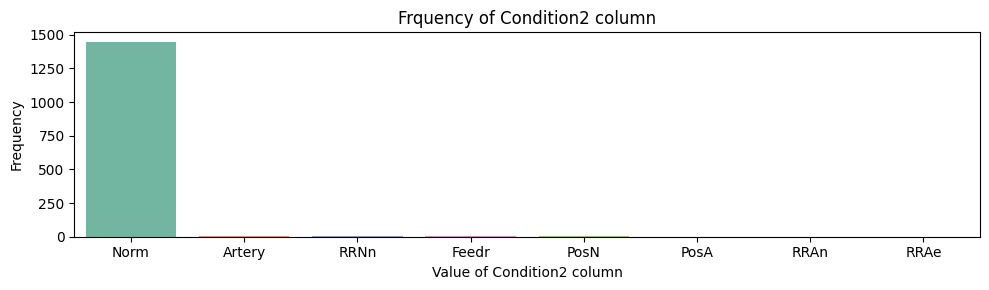

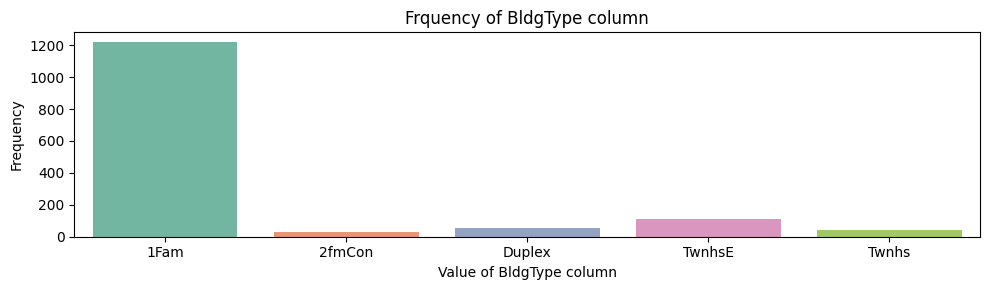

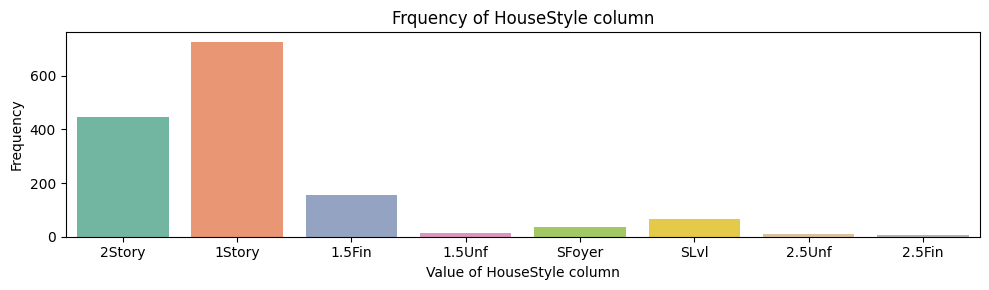

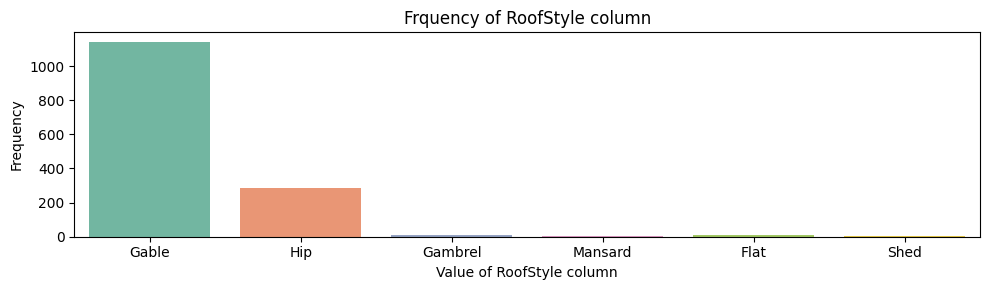

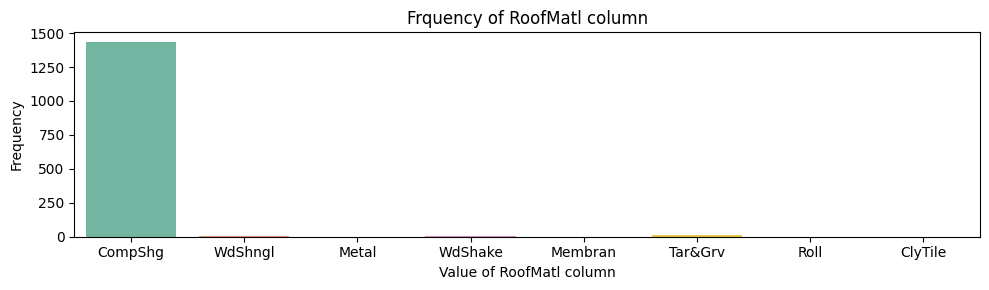

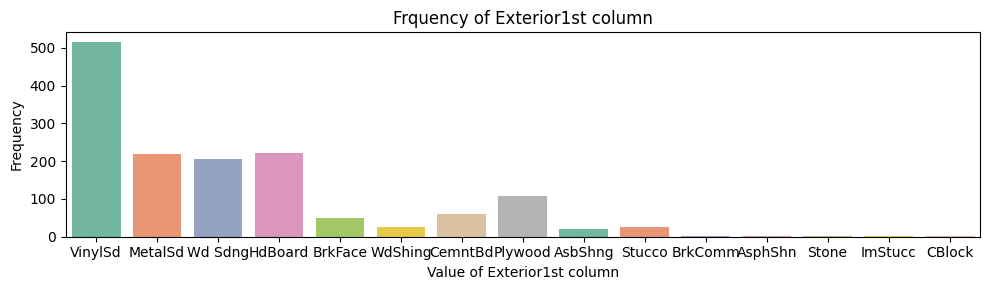

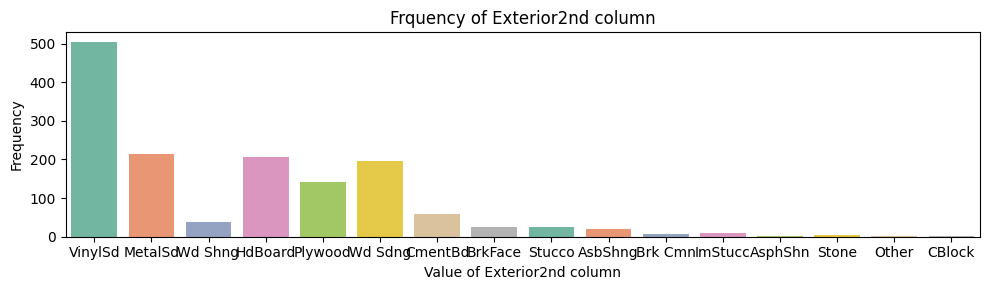

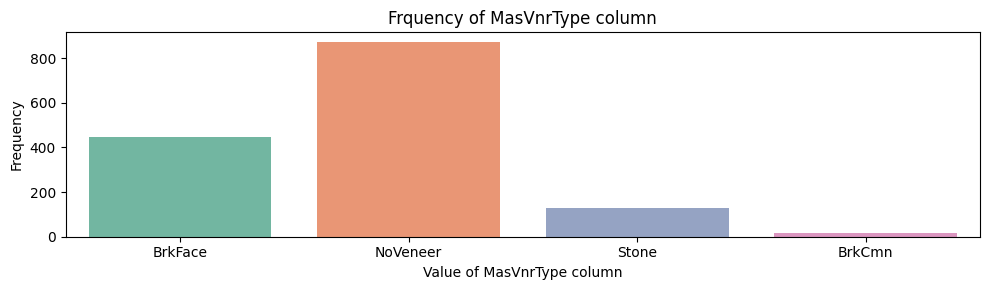

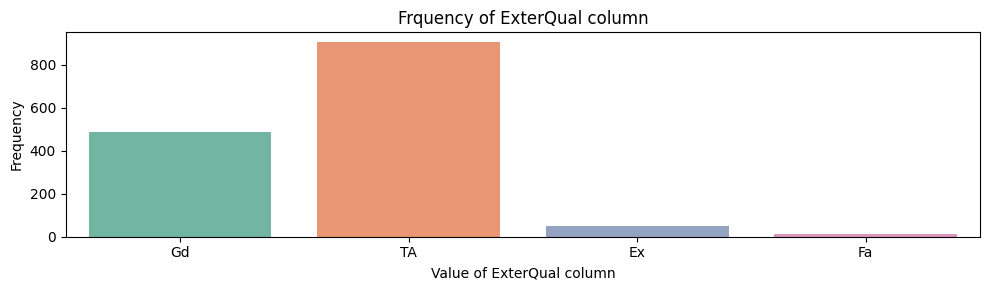

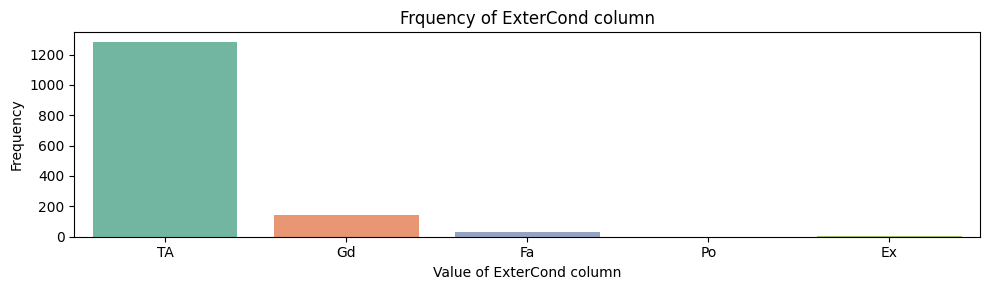

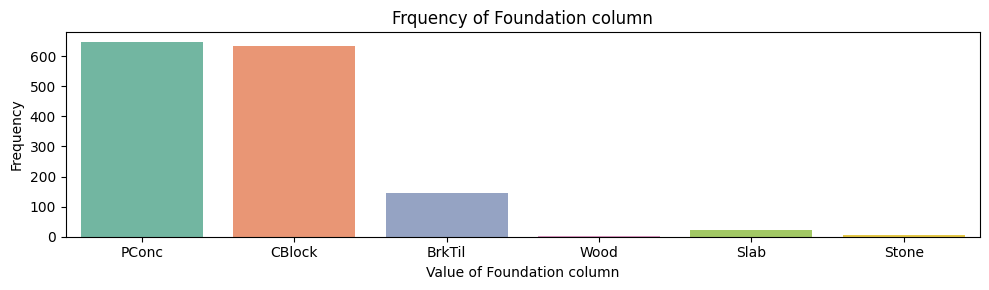

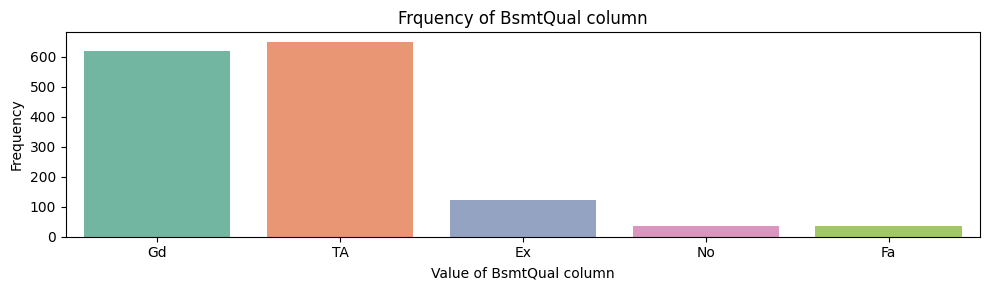

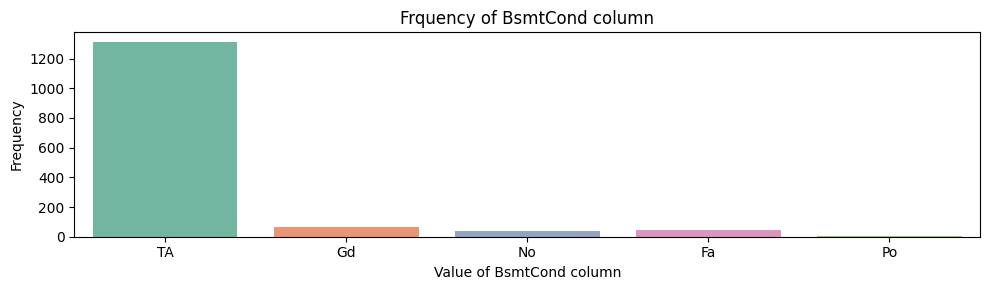

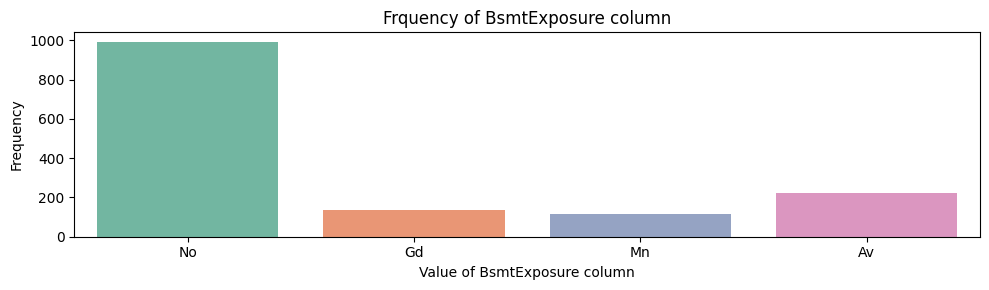

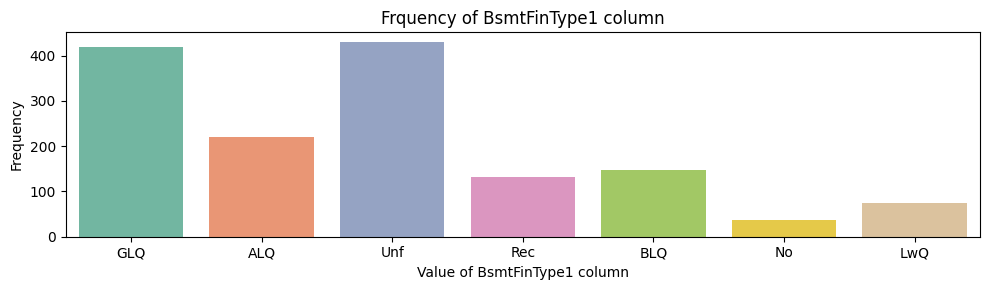

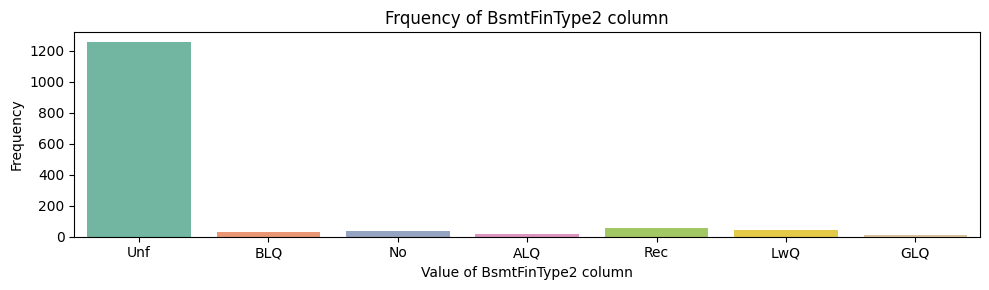

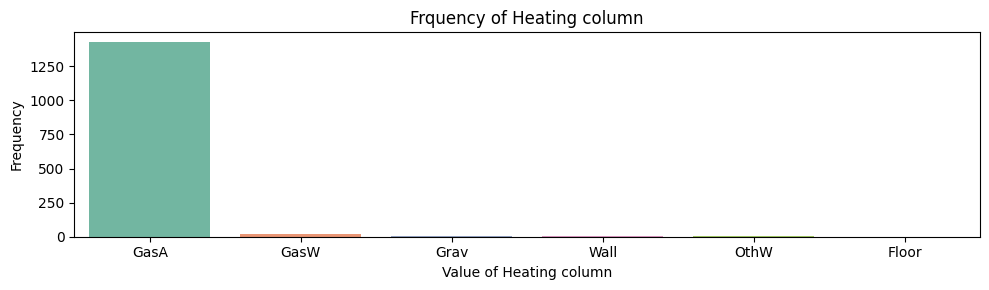

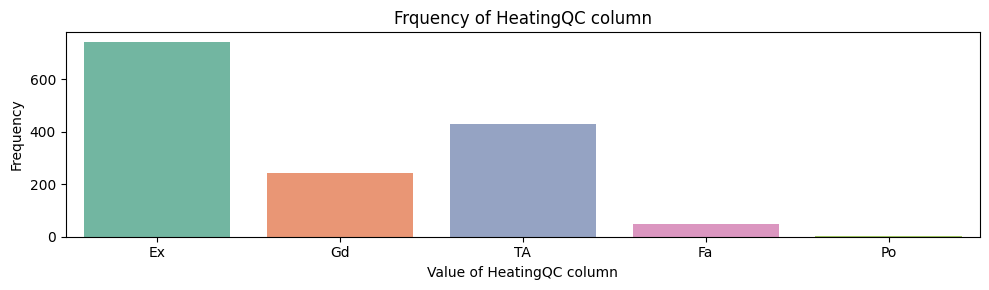

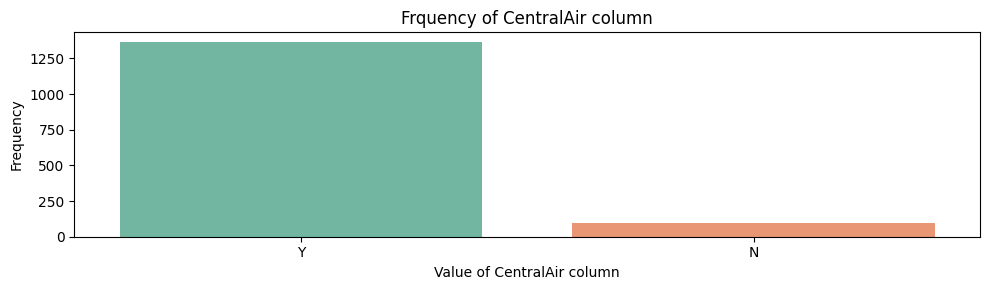

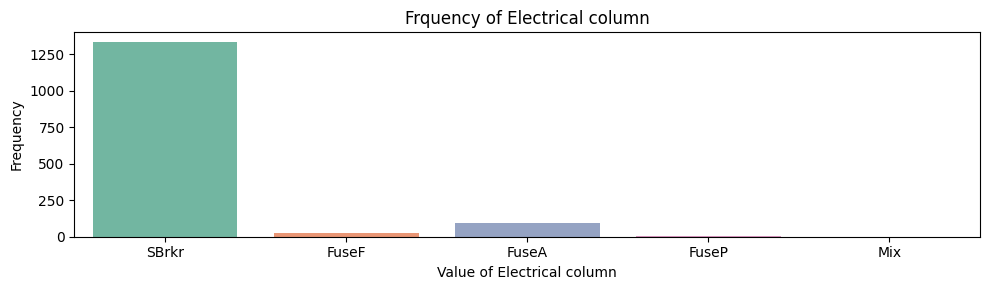

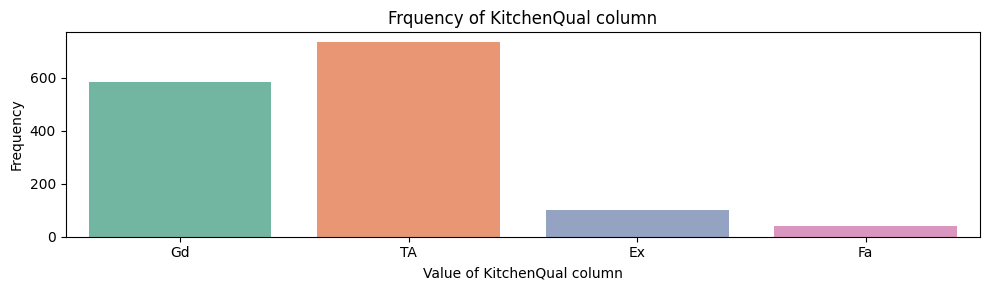

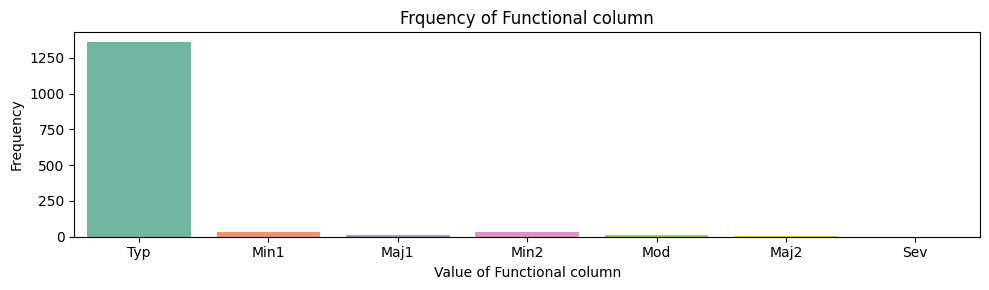

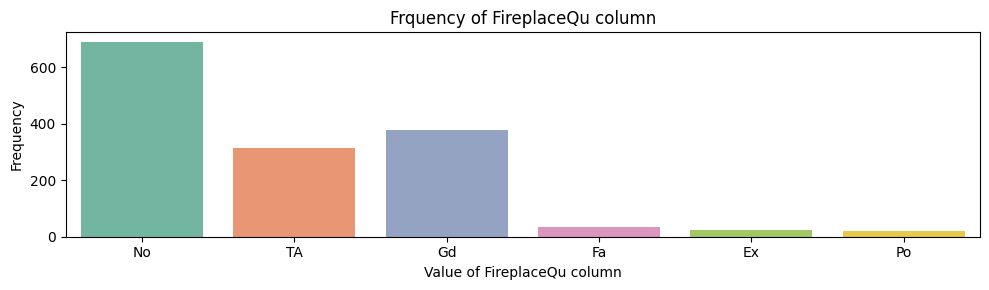

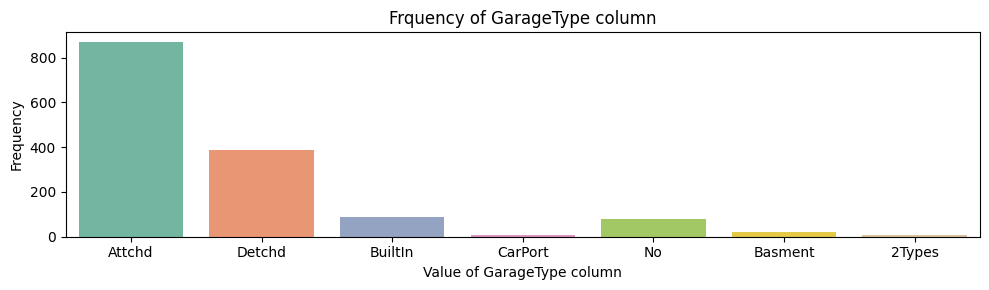

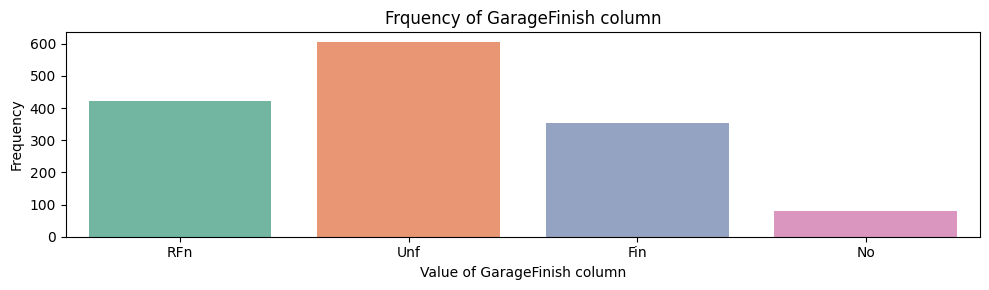

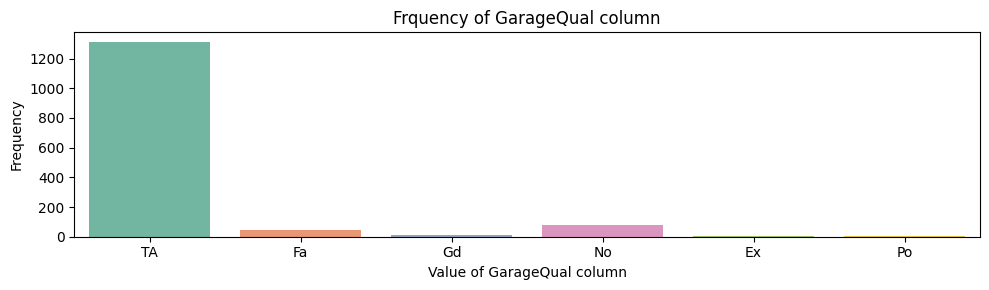

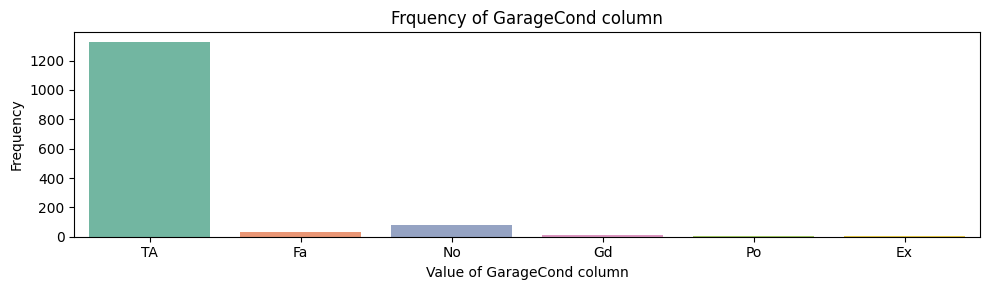

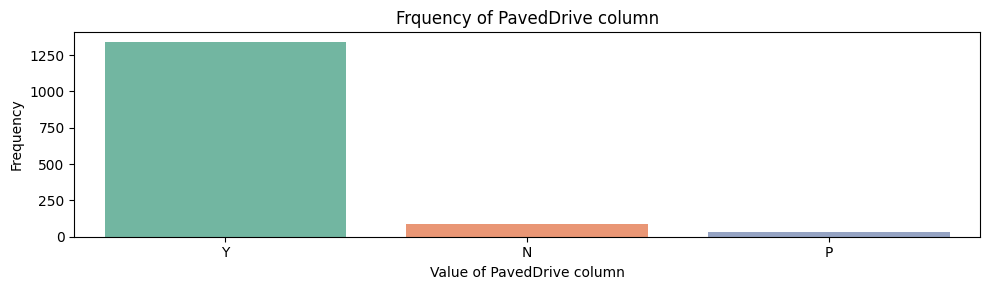

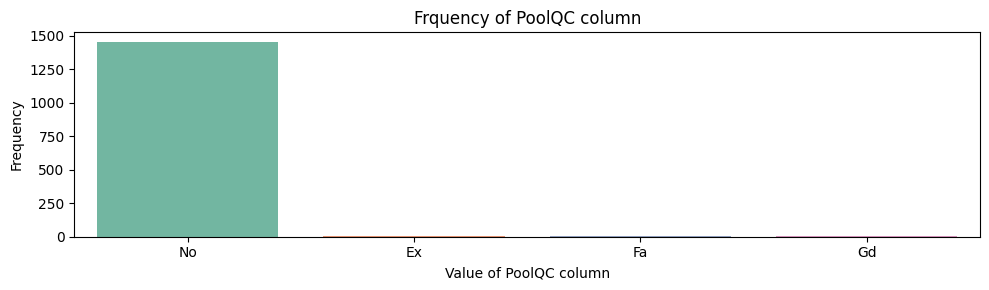

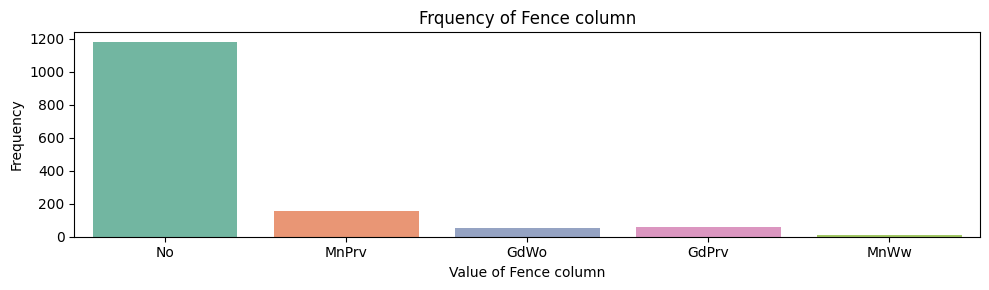

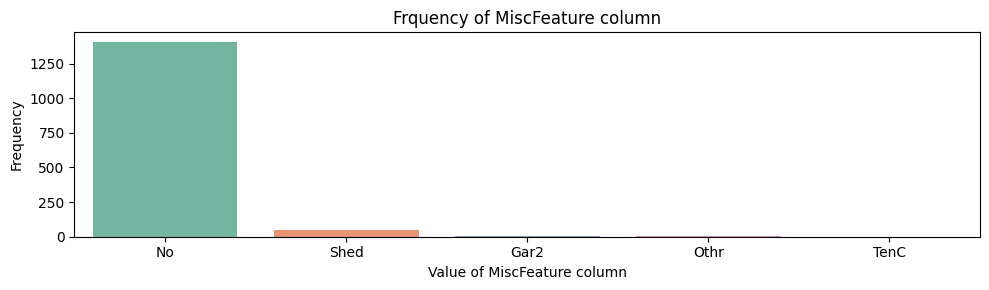

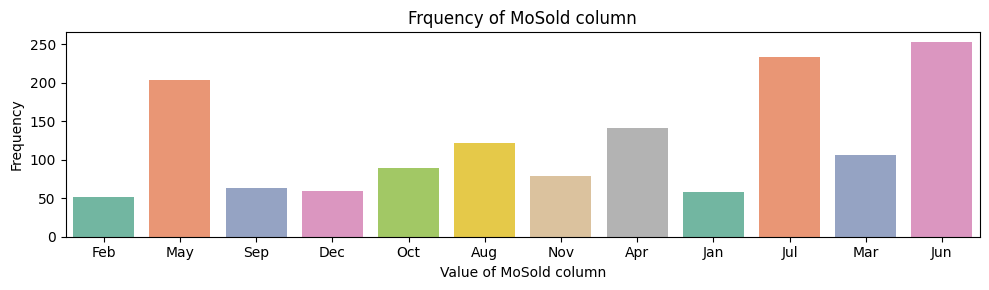

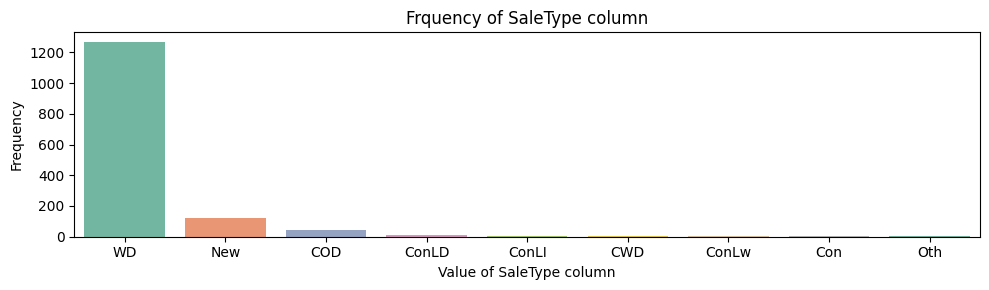

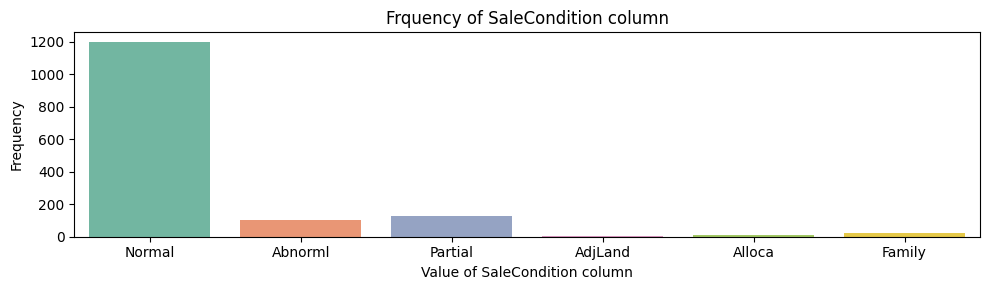

In [22]:
for col in housing_df_cateforical_cols.columns:
    if col == "Neighborhood":
        plt.figure(figsize=(17,3))
    else:
        plt.figure(figsize=(10,3))
    sns.countplot(x=col,data=housing_df_cateforical_cols,hue=col,palette="Set2",legend=False)
    plt.title(f"Frquency of {col} column")
    plt.xlabel(f"Value of {col} column")
    plt.ylabel(f"Frequency")
    plt.tight_layout()
    plt.show()

Insights for nominal columns:

1) For column MSSubClass:
SC20 (1‑Story, newer homes) is the most frequent category, indicating this is the dominant dwelling type in the dataset.
SC60 (2‑Story, newer homes) is the second most common, showing strong representation of modern multi‑story houses.
SC50 and SC120 have moderate frequency, suggesting a reasonable presence of older 1½‑story homes and PUD properties.
Several subclasses (e.g., SC40, SC180, SC75) appear very rarely, indicating niche or uncommon housing types.
The distribution is highly imbalanced, with a few subclasses dominating the dataset. 

2) For column MSZoning:
RL (Residential Low Density) overwhelmingly dominates the dataset, indicating most properties are single‑family homes in low‑density residential areas.
RM (Residential Medium Density) is the second most common category, suggesting a smaller presence of apartments or townhouses.
FV and RH appear infrequently, representing niche residential zoning types.
Commercial (C) zoning is very rare, showing the dataset is primarily residential.
The distribution is highly imbalanced, with RL accounting for the majority of observations. 


3) For column Street:
Pave overwhelmingly dominates the dataset, indicating that almost all properties have paved street access.
Grvl appears very rarely, representing only a negligible fraction of homes.
The column shows extreme class imbalance, with minimal variation across observations.
Due to low variability, this feature may have limited predictive power in modeling.

4) For column LotShape:
Regular (Reg) lots dominate the dataset, indicating most properties have standard, rectangular plots.
IR1 (slightly irregular) is the second most common category, showing some variation in lot geometry.
IR2 and IR3 are very rare, representing highly irregular plots with limited presence.
The distribution is imbalanced, with a strong skew toward regular lot shapes.

5) For column LandContour :
Lvl (level land) overwhelmingly dominates the dataset, indicating that most properties are built on flat terrain.
Bnk, Low, and HLS appear very infrequently, representing properties located on slopes, below street level, or on hillsides.
The distribution is highly imbalanced, with minimal variation in land contour across properties.
Due to the dominance of level terrain, this feature may have limited standalone impact unless interactions with other features are considered.

6) For column Utilities:
AllPub dominates the dataset, indicating that nearly all properties have access to all public utilities.
NoSeWa appears extremely rarely, showing minimal variation in utility availability.
The column exhibits near‑zero variance, with one category accounting for almost all observations.
Due to this extreme imbalance, the feature is likely to have very limited predictive contribution in most models.

7) For column LotConfig:
Inside lots overwhelmingly dominate the dataset, indicating most homes are standard interior properties.
Corner lots are the second most common, suggesting moderate representation of properties with increased street exposure.
Cul‑de‑sac lots appear less frequently but represent desirable, low‑traffic locations.
FR2 and FR3 configurations are rare, indicating very limited multi‑frontage properties.
The distribution is imbalanced, with a strong concentration in the “Inside” category.

8) For column LandSlope:
Gtl (gentle slope) overwhelmingly dominates the dataset, indicating the majority of properties are built on relatively flat or gently sloped land.
Mod (moderate slope) occurs infrequently, representing a small subset of properties with some elevation variation.
Sev (severe slope) is extremely rare, indicating very few properties are located on steep terrain.
The distribution is highly imbalanced, with minimal representation of moderate and steep slopes.

9) For Neighborhood column:
NAmes is the most frequent neighborhood, indicating it is a large, well‑represented residential area in the dataset.
CollgCr, OldTown, Edwards, and Somerst also show high representation, suggesting they are common or populous neighborhoods.
Several neighborhoods (e.g., Blueste, BrDale, NPkVill, MeadowV) appear very rarely, indicating niche or small localities.
The distribution is uneven and multi‑modal, reflecting diverse neighborhood sizes and housing availability.
This variation suggests strong location diversity, which is likely to introduce meaningful price differences across categories.

10) For Condition1 column:
Norm overwhelmingly dominates the dataset, indicating that most properties are not affected by special proximity conditions.
Feedr and Artery appear infrequently, representing homes near feeder or arterial roads.
Railroad‑related categories (RR*) are very rare, suggesting minimal exposure to rail proximity in the dataset.
Positive condition categories (PosN/PosA) are also uncommon.
Overall, the column is highly imbalanced, with limited variation beyond the “Norm” category.

11) For Condition2 column:
Norm overwhelmingly dominates the dataset, indicating that most properties do not have a secondary proximity condition.
All other categories appear extremely rarely, showing that additional external influences are uncommon.
The column exhibits near‑zero variance, with minimal informational contribution on its own.

12) For BldgType column:
1Fam (single‑family homes) overwhelmingly dominate the dataset, indicating the housing market is primarily composed of detached houses.
TwnhsE (end‑unit townhouses) appear more frequently than interior townhouses, suggesting moderate representation of attached housing.
Duplex properties exist but form a small portion of the dataset.
2fmCon and Twnhs (interior units) are relatively rare.
Overall, the distribution is highly imbalanced, favoring single‑family residences.

13) For HouseStyle column:
1Story homes are the most common, indicating a strong preference for single‑level living in the dataset.
2Story homes are the second most frequent, showing substantial representation of multi‑story layouts.
1.5Fin has moderate frequency, reflecting the presence of partially multi‑level homes.
Split‑level (SLvl) and split‑foyer (SFoyer) styles occur infrequently.
2.5‑story configurations (finished or unfinished) are extremely rare, representing niche architectural designs.
The distribution is skewed toward simpler, conventional housing styles.

14) For RoofStyle column:
Gable roofs overwhelmingly dominate the dataset, indicating they are the standard residential roof style.
Hip roofs are the second most common, suggesting a meaningful but smaller representation.
Gambrel, Mansard, Flat, and Shed roofs are extremely rare, representing niche architectural designs.
The distribution is highly imbalanced, with the majority of homes using conventional roof styles.

15) For RoofMatl column:
CompShg (composition shingles) overwhelmingly dominates the dataset, indicating it is the standard roofing material for most homes.
All other roof materials appear very rarely, representing niche or specialty construction.
The distribution shows extreme class imbalance, with minimal variation across roof materials.
Due to this imbalance, the feature may contribute limited standalone predictive power.

16) For Exterior1st column:
Vinyl siding (VinylSd) is the most dominant exterior material, indicating it is the standard choice for most homes.
Hardboard, metal siding, and wood siding also appear frequently, showing some diversity in exterior finishes.
Brick face and cement board have moderate presence, often associated with mid‑to‑higher quality homes.
Stucco, stone, asbestos shingles, and other materials are rare, representing niche or specialized construction.
The distribution is imbalanced, with a few materials accounting for the majority of properties.

17) For Exterior2nd column:
Vinyl siding (VinylSd) is again the most common secondary exterior, often paired with another leading material.
Metal siding, hardboard, wood siding, and plywood show moderate representation, indicating mixed‑material façades are fairly common.
Cement board and brick face appear occasionally, typically used as accent materials.
Stucco, asbestos shingles, stone, and other finishes are rare, reflecting niche or premium exterior treatments.
Overall, the distribution is skewed toward common siding materials, but shows more diversity than RoofMatl or some other exterior‑related features.

18) For MasVnrType column:
NoVeneer is the most frequent category, indicating that the majority of houses do not have any masonry veneer.
BrkFace is the second most common, suggesting brick veneer is a popular enhancement among homes that do use veneer.
Stone veneer appears infrequently, typically associated with higher‑end or premium properties.
BrkCmn is very rare, representing a niche or older construction style.
The distribution is imbalanced, with clear dominance of homes without veneer.

19) For ExterQual column:
TA (Typical/Average) is the most common rating, indicating most homes have standard exterior quality.
Gd (Good) is the second most frequent, showing a substantial portion of homes with above‑average exterior quality.
Ex (Excellent) is rare, representing high‑end properties with superior exterior finishes.
Fa (Fair) appears very infrequently, indicating few homes with below‑average exterior quality.
The distribution is skewed toward average and good quality, with limited extremes.

20) For ExterCond column:
TA (Typical/Average) overwhelmingly dominates the dataset, indicating most homes have normally maintained exteriors.
Gd (Good) appears far less frequently, showing a smaller subset of well‑maintained properties.
Fa (Fair) and Po (Poor) are very rare, suggesting few properties have noticeably degraded exteriors.
Ex (Excellent) is almost negligible, reflecting the scarcity of near‑perfect exterior conditions.
The distribution is highly concentrated around average condition, with limited extremes.

21) For Foundation column:
PConc (poured concrete) is the most common foundation type, indicating modern construction practices dominate.
CBlock (concrete block) appears nearly as frequently, showing widespread use in traditional residential construction.
BrkTil (brick & tile) has moderate representation
Slab, Stone, and Wood foundations are rare, reflecting niche or age‑specific construction styles.

22) For BsmtQual column:
TA (Typical/Average) and Gd (Good) dominate the distribution, indicating that most homes have average to good‑quality basements.
Ex (Excellent) basements are less common, representing higher‑end properties.
Fa (Fair) basements occur infrequently, suggesting few homes have low‑quality basements.
No basement appears in a small portion of the dataset.
Overall, the distribution is skewed toward usable, mid‑quality basements.

23) For BsmtCond column:
TA (Typical/Average) overwhelmingly dominates the distribution, indicating that most basements are in normal, well‑maintained condition.
Gd (Good) appears infrequently, suggesting fewer homes have notably better‑than‑average basement conditions.
Fa (Fair) is present but rare, reflecting limited signs of wear or minor issues in some homes.
Po (Poor) and No basement cases are extremely rare, indicating very few properties with serious basement conditions or no basement at all.
Overall, the column shows low variability, with most values clustered around average condition.

24) For BsmtExposure column:
No exposure overwhelmingly dominates the dataset, indicating that most basements are fully underground with no direct natural light.
Average (Av) exposure is the next most common category, suggesting a subset of homes have partially exposed or daylight basements.
Minimum (Mn) and Good (Gd) exposure occur less frequently.

25) For BsmtFinType1 column:
Unf (Unfinished) is one of the most frequent categories, indicating many homes have basements that are not finished.
GLQ (Good Living Quarters) also has high frequency, showing a significant number of homes with high‑quality finished basements.
ALQ (Average Living Quarters) appears moderately, representing typical finished basement spaces.
Rec and BLQ have lower but meaningful presence, reflecting recreational or below‑average basement finishes.
LwQ and No basement are relatively rare, indicating few homes with very poor finishes or no basement at all.
Overall, the distribution shows wide variation in basement usability and finish quality.

26) For  BsmtFinType2 column:
Unf (Unfinished) overwhelmingly dominates the distribution, indicating that most homes do not have a second finished basement area.
Rec and LwQ appear occasionally, suggesting some homes have secondary recreational or low‑quality finished spaces.
ALQ, BLQ, and GLQ are very rare, meaning high‑quality second finished areas are uncommon.
No basement cases are minimal.

27) For Heating column:
GasA (gas forced air) overwhelmingly dominates the dataset, indicating it is the standard heating system for most homes.
GasW appears very infrequently, representing a small number of older or alternative heating setups.
Grav, Wall, OthW, and Floor systems are extremely rare, suggesting obsolete or niche heating methods.
The distribution shows near‑zero variance, with one category accounting for almost all observations.

28) For HeatingQC column:
Excellent (Ex) is the most frequent category, indicating that many homes have well‑maintained, high‑quality heating systems.
Typical/Average (TA) is also highly represented, showing a large portion of standard heating conditions.
Good (Gd) appears moderately, sitting between average and excellent performance.
Fair (Fa) is relatively rare, and
Poor (Po) is almost negligible, indicating very few homes with severely deficient heating systems.
Overall, the distribution is skewed toward higher‑quality heating conditions.


29) For CentralAir column:
The vast majority of homes have central air (Y), indicating that central AC is a standard feature in this housing market.
Homes without central air (N) are very few, suggesting limited variation in this feature.
The column shows strong class imbalance, with “Yes” dominating the dataset.

30) For Electrical column:
SBrkr overwhelmingly dominates the dataset, indicating that most homes have modern electrical systems.
FuseA appears in a small number of homes, typically older but still serviceable properties.
FuseF, FuseP, and Mix are very rare, reflecting outdated or uncommon electrical setups.
The distribution is highly imbalanced, with modern wiring as the clear standard.

31) For KitchenQual column:
TA (Typical/Average) is the most common category, indicating most homes have standard, functional kitchens.
Gd (Good) is also highly represented, showing many homes have upgraded or above‑average kitchens.
Ex (Excellent) appears less frequently, representing high‑end or recently renovated kitchens.
Fa (Fair) is rare, suggesting very few homes have below‑average kitchen quality.
Overall, the distribution is skewed toward average and good kitchen quality, with limited extremes.

32) For Functional column:
Typ (Typical) overwhelmingly dominates the dataset, indicating that most homes have no functional issues.
Minor issues (Min1, Min2) appear in very small numbers, suggesting limited minor layout problems.
Moderate to major issues (Mod, Maj1, Maj2) are rare, representing a small subset of problematic homes.
Severe issues (Sev) are almost nonexistent, indicating very few homes with serious functional defects.

33) For FireplaceQU column:
No fireplace is the most common category, indicating that a large portion of homes do not have a fireplace.
Among homes with fireplaces, Good (Gd) and Typical/Average (TA) quality dominate, suggesting most fireplaces are functional and reasonably well‑built.
Excellent (Ex) fireplaces are rare, typically associated with higher‑end properties.
Fair (Fa) and Poor (Po) categories appear in very small numbers, indicating few low‑quality fireplaces.

34) For GarageType column:
Attached garages (Attchd) dominate the dataset, indicating they are the most common and standard garage type.
Detached garages (Detchd) are the second most frequent, often seen in older or differently planned properties.
Built‑in garages appear less frequently, representing homes where the garage is fully integrated into the structure.
No garage is present in a noticeable but small portion of homes, which may negatively influence desirability and value.
Basement, carport, and multiple‑type garages are rare, representing niche or uncommon designs.

35) For GarageFinish column:
Unfinished garages (Unf) are the most common, indicating that many garages are primarily used for parking or basic storage.
Rough finished (RFn) garages appear frequently, suggesting partial finishing is fairly common.
Fully finished garages (Fin) represent a moderate portion, often associated with better‑maintained or higher‑value homes.
No garage occurs in a small subset of properties.
Overall, the distribution shows wide variation in garage usability, with a tilt toward unfinished or partially finished spaces.

36) For  GarageQual column:
TA (Typical/Average) overwhelmingly dominates the dataset, indicating that most garages are of standard construction quality.
No garage appears in a small but noticeable portion of homes.
Fa (Fair) quality garages occur infrequently, suggesting limited lower‑quality garage construction.
Gd (Good) and Ex (Excellent) are very rare, indicating few high‑end garages.
Po (Poor) is almost negligible.
Overall, the column shows low variability, with most garages clustered around average quality.

37) For GarageCond column:
TA (Typical/Average) overwhelmingly dominates the dataset, indicating that most garages are in normal, adequately maintained condition.
No garage appears in a small but noticeable subset of properties.
Fa (Fair) condition garages occur infrequently, suggesting limited maintenance issues in some homes.
Gd (Good) and Ex (Excellent) are very rare, showing few exceptionally well‑maintained garages.
Po (Poor) is almost negligible, indicating very few garages in poor condition.

38) For PavedDrive column:
Paved driveways (Y) overwhelmingly dominate the dataset, indicating that most homes have fully paved driveways.
Not‑paved (N) driveways appear infrequently, suggesting limited presence of unimproved access.
Partially paved (P) driveways are very rare, representing niche or transitional cases.

39) For PoolQC column:
No pool overwhelmingly dominates the dataset, indicating that the vast majority of homes do not have a swimming pool.
Pools with quality ratings (Ex, Gd, Fa) are extremely rare, showing that pools are a niche feature in this housing market.
Among homes with pools, quality variation exists, but sample sizes are very small.

40) For Fence column:
No fence overwhelmingly dominates the dataset, indicating that most properties do not have fencing.
Minimum privacy fences (MnPrv) are the most common among fenced properties, suggesting modest fencing is preferred when present.
Good privacy (GdPrv) and good wood fences (GdWo) appear infrequently, representing higher‑quality or more private properties.
Minimum wood/wire fencing (MnWw) is very rare, indicating limited use of low‑end fencing.

41) For MiscFeature column:
No miscellaneous feature overwhelmingly dominates the dataset, indicating that most homes do not have extra amenities beyond standard features.
Shed is the most common non‑null category, suggesting storage sheds are the most frequent add‑on.
Gar2, Othr, and TenC are extremely rare, representing niche or luxury features.
The column shows extreme sparsity and imbalance, with very limited variation.

42) For MoSold column:
Peak sales occur in late spring and early summer, with June and July showing the highest number of transactions.
May also has high sales volume, reinforcing strong summer seasonality in the housing market.
Winter months (January, February, December) show significantly fewer sales, indicating reduced market activity.
Fall months (September–November) exhibit moderate, stable activity but remain below summer peaks.

43) For SaleType column:
WD (standard warranty deed sales) overwhelmingly dominate the dataset, indicating that most transactions are normal open‑market sales.
New construction sales form the second‑largest group, representing builder‑to‑buyer transactions.
COD (cash on delivery) appears occasionally, suggesting a limited number of cash‑based closings.
Contract‑based sales (Con*) and other sale types are rare, reflecting non‑standard or special‑financing agreements.

44) For SaleCondition column:
Normal sales overwhelmingly dominate the dataset, indicating that most transactions occur under standard market conditions.
Partial sales are the second most common, often associated with new construction or incomplete homes.
Abnormal sales appear less frequently, representing distressed or non‑typical transactions.
Family, Alloca, and AdjLand sales are very rare, reflecting niche or special‑case transactions.

Bi and Multivariant Analysis:

1) OverQuall vs SalePrice

In [23]:
## checking the skeweness of OverQuall and SalePrice 
print(housing_df['OverallQual'].skew()) # Skewed level is with in accepted range: - 0.2169439277628693, hence no transformation is needed.
print(housing_df['SalePrice'].skew())   # SalePrice is highly right-skewed, hence log transformation is applied.

housing_df['SalePrice_log_transformed'] = np.log1p(housing_df['SalePrice']) # log1p transformed column
print(housing_df['SalePrice_log_transformed'].skew())  # checking skewness after tranforming it = 0.12134661989685333



0.2169439277628693
1.8828757597682129
0.12134661989685333


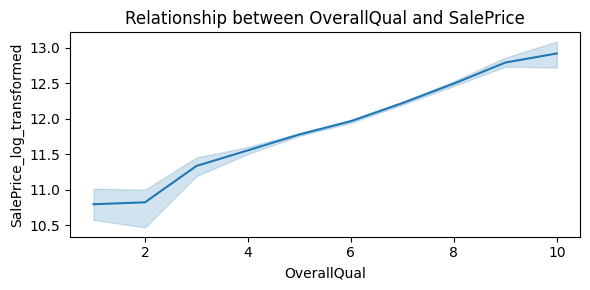

In [24]:
plt.figure(figsize=(6,3))
sns.lineplot(data=housing_df,x='OverallQual',y='SalePrice_log_transformed')
plt.xlabel(f"OverallQual")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between OverallQual and SalePrice")
plt.tight_layout()
plt.show()

In [25]:
cols = ['OverallQual','SalePrice_log_transformed']
corr_OverallQual_SalePrice = round(housing_df[cols].corr(),2)
corr_OverallQual_SalePrice                             # Correlation coefficient > 0.5 shows strong +ve relationship



OverallQual  SalePrice_log_transformed
OverallQual                       1.00                       0.82
SalePrice_log_transformed         0.82                       1.00

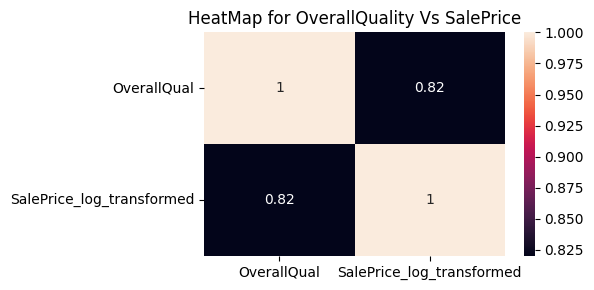

In [26]:
plt.figure(figsize=(6,3))
sns.heatmap(corr_OverallQual_SalePrice, annot= True)
plt.title('HeatMap for OverallQuality Vs SalePrice')
plt.tight_layout()
plt.show()

Insight: Strong positive relationship, as OverallQual increases, SalePrice (log-transformed) increases consistently

2) GrLivArea vs SalePrice(transformed)

In [27]:
## checking skewness of GrLivArea
print(housing_df['GrLivArea'].skew())
## applying square root transformation 

housing_df['GrLivArea_sqrt_trnsfmd'] = np.sqrt(housing_df['GrLivArea'])
housing_df['GrLivArea_sqrt_trnsfmd'].skew() # after tranformation value = (0.5942546260858922) which is acceptable

1.3665603560164552


np.float64(0.5942546260858922)

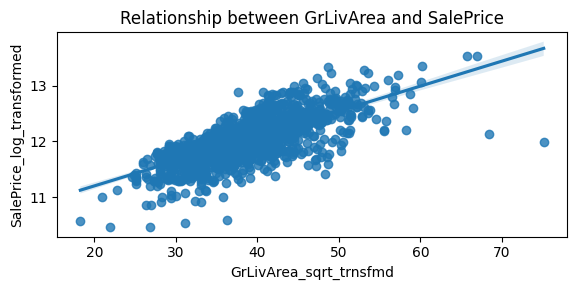

In [28]:
plt.figure(figsize=(6,3))
sns.regplot(data=housing_df,x='GrLivArea_sqrt_trnsfmd',y='SalePrice_log_transformed')
plt.xlabel(f"GrLivArea_sqrt_trnsfmd")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between GrLivArea and SalePrice")
plt.tight_layout()
plt.show()

In [29]:
cols = ['GrLivArea_sqrt_trnsfmd','SalePrice_log_transformed']
corr_GrLivArea_sqrt_trnsfmd_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_GrLivArea_sqrt_trnsfmd_SalePrice_log_transformed    # correlation coefficient > 0.5



GrLivArea_sqrt_trnsfmd  SalePrice_log_transformed
GrLivArea_sqrt_trnsfmd                       1.00                       0.72
SalePrice_log_transformed                    0.72                       1.00

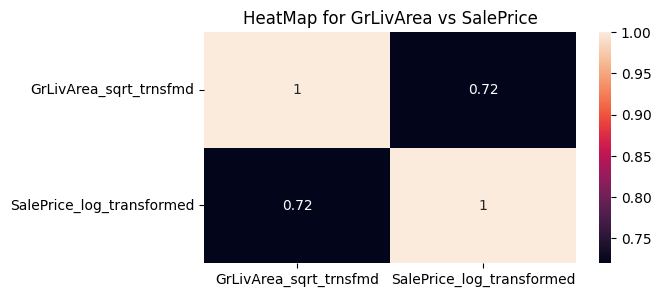

In [30]:
plt.figure(figsize=(6,3))
sns.heatmap(corr_GrLivArea_sqrt_trnsfmd_SalePrice_log_transformed, annot=True) 
plt.title('HeatMap for GrLivArea vs SalePrice')
plt.show()

Insight:
The plot shows a strong, nearly linear upward trend—homes with higher above‑ground living area tend to have higher sale prices, however there are few points at higher GrLivArea_sqrt_trnsfmd appear below the general trend, suggesting potentiall outliers - large homes with unusually low prices. 

3) TotalBsmtSF vs SalePrice

In [31]:
## checking skewness of TotalBsmtSF
print(housing_df['TotalBsmtSF'].skew()) #right skewed 1.5242545490627664

## Tried multiple transformation directly on TotalBsmtSF but it didn't get transform. 
## Hence tried to split the column in two portions where it HasBasement and not, and then apply Logtransformation on HasBasement.

housing_df['HasBaseMent'] = (housing_df['TotalBsmtSF'] > 0).astype(int) # Flitering out data which has basement and converting it into 1 or 0
housing_df['TotalBsmtSF_trsfrmd'] = 0.0  ## assiging float 
mask = housing_df['TotalBsmtSF'] > 0     ## taking only values which has basement
housing_df.loc[mask,'TotalBsmtSF_trsfrmd'] = np.log1p(housing_df.loc[mask,'TotalBsmtSF'])
print(housing_df.loc[mask,'TotalBsmtSF_trsfrmd'].skew())

1.5242545490627664
-0.2727204041472883


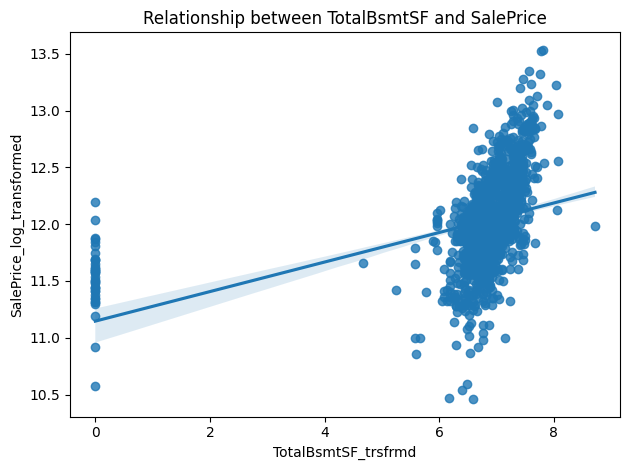

In [32]:
plt.Figure(figsize=(6,3))
sns.regplot(data=housing_df,x='TotalBsmtSF_trsfrmd',y='SalePrice_log_transformed')
plt.xlabel(f"TotalBsmtSF_trsfrmd")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between TotalBsmtSF and SalePrice")
plt.tight_layout()
plt.show()


In [33]:
cols = ['TotalBsmtSF_trsfrmd','SalePrice_log_transformed']
corr_TotalBsmtSF_trsfrmd_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_TotalBsmtSF_trsfrmd_SalePrice_log_transformed   # Cofficient < 0.5, shows +ve but weak correlation

TotalBsmtSF_trsfrmd  SalePrice_log_transformed
TotalBsmtSF_trsfrmd                       1.00                       0.37
SalePrice_log_transformed                 0.37                       1.00

Insight:
The chart shows a clear positive association between basement size (transformed) and sale price(transformed), with a distinct separation between no-basement and basement homes

4)  1stFlrSF vs SalePrice

In [34]:
## checking skewness of 1stFlrSF
print(housing_df['1stFlrSF'].skew()) # positively skewed = 1.3767566220336365

housing_df['1stFlrSF_log_trfmed'] = np.log1p(housing_df['1stFlrSF']) # Applying log1p transformation
print(housing_df['1stFlrSF_log_trfmed'].skew()) # checking skewness after applying transformation

1.3767566220336365
0.08011408968181778


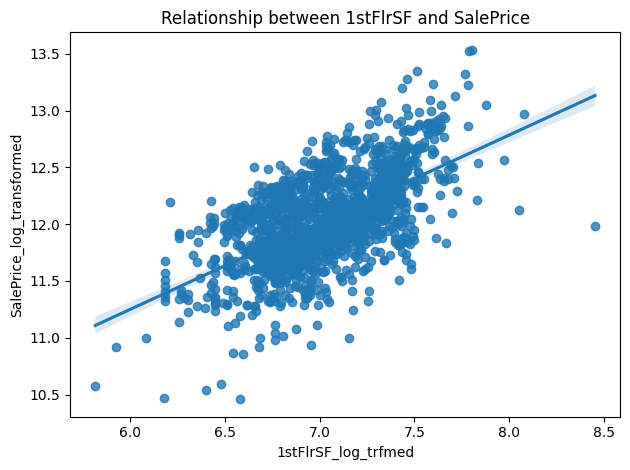

In [35]:
plt.Figure(figsize=(6,3))
sns.regplot(data=housing_df,x='1stFlrSF_log_trfmed',y='SalePrice_log_transformed')
plt.xlabel(f"1stFlrSF_log_trfmed")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between 1stFlrSF and SalePrice")
plt.tight_layout()
plt.show()

In [36]:
cols = ['1stFlrSF_log_trfmed','SalePrice_log_transformed']
corr_1stFlrSF_log_trfmed_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_1stFlrSF_log_trfmed_SalePrice_log_transformed   # Cofficient > 0.5, shows +ve and strong correlation

1stFlrSF_log_trfmed  SalePrice_log_transformed
1stFlrSF_log_trfmed                       1.00                       0.61
SalePrice_log_transformed                 0.61                       1.00

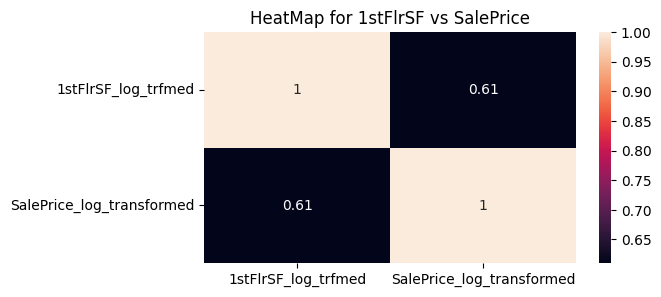

In [37]:
plt.figure(figsize=(6,3))
sns.heatmap(corr_1stFlrSF_log_trfmed_SalePrice_log_transformed, annot=True) 
plt.title('HeatMap for 1stFlrSF vs SalePrice')
plt.show()

Insight: 
The scatter shows a clear upward trend—homes with larger 1st-floor area (log-transformed) generally have higher sale prices (log-transformed) and +ve strong correlation between two columns. This indicates 1stFlrSF is a strong price driver.

5) GarageArea vs SalePrice

0.17998090674623907


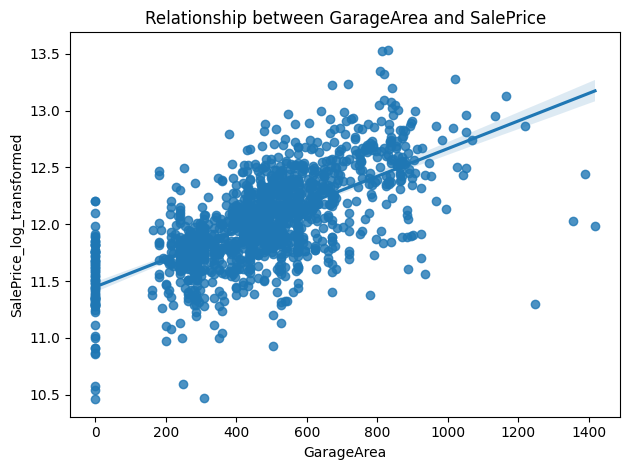

In [38]:
## checking the skewness of GarageArea
print(housing_df['GarageArea'].skew()) # skewness is well within range and tranformation is not needed. 

plt.Figure(figsize=(6,3))
sns.regplot(data=housing_df,x='GarageArea',y='SalePrice_log_transformed')
plt.xlabel(f"GarageArea")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between GarageArea and SalePrice")
plt.tight_layout()
plt.show()

In [39]:
cols = ['GarageArea','SalePrice_log_transformed']
corr_GarageArea_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_GarageArea_SalePrice_log_transformed   # Cofficient > 0.5, shows +ve and strong correlation

GarageArea  SalePrice_log_transformed
GarageArea                       1.00                       0.65
SalePrice_log_transformed        0.65                       1.00

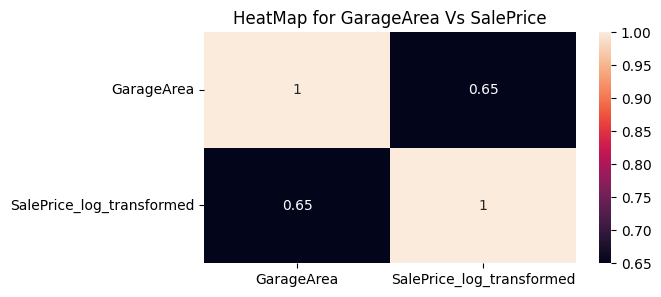

In [40]:
plt.figure(figsize=(6,3))
sns.heatmap(corr_GarageArea_SalePrice_log_transformed, annot=True) 
plt.title('HeatMap for GarageArea Vs SalePrice')
plt.show()

Insight: 
Positive relationship: As GarageArea increases, SalePrice (log-transformed) generally increases, indicating garage size contributes positively to home value.
Clear “no-garage” cluster: The vertical stack at GarageArea ≈ 0 suggests many homes have no garage, and these typically sit at lower log-prices, so garage presence itself is a strong signal.
Potential outliers: A few high-garage-area homes with comparatively lower prices (and vice versa) may be special cases. 

6) LotArea vs SalePrice

In [41]:
## checking skewness of LotArea
print(housing_df['LotArea'].skew()) # highly right skewed = 12.207687851233496

housing_df['LotArea_log_trnsfrmed'] = np.log1p(housing_df['LotArea'])  ## applying log1p transformation
print(housing_df['LotArea_log_trnsfrmed'].skew())   ## checking skewness of after applying transformation = -0.13740448122837784 

12.207687851233496
-0.13740448122837784


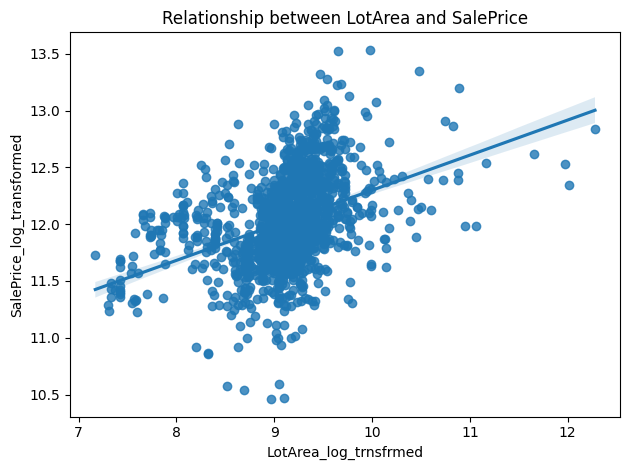

In [42]:
plt.Figure(figsize=(6,3))
sns.regplot(data=housing_df,x='LotArea_log_trnsfrmed',y='SalePrice_log_transformed')
plt.xlabel(f"LotArea_log_trnsfrmed")
plt.ylabel(f"SalePrice_log_transformed")
plt.title(f"Relationship between LotArea and SalePrice")
plt.tight_layout()
plt.show()

In [43]:
cols = ['LotArea_log_trnsfrmed','SalePrice_log_transformed']
corr_LotArea_log_trnsfrmed_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_LotArea_log_trnsfrmed_SalePrice_log_transformed   # Cofficient < 0.5, shows +ve but weak correlation

LotArea_log_trnsfrmed  SalePrice_log_transformed
LotArea_log_trnsfrmed                        1.0                        0.4
SalePrice_log_transformed                    0.4                        1.0

Insight: 
Positive but week correlation, the plot shows a clear upward trend—as log-transformed LotArea increases, log(SalePrice) generally increases, indicating larger lots tend to be associated with higher prices.  A handful of homes with relatively large lots have lower-than-expected prices (below the trendline), which may reflect location or quality effects or special sale conditions

7) House_Age vs SalePrice.
House_Age was not available in the data set. Performed feature engineering and created that column. 
YrSold - YearBuilt

In [44]:
housing_df.columns[housing_df.columns.str.contains('Y')]
housing_df['House_Age']= housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['House_Age'].head()


0     5
1    31
2     7
3    91
4     8
Name: House_Age, dtype: int64

0.61
-0.18


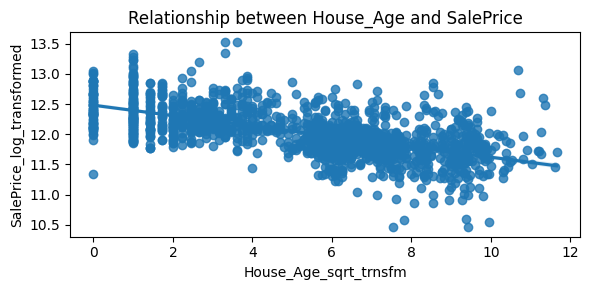

In [45]:
## checking skewness of House_Age
print(round(housing_df['House_Age'].skew(),2))  #Skewness is not within acceptance level and transformation is needed. 
housing_df['House_Age_sqrt_trnsfm'] = np.sqrt(housing_df['House_Age'])
print(round(housing_df['House_Age_sqrt_trnsfm'].skew(),2))  # skewness is within acceptance level.
plt.figure(figsize=(6,3))
sns.regplot(data=housing_df, x='House_Age_sqrt_trnsfm', y='SalePrice_log_transformed')
plt.title(f"Relationship between House_Age and SalePrice")
plt.xlabel(f"House_Age_sqrt_trnsfm")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()


In [46]:
cols = ['House_Age_sqrt_trnsfm','SalePrice_log_transformed']
corr_House_Age_sqrt_trnsfm_SalePrice_log_transformed = round(housing_df[cols].corr(),2)
corr_House_Age_sqrt_trnsfm_SalePrice_log_transformed               # cofficient is -0.62 shows fairly strong -ve correlation

House_Age_sqrt_trnsfm  SalePrice_log_transformed
House_Age_sqrt_trnsfm                       1.00                      -0.62
SalePrice_log_transformed                  -0.62                       1.00

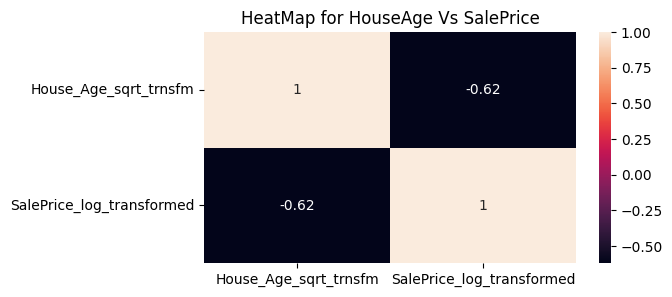

In [47]:
plt.figure(figsize=(6,3))
sns.heatmap(corr_House_Age_sqrt_trnsfm_SalePrice_log_transformed, annot = True)
plt.title("HeatMap for HouseAge Vs SalePrice")
plt.show()

Insight: House_Age shows a moderately strong negative correlation (−0.62) with SalePrice, meaning older homes generally sell for less. The scatterplot confirms a downward trend, with some variation due to renovated or well-located older houses. Overall, age influences price but is not the sole driver—other features also play a significant role

8) MasVnrArea Vs SalePrice

In [48]:
## checking MasVnrArea skewness
print(housing_df['MasVnrArea'].skew())  # Highly positive skewed column = 2.6776164510820997
housing_df['MasVnrArea_log_trnsfrmd'] = np.log1p(housing_df['MasVnrArea']) # Applied log1P transformation 
housing_df['MasVnrArea_log_trnsfrmd'].skew()                               # Skewness after log transformation = = 0.5035317177020202


2.6776164510820997


np.float64(0.5035317177020202)

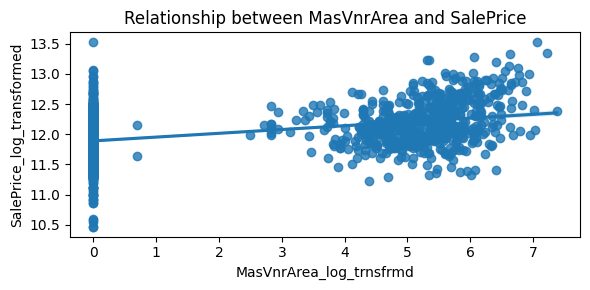

In [49]:
plt.figure(figsize=(6,3))
sns.regplot(data=housing_df, x='MasVnrArea_log_trnsfrmd', y='SalePrice_log_transformed')
plt.title(f"Relationship between MasVnrArea and SalePrice")
plt.xlabel(f"MasVnrArea_log_trnsfrmd")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

In [50]:
cols = ['MasVnrArea_log_trnsfrmd','SalePrice_log_transformed']
corr = round(housing_df[cols].corr(),2)
corr          # cofficient < 0.5 shows +ve but weak correlation

MasVnrArea_log_trnsfrmd  SalePrice_log_transformed
MasVnrArea_log_trnsfrmd                       1.00                       0.41
SalePrice_log_transformed                     0.41                       1.00

Insight: After log‑transform, higher masonry veneer area shows a slightly increasing relationship with sale price—but the slope is minimal.Many houses have no masonry veneer (0 values), causing a dense vertical strip on the left

9) OverallCond Vs SalePrice

0.6930674724842182


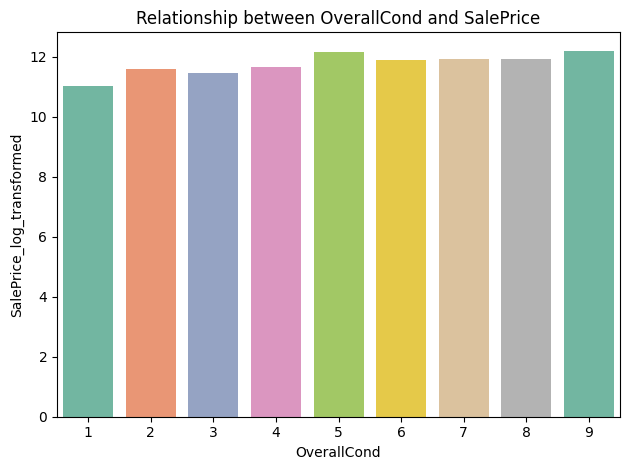

In [51]:
# checking the skewness of OverallCond column
print(housing_df['OverallCond'].skew())   # skewness is with in acceptance level. No transformatino is needed.

sns.barplot(data=housing_df,x='OverallCond',y='SalePrice_log_transformed',hue='OverallCond',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between OverallCond and SalePrice")
plt.xlabel(f"OverallCond")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: OverallCond shows only a mild upward trend with sale price; the relationship is weak.
Houses with condition ratings 5–9 have similar average prices, indicating limited predictive power.
Major jumps in price are not observed as condition improves, unlike OverallQual which typically shows a strong price gradient.

10) KitchenQual vs SalePrice

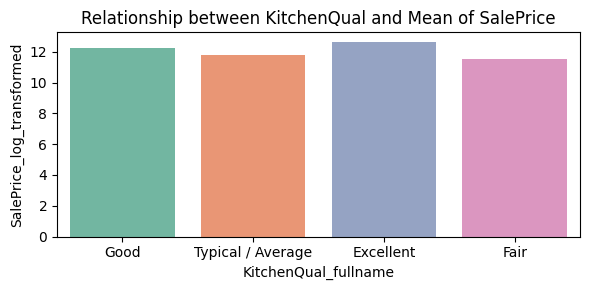

In [52]:
## Since KitchenQual is a categorical column, skewness check is not needed. 
mapping = {'Fa': 'Fair', 'TA': 'Typical / Average', 'Gd': 'Good', 'Ex': 'Excellent'}  # mapping the acronym with full name
plt.figure(figsize=(6,3))
housing_df['KitchenQual_fullname'] = housing_df['KitchenQual'].map(mapping)
sns.barplot(data=housing_df,x='KitchenQual_fullname',y='SalePrice_log_transformed',hue='KitchenQual_fullname',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between KitchenQual and Mean of SalePrice")
plt.xlabel(f"KitchenQual_fullname")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Homes with better kitchen quality show higher mean sale prices (log‑transformed).
The pattern follows a clear order: Fair < Typical/Average < Good < Excellent.
Kitchen quality is a strong, monotonic indicator of pricing differences.

11) ExterQual vs SalePrice

In [53]:
print(housing_df['ExterQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


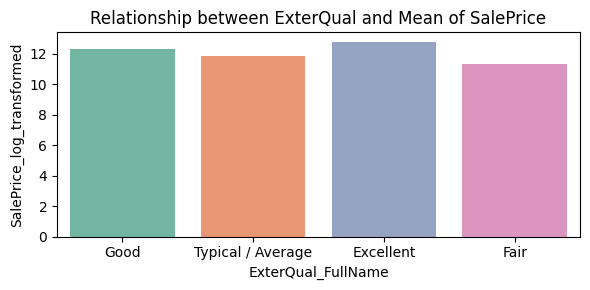

In [54]:
## Since ExterQual is categorical column, skewness is not needed.
mapping = {'Fa': 'Fair', 'TA': 'Typical / Average', 'Gd': 'Good', 'Ex': 'Excellent'}  # mapping the acronym with full name
housing_df['ExterQual_FullName'] = housing_df['ExterQual'].map(mapping)
plt.figure(figsize=(6,3))
sns.barplot(data=housing_df,x='ExterQual_FullName',y='SalePrice_log_transformed',hue='ExterQual_FullName',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between ExterQual and Mean of SalePrice")
plt.xlabel(f"ExterQual_FullName")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()


Insight : As exterior quality improves from Fair → Typical/Average → Good → Excellent, the mean sale price (log‑transformed) increases consistently. Homes with Excellent exterior quality show the highest prices, while Fair homes show the lowest, indicating a clear positive relationship between exterior quality and sale price.

12) HeatingQC Vs SalePrice

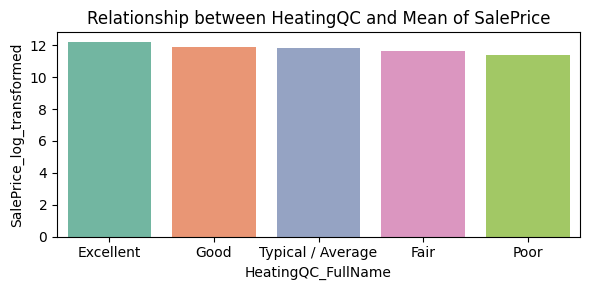

In [55]:
## ## Since HeatingQC is categorical column, skewness is not needed.
mapping = {'Fa': 'Fair', 'TA': 'Typical / Average', 'Gd': 'Good', 'Ex': 'Excellent','Po':'Poor'}  # mapping the acronym with full name
housing_df['HeatingQC_FullName'] = housing_df['HeatingQC'].map(mapping)
plt.figure(figsize=(6,3))
sns.barplot(data=housing_df,x='HeatingQC_FullName',y='SalePrice_log_transformed',hue='HeatingQC_FullName',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between HeatingQC and Mean of SalePrice")
plt.xlabel(f"HeatingQC_FullName")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Sale prices (log‑transformed) are highest for homes with Excellent heating quality, followed by Good, Typical/Average, Fair, and lowest for Poor. This shows a clear, monotonic positive relationship — better heating quality consistently corresponds to higher sale prices.

13) BsmtQual Vs SalePrice


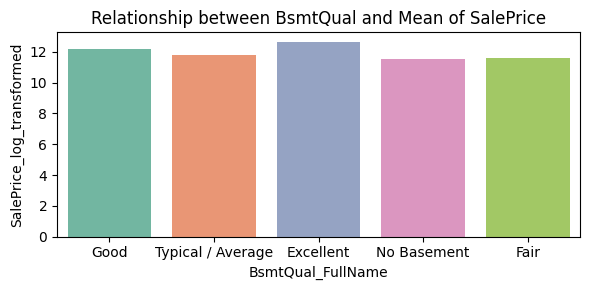

In [56]:
## ## Since BsmtQual is categorical column, skewness is not needed.
mapping = {'Fa': 'Fair', 'TA': 'Typical / Average', 'Gd': 'Good', 'Ex': 'Excellent','No':'No Basement'}  # mapping the acronym with full name
housing_df['BsmtQual_FullName'] = housing_df['BsmtQual'].map(mapping)
plt.figure(figsize=(6,3))
sns.barplot(data=housing_df,x='BsmtQual_FullName',y='SalePrice_log_transformed',hue='BsmtQual_FullName',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between BsmtQual and Mean of SalePrice")
plt.xlabel(f"BsmtQual_FullName")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Homes with Excellent basement quality show the highest mean sale prices (log‑transformed), followed by Good, Typical/Average, and Fair. Properties with no basement fall slightly below the mid‑range categories. Overall, basement quality has a clear, positive relationship with sale price.

14) GarageQual Vs SalePrice

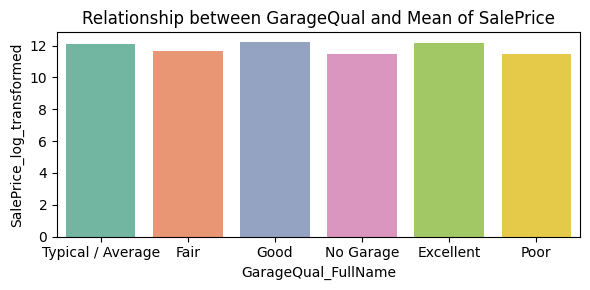

In [57]:
## ## Since GarageQual is categorical column, skewness is not needed.
mapping = {'Fa': 'Fair', 'TA': 'Typical / Average', 'Gd': 'Good', 'Ex': 'Excellent','No':'No Garage','Po':'Poor'}  # mapping the acronym with full name
housing_df['GarageQual_FullName'] = housing_df['GarageQual'].map(mapping)
plt.figure(figsize=(6,3))
sns.barplot(data=housing_df,x='GarageQual_FullName',y='SalePrice_log_transformed',hue='GarageQual_FullName',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between GarageQual and Mean of SalePrice")
plt.xlabel(f"GarageQual_FullName")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Sale prices (log‑transformed) are highest for homes with Excellent and Good garage quality, followed by Typical/Average and Fair, with Poor and No Garage showing the lowest values. This reflects a clear positive relationship between garage quality and sale price.

15) Neighborhood Vs SalePrice

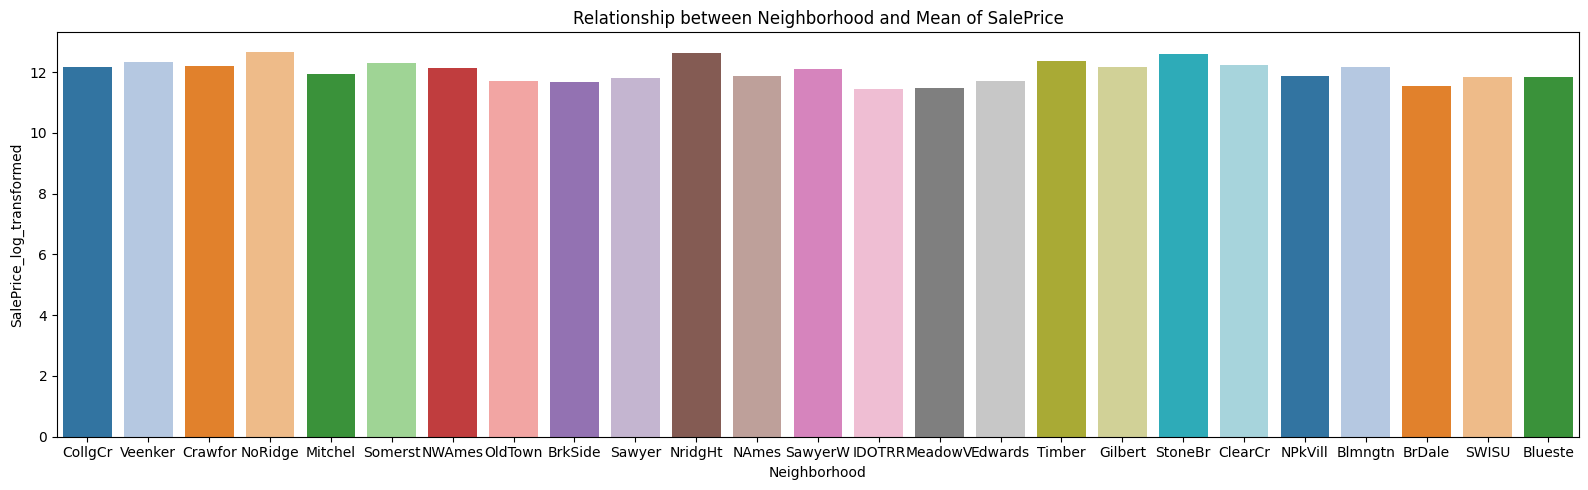

In [58]:
## Since Neighborhood is categorical column, skewness is not needed.
plt.figure(figsize=(16,5))
sns.barplot(data=housing_df,x='Neighborhood',y='SalePrice_log_transformed',hue='Neighborhood',
             palette=sns.color_palette("tab20", n_colors=housing_df['Neighborhood'].nunique()),
            legend=False,errorbar=None)
plt.title(f"Relationship between Neighborhood and Mean of SalePrice")
plt.xlabel(f"Neighborhood")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Neighborhoods show clear price variation, with some areas (like NridgHt, StoneBr, NoRidge) having noticeably higher mean sale prices (log‑transformed), while others (such as IDOTRR, BrDale, OldTown) sit at the lower end. Overall, neighborhood is a strong location-based differentiator of sale price in the dataset.

16) HouseStyle Vs SalePrice

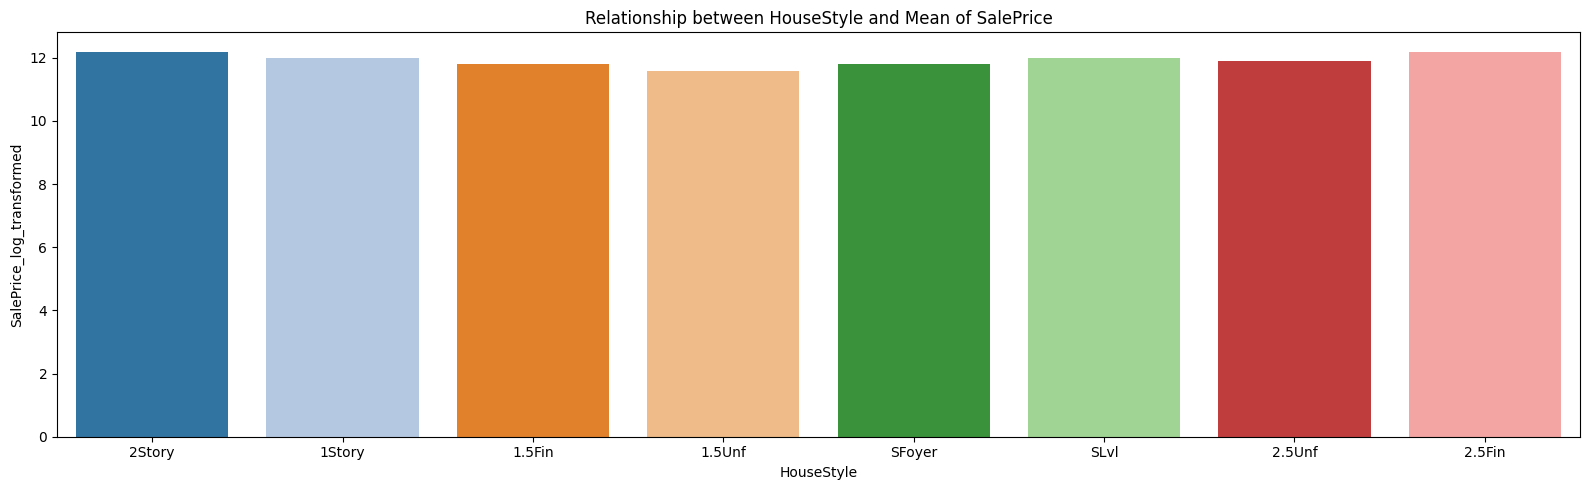

In [59]:
## Since HouseStyle is categorical column, skewness is not needed.
plt.figure(figsize=(16,5))
sns.barplot(data=housing_df,x='HouseStyle',y='SalePrice_log_transformed',hue='HouseStyle',
             palette=sns.color_palette("tab20", n_colors=housing_df['HouseStyle'].nunique()),
            legend=False,errorbar=None)
plt.title(f"Relationship between HouseStyle and Mean of SalePrice")
plt.xlabel(f"HouseStyle")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Among different house styles, 2Story and 2.5Fin homes show the highest mean sale prices (log‑transformed), while 1.5Unf and 1.5Fin sit slightly lower. Overall, house style influences price, but differences are moderate, with no extreme variation across categories.

17) SaleType Vs SalePrice

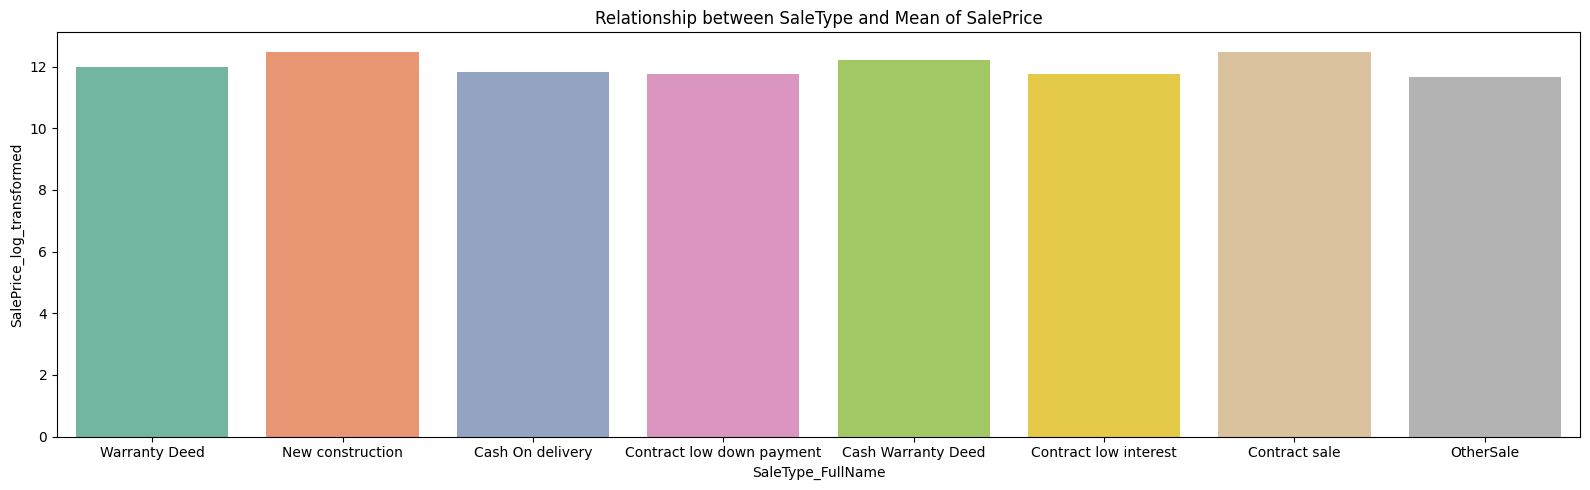

In [60]:
## Since SaleType is categorical column, skewness is not needed.
mapping = {'WD':'Warranty Deed','New':'New construction','COD':'Cash On delivery','ConLD':'Contract low down payment','ConLw':'Contract low interest',
           'CWD':'Cash Warranty Deed','Con':'Contract sale','Oth':'OtherSale'} 
housing_df['SaleType_FullName'] = housing_df['SaleType'].map(mapping)
plt.figure(figsize=(16,5))
sns.barplot(data=housing_df,x='SaleType_FullName',y='SalePrice_log_transformed',hue='SaleType_FullName',palette="Set2",legend=False,errorbar=None)
plt.title(f"Relationship between SaleType and Mean of SalePrice")
plt.xlabel(f"SaleType_FullName")
plt.ylabel(f"SalePrice_log_transformed")
plt.tight_layout()
plt.show()



Insight: New construction homes show the highest mean sale prices (log‑transformed), followed by warranty deed and contract sale types. Categories like cash delivery, low‑down‑payment contracts, and other sale types sit slightly lower. Overall, sale type shows a moderate positive influence on price, with new construction standing out at the top.

18. Correlation and HeatMap of Numerical columns Vs SalePrice

In [61]:
cols = ['SalePrice_log_transformed','OverallQual','GrLivArea_sqrt_trnsfmd','TotalBsmtSF_trsfrmd',
         '1stFlrSF_log_trfmed','GarageArea','LotArea_log_trnsfrmed',
         'House_Age_sqrt_trnsfm','MasVnrArea_log_trnsfrmd'] 

Numerical_corr = housing_df[cols].corr().round(2)
Numerical_corr

SalePrice_log_transformed  OverallQual  \
SalePrice_log_transformed                       1.00         0.82   
OverallQual                                     0.82         1.00   
GrLivArea_sqrt_trnsfmd                          0.72         0.61   
TotalBsmtSF_trsfrmd                             0.37         0.34   
1stFlrSF_log_trfmed                             0.61         0.46   
GarageArea                                      0.65         0.56   
LotArea_log_trnsfrmed                           0.40         0.18   
House_Age_sqrt_trnsfm                          -0.62        -0.64   
MasVnrArea_log_trnsfrmd                         0.41         0.41   

                           GrLivArea_sqrt_trnsfmd  TotalBsmtSF_trsfrmd  \
SalePrice_log_transformed                    0.72                 0.37   
OverallQual                                  0.61                 0.34   
GrLivArea_sqrt_trnsfmd                       1.00                 0.20   
TotalBsmtSF_trsfrmd                          0.20                 1.00   
1stFlrSF_log_trfmed                          0.54                 0.29   
GarageArea                                   0.48                 0.23   
LotArea_log_trnsfrmed                        0.39                 0.13   
House_Age_sqrt_trnsfm                       -0.27                -0.22   
MasVnrArea_log_trnsfrmd                      0.30                 0.18   

                           1stFlrSF_log_trfmed  GarageArea  \
SalePrice_log_transformed                 0.61        0.65   
OverallQual                               0.46        0.56   
GrLivArea_sqrt_trnsfmd                    0.54        0.48   
TotalBsmtSF_trsfrmd                       0.29        0.23   
1stFlrSF_log_trfmed                       1.00        0.49   
GarageArea                                0.49        1.00   
LotArea_log_trnsfrmed                     0.47        0.32   
House_Age_sqrt_trnsfm                    -0.29       -0.51   
MasVnrArea_log_trnsfrmd                   0.33        0.37   

                           LotArea_log_trnsfrmed  House_Age_sqrt_trnsfm  \
SalePrice_log_transformed                   0.40                  -0.62   
OverallQual                                 0.18                  -0.64   
GrLivArea_sqrt_trnsfmd                      0.39                  -0.27   
TotalBsmtSF_trsfrmd                         0.13                  -0.22   
1stFlrSF_log_trfmed                         0.47                  -0.29   
GarageArea                                  0.32                  -0.51   
LotArea_log_trnsfrmed                       1.00                  -0.02   
House_Age_sqrt_trnsfm                      -0.02                   1.00   
MasVnrArea_log_trnsfrmd                     0.07                  -0.39   

                           MasVnrArea_log_trnsfrmd  
SalePrice_log_transformed                     0.41  
OverallQual                                   0.41  
GrLivArea_sqrt_trnsfmd                        0.30  
TotalBsmtSF_trsfrmd                           0.18  
1stFlrSF_log_trfmed                           0.33  
GarageArea                                    0.37  
LotArea_log_trnsfrmed                         0.07  
House_Age_sqrt_trnsfm                        -0.39  
MasVnrArea_log_trnsfrmd                       1.00

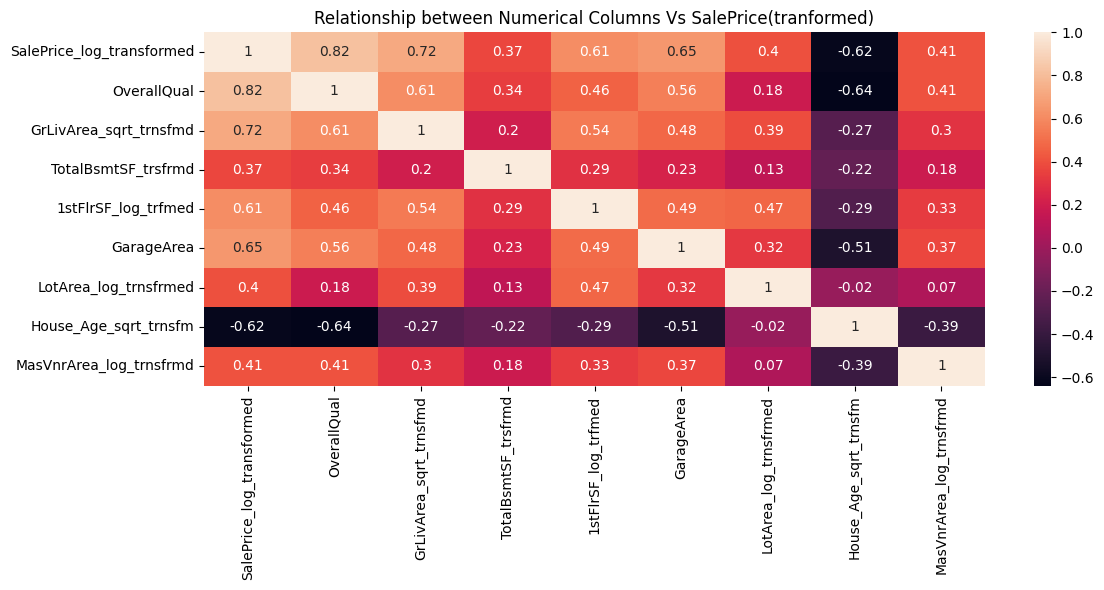

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(Numerical_corr, annot=True)
plt.title("Relationship between Numerical Columns Vs SalePrice(tranformed)")
plt.tight_layout()
plt.show()

Insight: SalePrice (log) is most strongly driven by OverallQual (0.82), GrLivArea (0.72), GarageArea (0.65), and 1stFlrSF (0.61). House_Age shows a moderate (to strong) negative correlation (-0.62), indicating older homes sell for less. LotArea (0.40), MasVnrArea (0.41), and TotalBsmtSF (0.37) have moderate positive relationships, suggesting secondary influence.

19. Relationship check GrLivArea Vs SalePrice by OverallQual

In [63]:
uni_value_OverallQual = housing_df['OverallQual'].unique() # Fetched the unique values of OverallQual column.
print(uni_value_OverallQual)  # printing unique values -> [ 7  6  8  5  9  4 10  3  1  2]
uni_value_OverallQual.sort()  # applying sorting
print(uni_value_OverallQual)  # printing sorted values



[ 7  6  8  5  9  4 10  3  1  2]
[ 1  2  3  4  5  6  7  8  9 10]


In [64]:
## creating bins for OverallQual column and given name OverallQual_Group
housing_df['OverallQual_Group'] = pd.cut(housing_df['OverallQual'],
bins = [1,4,7,10],
labels = ['low(1-4)','Moderate(5-7)','High(8-10)'], include_lowest=True
)


<Figure size 1000x400 with 0 Axes>

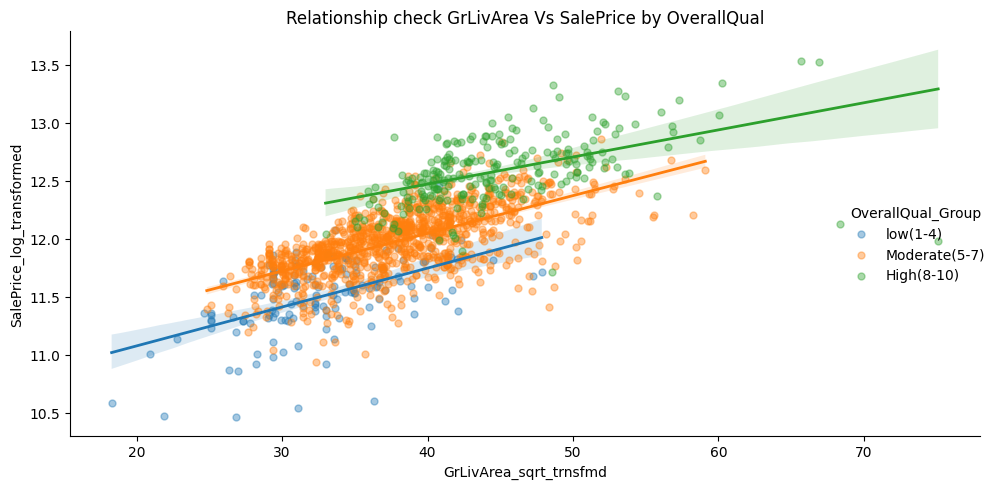

In [65]:
plt.figure(figsize=(10,4))

sns.lmplot(data=housing_df,x='GrLivArea_sqrt_trnsfmd',
y='SalePrice_log_transformed',
hue='OverallQual_Group',
scatter_kws={'alpha':0.4, 's':25},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.7
)
plt.title(f"Relationship check GrLivArea Vs SalePrice by OverallQual")
plt.xlabel("GrLivArea_sqrt_trnsfmd")
plt.ylabel("SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight:Larger living area (GrLivArea) consistently increases sale price, but the impact is much stronger for higher‑quality homes. For the same GrLivArea, High (8–10) quality homes sell the most, followed by Moderate (5–7) and then Low (1–4) quality. The separation and steeper slope of the High‑quality line indicate a clear interaction effect, where quality amplifies the price benefit of additional living area.

20. Relationship check GrLivArea Vs SalePrice by House_Age

In [66]:
unique_house_age = housing_df['House_Age'].unique() # fetched unique values of House_Age column
unique_house_age.sort()  # sorted the unique values
print(unique_house_age)  # printing the sorted unique values of House_Age column

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 102 103 104 106 107 108 109
 110 111 114 115 117 119 122 125 126 127 128 129 135 136]


In [67]:
## Grouping of house age column:

housing_df['Housing_Grouping'] = pd.cut(housing_df['House_Age'],
       bins = [0,10,30,50,136],
       labels = ['Newly_build(0-10 yrs)','New_To_Moderate_build(11-30 yrs)','Moderate_To_Old_build(31-50 yrs)','Old_To_VeryOld_build(51-136 yrs)'],
       include_lowest = True) 
housing_df['Housing_Grouping'].shape  # checking number of row remains same or not. 

(1460,)

In [68]:
group = housing_df.groupby('Housing_Grouping',observed = True)['House_Age'].count()  # Checking grouping result
group # Sum of total count of each grouping = 1460

Housing_Grouping
Newly_build(0-10 yrs)               434
New_To_Moderate_build(11-30 yrs)    208
Moderate_To_Old_build(31-50 yrs)    379
Old_To_VeryOld_build(51-136 yrs)    439
Name: House_Age, dtype: int64

<Figure size 1000x500 with 0 Axes>

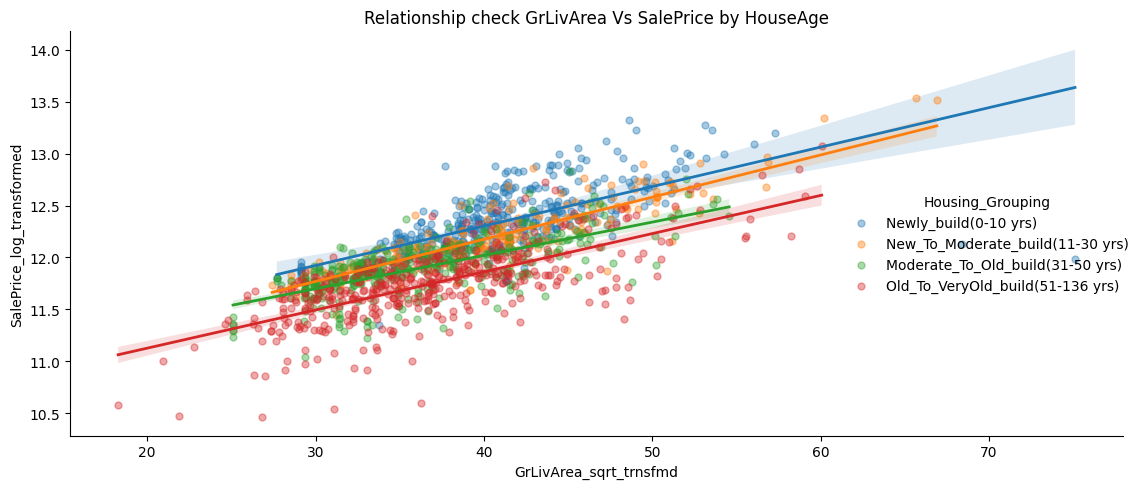

In [69]:
plt.figure(figsize = (10,5))
sns.lmplot(data=housing_df,
x='GrLivArea_sqrt_trnsfmd',
y='SalePrice_log_transformed',
hue = 'Housing_Grouping',
scatter_kws={'alpha':0.4, 's':25},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.7
)
plt.title(f"Relationship check GrLivArea Vs SalePrice by HouseAge")
plt.xlabel("GrLivArea_sqrt_trnsfmd")
plt.ylabel("SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Living area (GrLivArea) has a strong positive relationship with SalePrice across all housing-age groups.
For the same living area, newer homes consistently have higher prices than older homes, showing a clear age premium.
The trend lines are roughly parallel, suggesting age mainly shifts the price level upward/downward rather than dramatically changing how strongly area impacts price.

21. Relationship check GrLivArea Vs SalePrice by KitchenQual

<Figure size 1000x500 with 0 Axes>

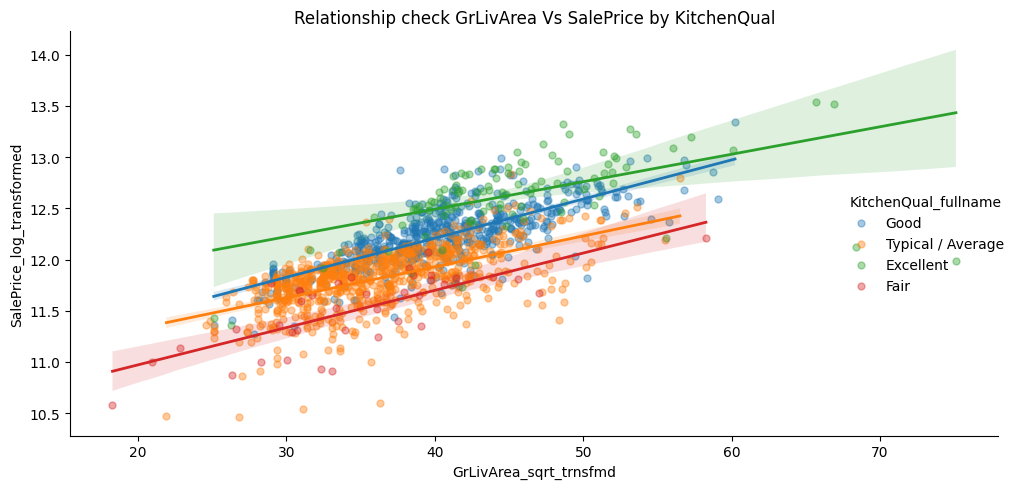

In [70]:
plt.figure(figsize = (10,5))
sns.lmplot(data=housing_df,
x='GrLivArea_sqrt_trnsfmd',
y='SalePrice_log_transformed',
hue = 'KitchenQual_fullname',
scatter_kws={'alpha':0.4, 's':25},
    line_kws={'linewidth':2},
    height=5,
    aspect=1.7
)
plt.title(f"Relationship check GrLivArea Vs SalePrice by KitchenQual")
plt.xlabel("GrLivArea_sqrt_trnsfmd")
plt.ylabel("SalePrice_log_transformed")
plt.tight_layout()
plt.show()

Insight: Houses with larger living area (GrLivArea_sqrt_trnsfmd) consistently sell for more (all lines slope upward), but Kitchen quality clearly shifts the price level: for the same living area, houses with Excellent kitchens command the highest SalePrice_log_transformed, followed by Good, then Typical/Average, while Fair kitchens tend to be priced lowest. The visible separation between the trend lines indicates a multivariate effect—price depends on both size and kitchen quality, with better kitchen quality providing a noticeable premium across most size ranges.